# Bank's cusomer segmentation Project
## Date: 24/10/2021

### Import libraries

In [1]:
import pandas as pd
import pandas as pd
import numpy as np

import matplotlib.pyplot as plt
import matplotlib.patches as mpatches
import seaborn as sns

from sklearn.preprocessing import StandardScaler, MinMaxScaler
from sklearn.preprocessing import LabelEncoder,OneHotEncoder

from sklearn.model_selection import train_test_split

from sklearn.cluster import KMeans
from kmodes.kprototypes import KPrototypes

import warnings
warnings.filterwarnings('ignore')

### Import data and understanding

In [2]:
df = pd.read_csv('bankmarketing.csv', sep=',')

In [3]:
df.shape

(41188, 21)

In [4]:
df.head()

age        job  marital    education  default housing loan    contact  \
0   56  housemaid  married     basic.4y       no      no   no  telephone   
1   57   services  married  high.school  unknown      no   no  telephone   
2   37   services  married  high.school       no     yes   no  telephone   
3   40     admin.  married     basic.6y       no      no   no  telephone   
4   56   services  married  high.school       no      no  yes  telephone   

  month day_of_week  ...  campaign  pdays  previous     poutcome emp.var.rate  \
0   may         mon  ...         1    999         0  nonexistent          1.1   
1   may         mon  ...         1    999         0  nonexistent          1.1   
2   may         mon  ...         1    999         0  nonexistent          1.1   
3   may         mon  ...         1    999         0  nonexistent          1.1   
4   may         mon  ...         1    999         0  nonexistent          1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed   y  
0          93.994          -36.4      4.857       5191.0  no  
1          93.994          -36.4      4.857       5191.0  no  
2          93.994          -36.4      4.857       5191.0  no  
3          93.994          -36.4      4.857       5191.0  no  
4          93.994          -36.4      4.857       5191.0  no  

[5 rows x 21 columns]

In [5]:
df.tail()

age          job  marital            education default housing loan  \
41183   73      retired  married  professional.course      no     yes   no   
41184   46  blue-collar  married  professional.course      no      no   no   
41185   56      retired  married    university.degree      no     yes   no   
41186   44   technician  married  professional.course      no      no   no   
41187   74      retired  married  professional.course      no     yes   no   

        contact month day_of_week  ...  campaign  pdays  previous  \
41183  cellular   nov         fri  ...         1    999         0   
41184  cellular   nov         fri  ...         1    999         0   
41185  cellular   nov         fri  ...         2    999         0   
41186  cellular   nov         fri  ...         1    999         0   
41187  cellular   nov         fri  ...         3    999         1   

          poutcome emp.var.rate  cons.price.idx  cons.conf.idx  euribor3m  \
41183  nonexistent         -1.1          94.767          -50.8      1.028   
41184  nonexistent         -1.1          94.767          -50.8      1.028   
41185  nonexistent         -1.1          94.767          -50.8      1.028   
41186  nonexistent         -1.1          94.767          -50.8      1.028   
41187      failure         -1.1          94.767          -50.8      1.028   

       nr.employed    y  
41183       4963.6  yes  
41184       4963.6   no  
41185       4963.6   no  
41186       4963.6  yes  
41187       4963.6   no  

[5 rows x 21 columns]

In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 21 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   age             41188 non-null  int64  
 1   job             41188 non-null  object 
 2   marital         41188 non-null  object 
 3   education       41188 non-null  object 
 4   default         41188 non-null  object 
 5   housing         41188 non-null  object 
 6   loan            41188 non-null  object 
 7   contact         41188 non-null  object 
 8   month           41188 non-null  object 
 9   day_of_week     41188 non-null  object 
 10  duration        41188 non-null  int64  
 11  campaign        41188 non-null  int64  
 12  pdays           41188 non-null  int64  
 13  previous        41188 non-null  int64  
 14  poutcome        41188 non-null  object 
 15  emp.var.rate    41188 non-null  float64
 16  cons.price.idx  41188 non-null  float64
 17  cons.conf.idx   41188 non-null 

### Data set description

Input variables:
#### bank client data:
- age (numeric)
- job : type of job (categorical: 'admin.','blue-collar','entrepreneur','housemaid','management','retired','self-employed','services','student','technician','unemployed','unknown')
- marital : marital status (categorical: 'divorced','married','single','unknown'; note: 'divorced' means divorced or widowed)
- education (categorical: 'basic.4y','basic.6y','basic.9y','high.school','illiterate','professional.course','university.degree','unknown')
- default: has credit in default? (categorical: 'no','yes','unknown')
- housing: has housing loan? (categorical: 'no','yes','unknown')
- loan: has personal loan? (categorical: 'no','yes','unknown')
#### related with the last contact of the current campaign:
- contact: contact communication type (categorical: 'cellular','telephone') 
- month: last contact month of year (categorical: 'jan', 'feb', 'mar', ..., 'nov', 'dec')
- day_of_week: last contact day of the week (categorical: 'mon','tue','wed','thu','fri')
- duration: last contact duration, in seconds (numeric). Important note: this attribute highly affects the output target (e.g., if duration=0 then y='no'). Yet, the duration is not known before a call is performed. Also, after the end of the call y is obviously known. Thus, this input should only be included for benchmark purposes and should be discarded if the intention is to have a realistic predictive model.
#### other attributes:
- campaign: number of contacts performed during this campaign and for this client (numeric, includes last contact)
- pdays: number of days that passed by after the client was last contacted from a previous campaign (numeric; 999 means client was not previously contacted)
- previous: number of contacts performed before this campaign and for this client (numeric)
- poutcome: outcome of the previous marketing campaign (categorical: 'failure','nonexistent','success')
##### social and economic context attributes
- emp.var.rate: employment variation rate - quarterly indicator (numeric)
- cons.price.idx: consumer price index - monthly indicator (numeric) 
- cons.conf.idx: consumer confidence index - monthly indicator (numeric) 
- euribor3m: euribor 3 month rate - daily indicator (numeric)
- nr.employed: number of employees - quarterly indicator (numeric)


Output variable (desired target):
- y - has the client subscribed a term deposit? (binary: 'yes','no')

### Data inspection

In [7]:
df.describe()

age      duration      campaign         pdays      previous  \
count  41188.00000  41188.000000  41188.000000  41188.000000  41188.000000   
mean      40.02406    258.285010      2.567593    962.475454      0.172963   
std       10.42125    259.279249      2.770014    186.910907      0.494901   
min       17.00000      0.000000      1.000000      0.000000      0.000000   
25%       32.00000    102.000000      1.000000    999.000000      0.000000   
50%       38.00000    180.000000      2.000000    999.000000      0.000000   
75%       47.00000    319.000000      3.000000    999.000000      0.000000   
max       98.00000   4918.000000     56.000000    999.000000      7.000000   

       emp.var.rate  cons.price.idx  cons.conf.idx     euribor3m   nr.employed  
count  41188.000000    41188.000000   41188.000000  41188.000000  41188.000000  
mean       0.081886       93.575664     -40.502600      3.621291   5167.035911  
std        1.570960        0.578840       4.628198      1.734447     72.251528  
min       -3.400000       92.201000     -50.800000      0.634000   4963.600000  
25%       -1.800000       93.075000     -42.700000      1.344000   5099.100000  
50%        1.100000       93.749000     -41.800000      4.857000   5191.000000  
75%        1.400000       93.994000     -36.400000      4.961000   5228.100000  
max        1.400000       94.767000     -26.900000      5.045000   5228.100000

In [8]:
df.describe().columns

Index(['age', 'duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed'],
      dtype='object')

In [9]:
df.describe(include='O')

job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome      y  
count   41188       41188        41188  41188  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13769        8623        35563  36548

In [10]:
df['age_bin'] = pd.cut(df['age'], [0, 20, 30, 40, 50, 60, 70, 80, 90, 100], 
                              labels=['0-20', '20-30', '30-40', '40-50','50-60','60-70','70-80', '80-90','90-100'])
df = df.drop('age',axis = 1)

In [11]:
df.describe(include='O').columns

Index(['job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome', 'y'],
      dtype='object')

In [12]:
num = ['duration', 'campaign', 'pdays', 'previous', 'emp.var.rate',
       'cons.price.idx', 'cons.conf.idx', 'euribor3m', 'nr.employed']
cat = ['age_bin','job', 'marital', 'education', 'default', 'housing', 'loan', 'contact',
       'month', 'day_of_week', 'poutcome','y']

### Univariate Analysis

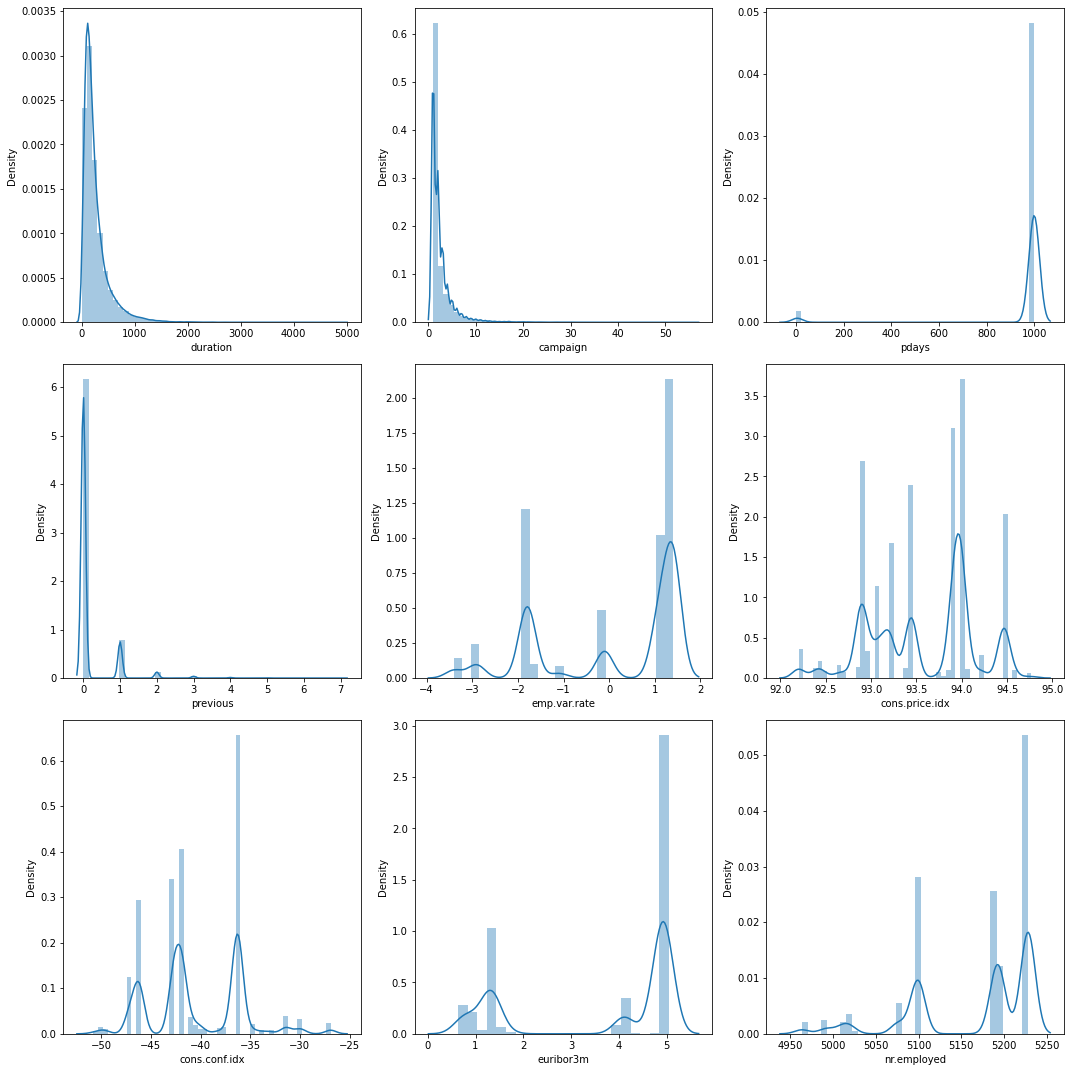

In [13]:
# Vislualize distribution of numeric data
fig,ax = plt.subplots(3,3, figsize=(15,15)) 
i=0 
for x in range(3):
    for y in range(3):
        sns.distplot(df[num[i]], ax = ax[x,y])
        i+=1
plt.tight_layout()
plt.show()

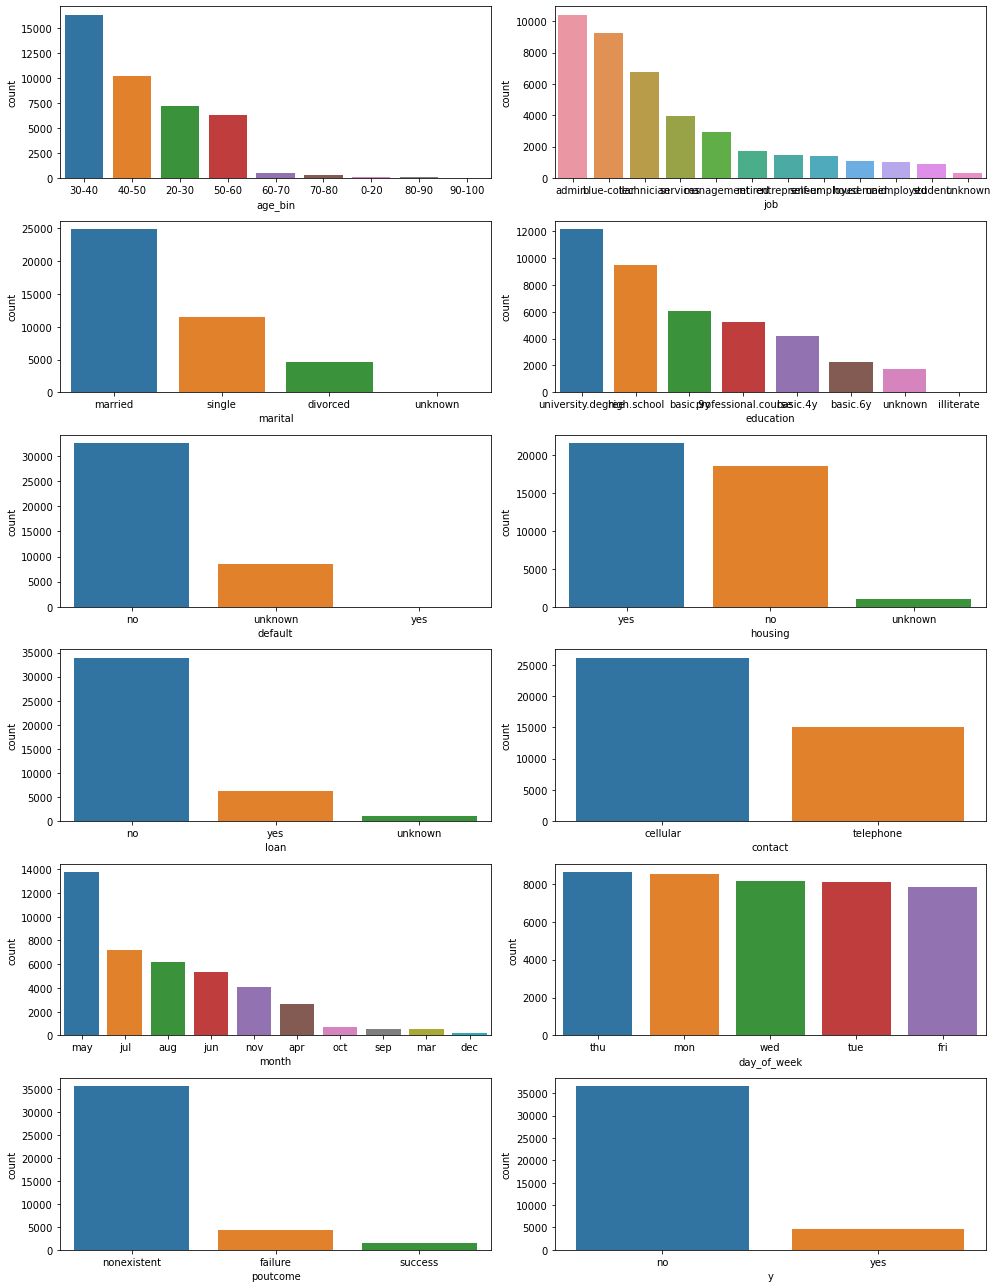

In [14]:
# Vislualize distribution of categorical data
fig,ax = plt.subplots(6,2, figsize=(14,18)) 
i=0 
for x in range(6):
    for y in range(2):
        sns.countplot(df[cat[i]], ax = ax[x,y],order=df[cat[i]].value_counts().index)
        i+=1
plt.tight_layout()
plt.show()

<AxesSubplot:xlabel='count', ylabel='job'>

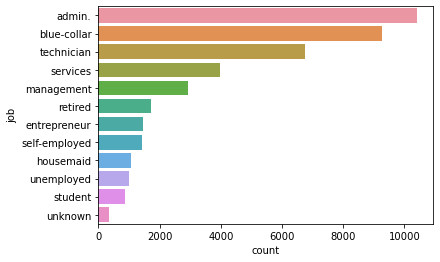

In [15]:
 sns.countplot(y = df['job'], order = df['job'].value_counts().index)

<AxesSubplot:xlabel='count', ylabel='education'>

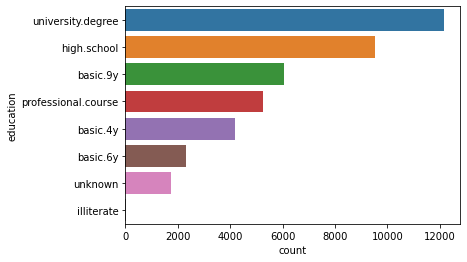

In [16]:
sns.countplot(y = df['education'], order = df['education'].value_counts().index)

### Bivariate analysis

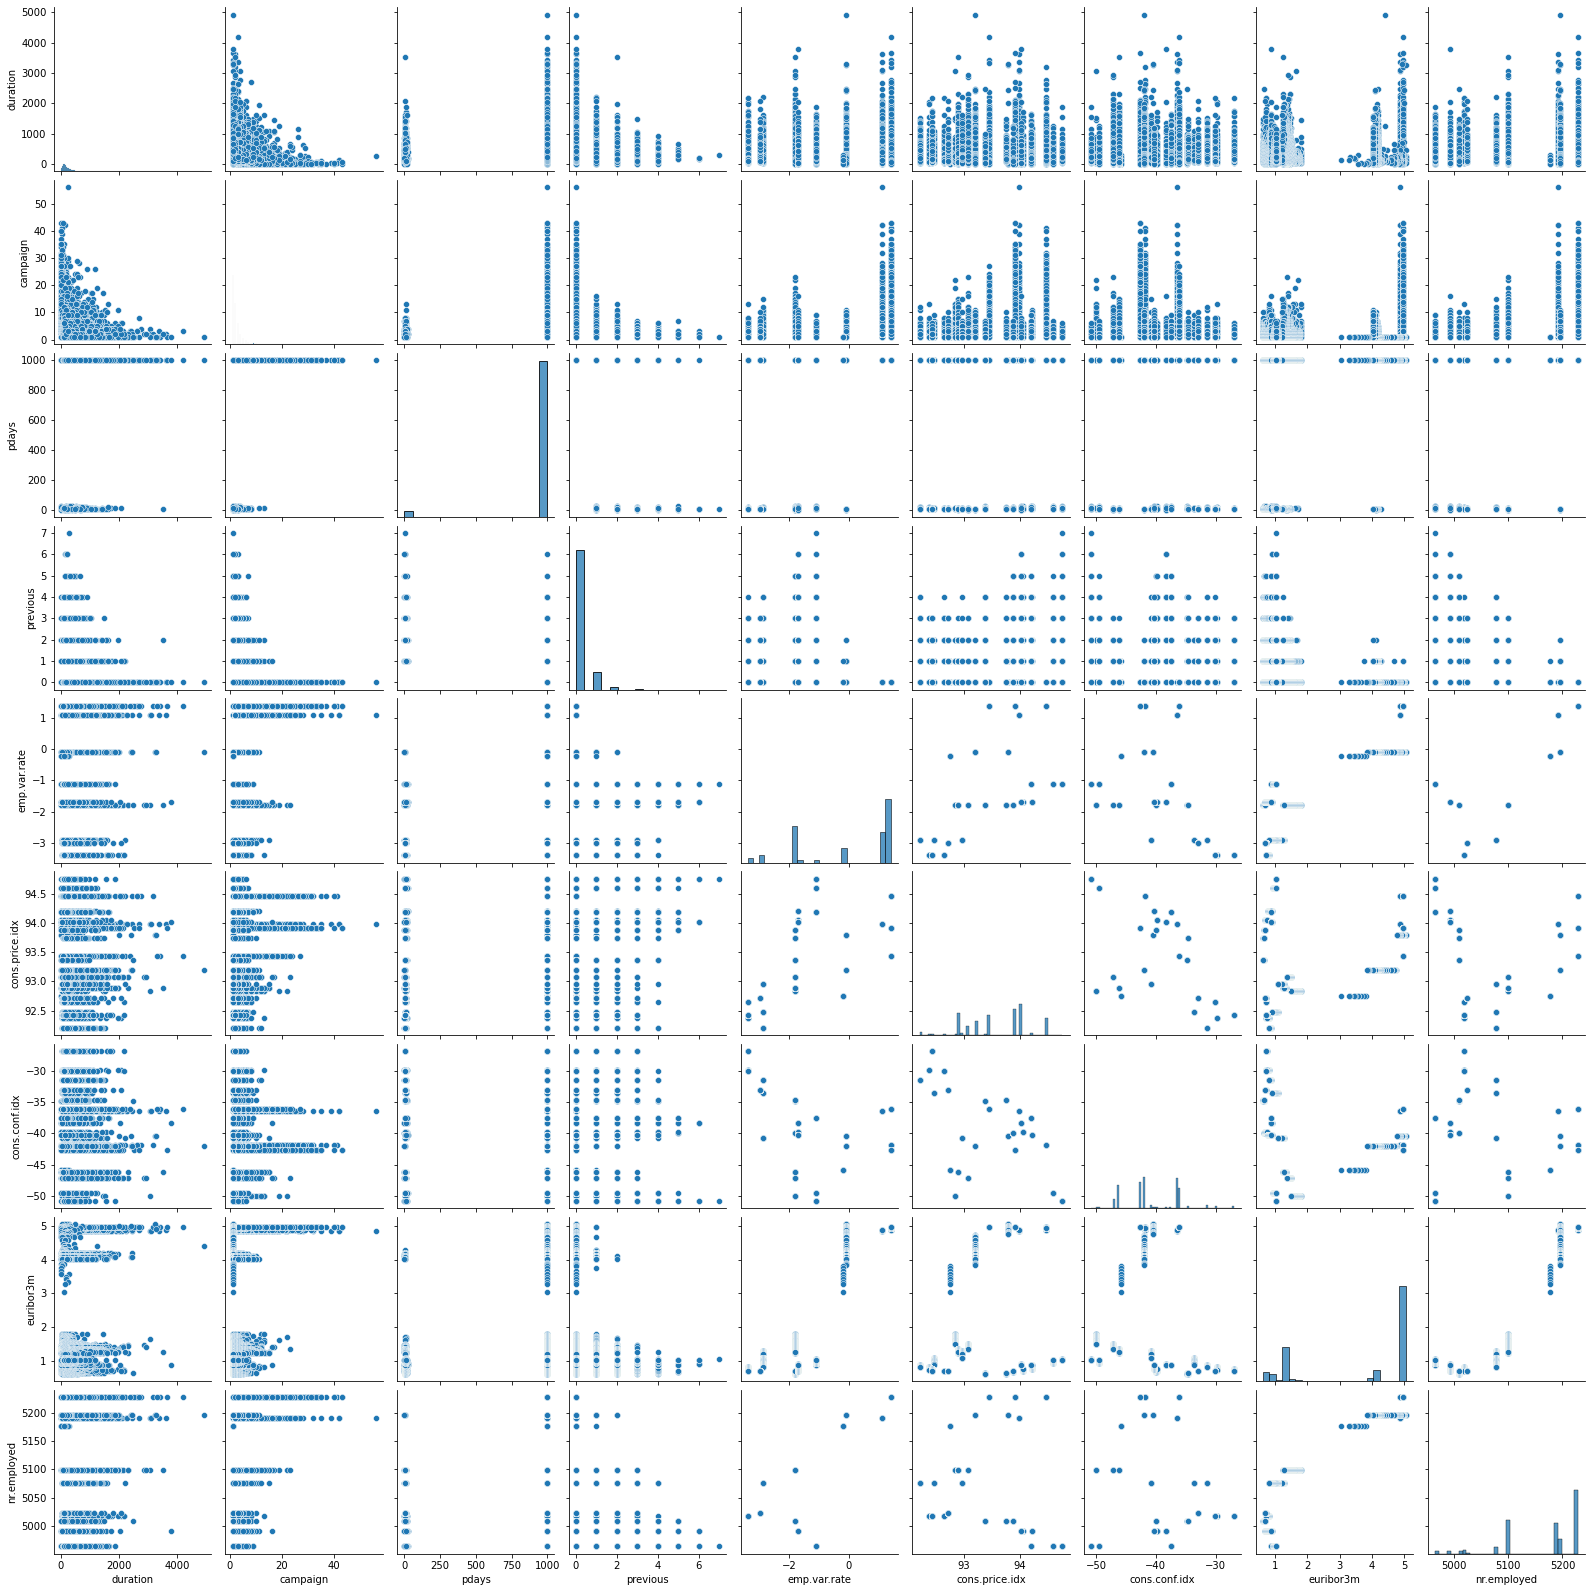

In [17]:
sns.pairplot(df)

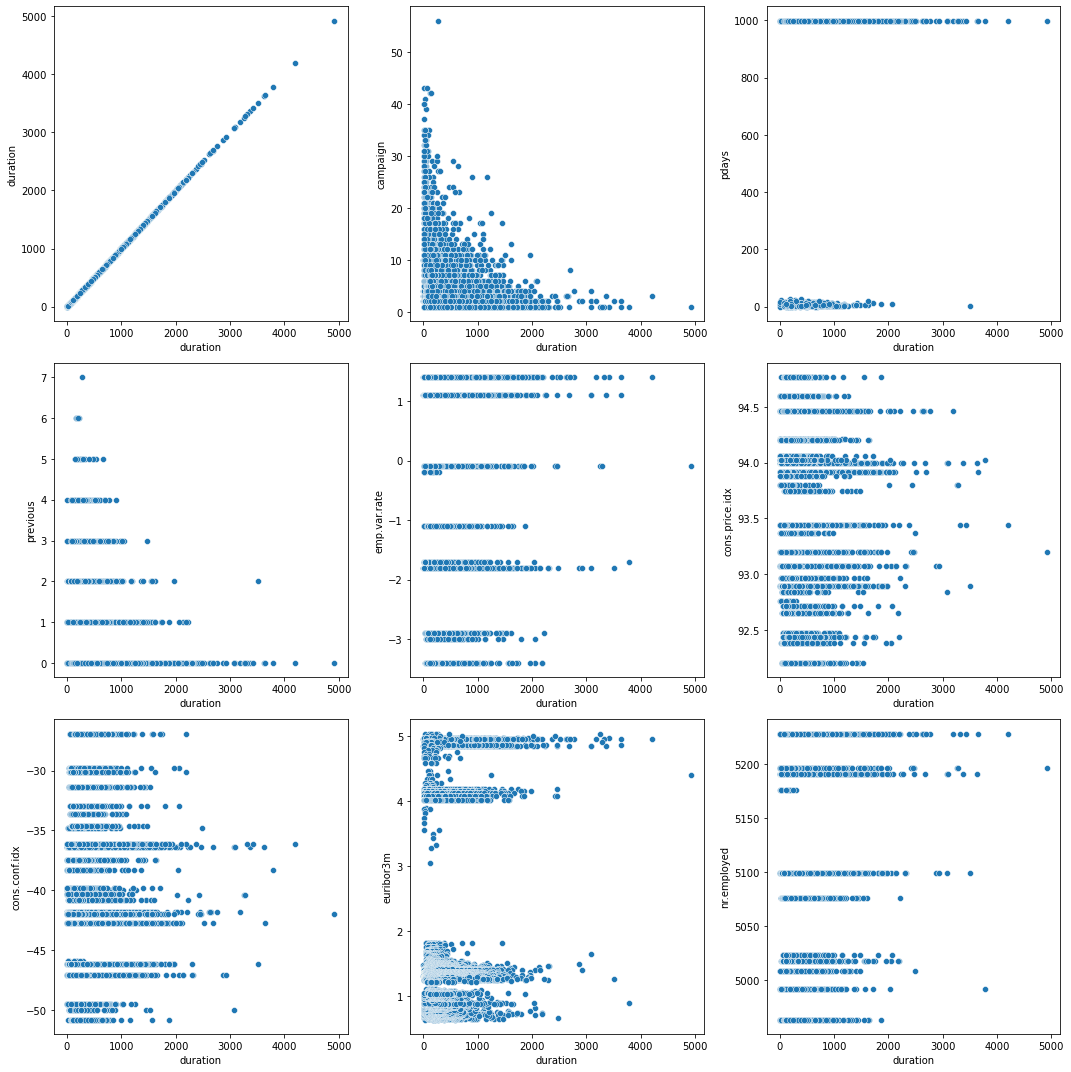

In [18]:
# Vislualize bivariate between numeric and numeric data
fig,ax = plt.subplots(3,3, figsize=(15,15)) 
i=0 
for a in range(3):
    for b in range(3):
        sns.scatterplot(y=df[num[i]], x=df['duration'], ax = ax[a,b])
        i+=1
plt.tight_layout()
plt.show()

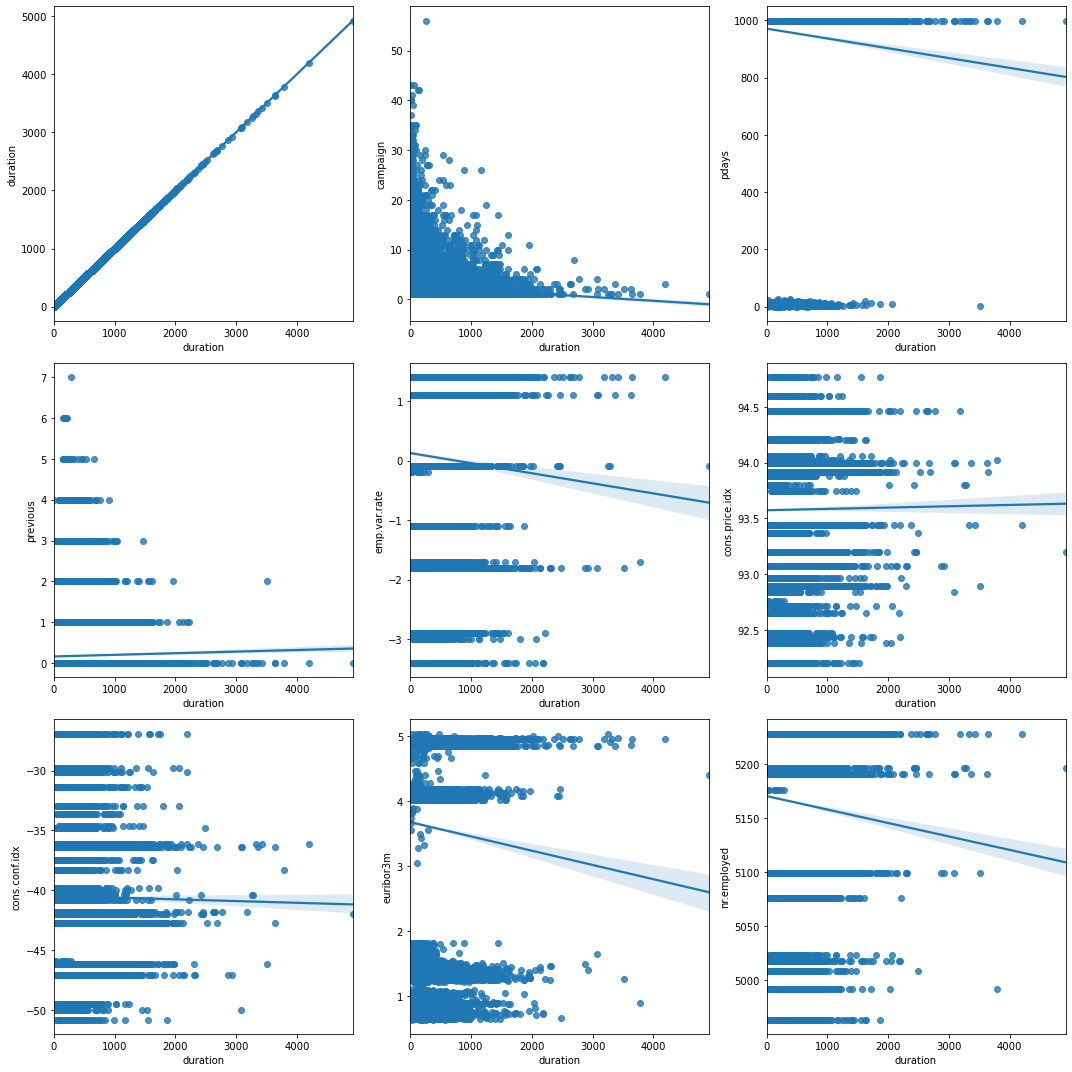

In [19]:
# Vislualize bivariate between numeric and numeric data
fig,ax = plt.subplots(3,3, figsize=(15,15)) 
i=0 
for a in range(3):
    for b in range(3):
        sns.regplot(y=df[num[i]], x=df['duration'], ax = ax[a,b])
        i+=1
plt.tight_layout()
plt.show()

In [20]:
num

['duration',
 'campaign',
 'pdays',
 'previous',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

In [21]:
df.describe(include = 'O')

job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome      y  
count   41188       41188        41188  41188  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13769        8623        35563  36548

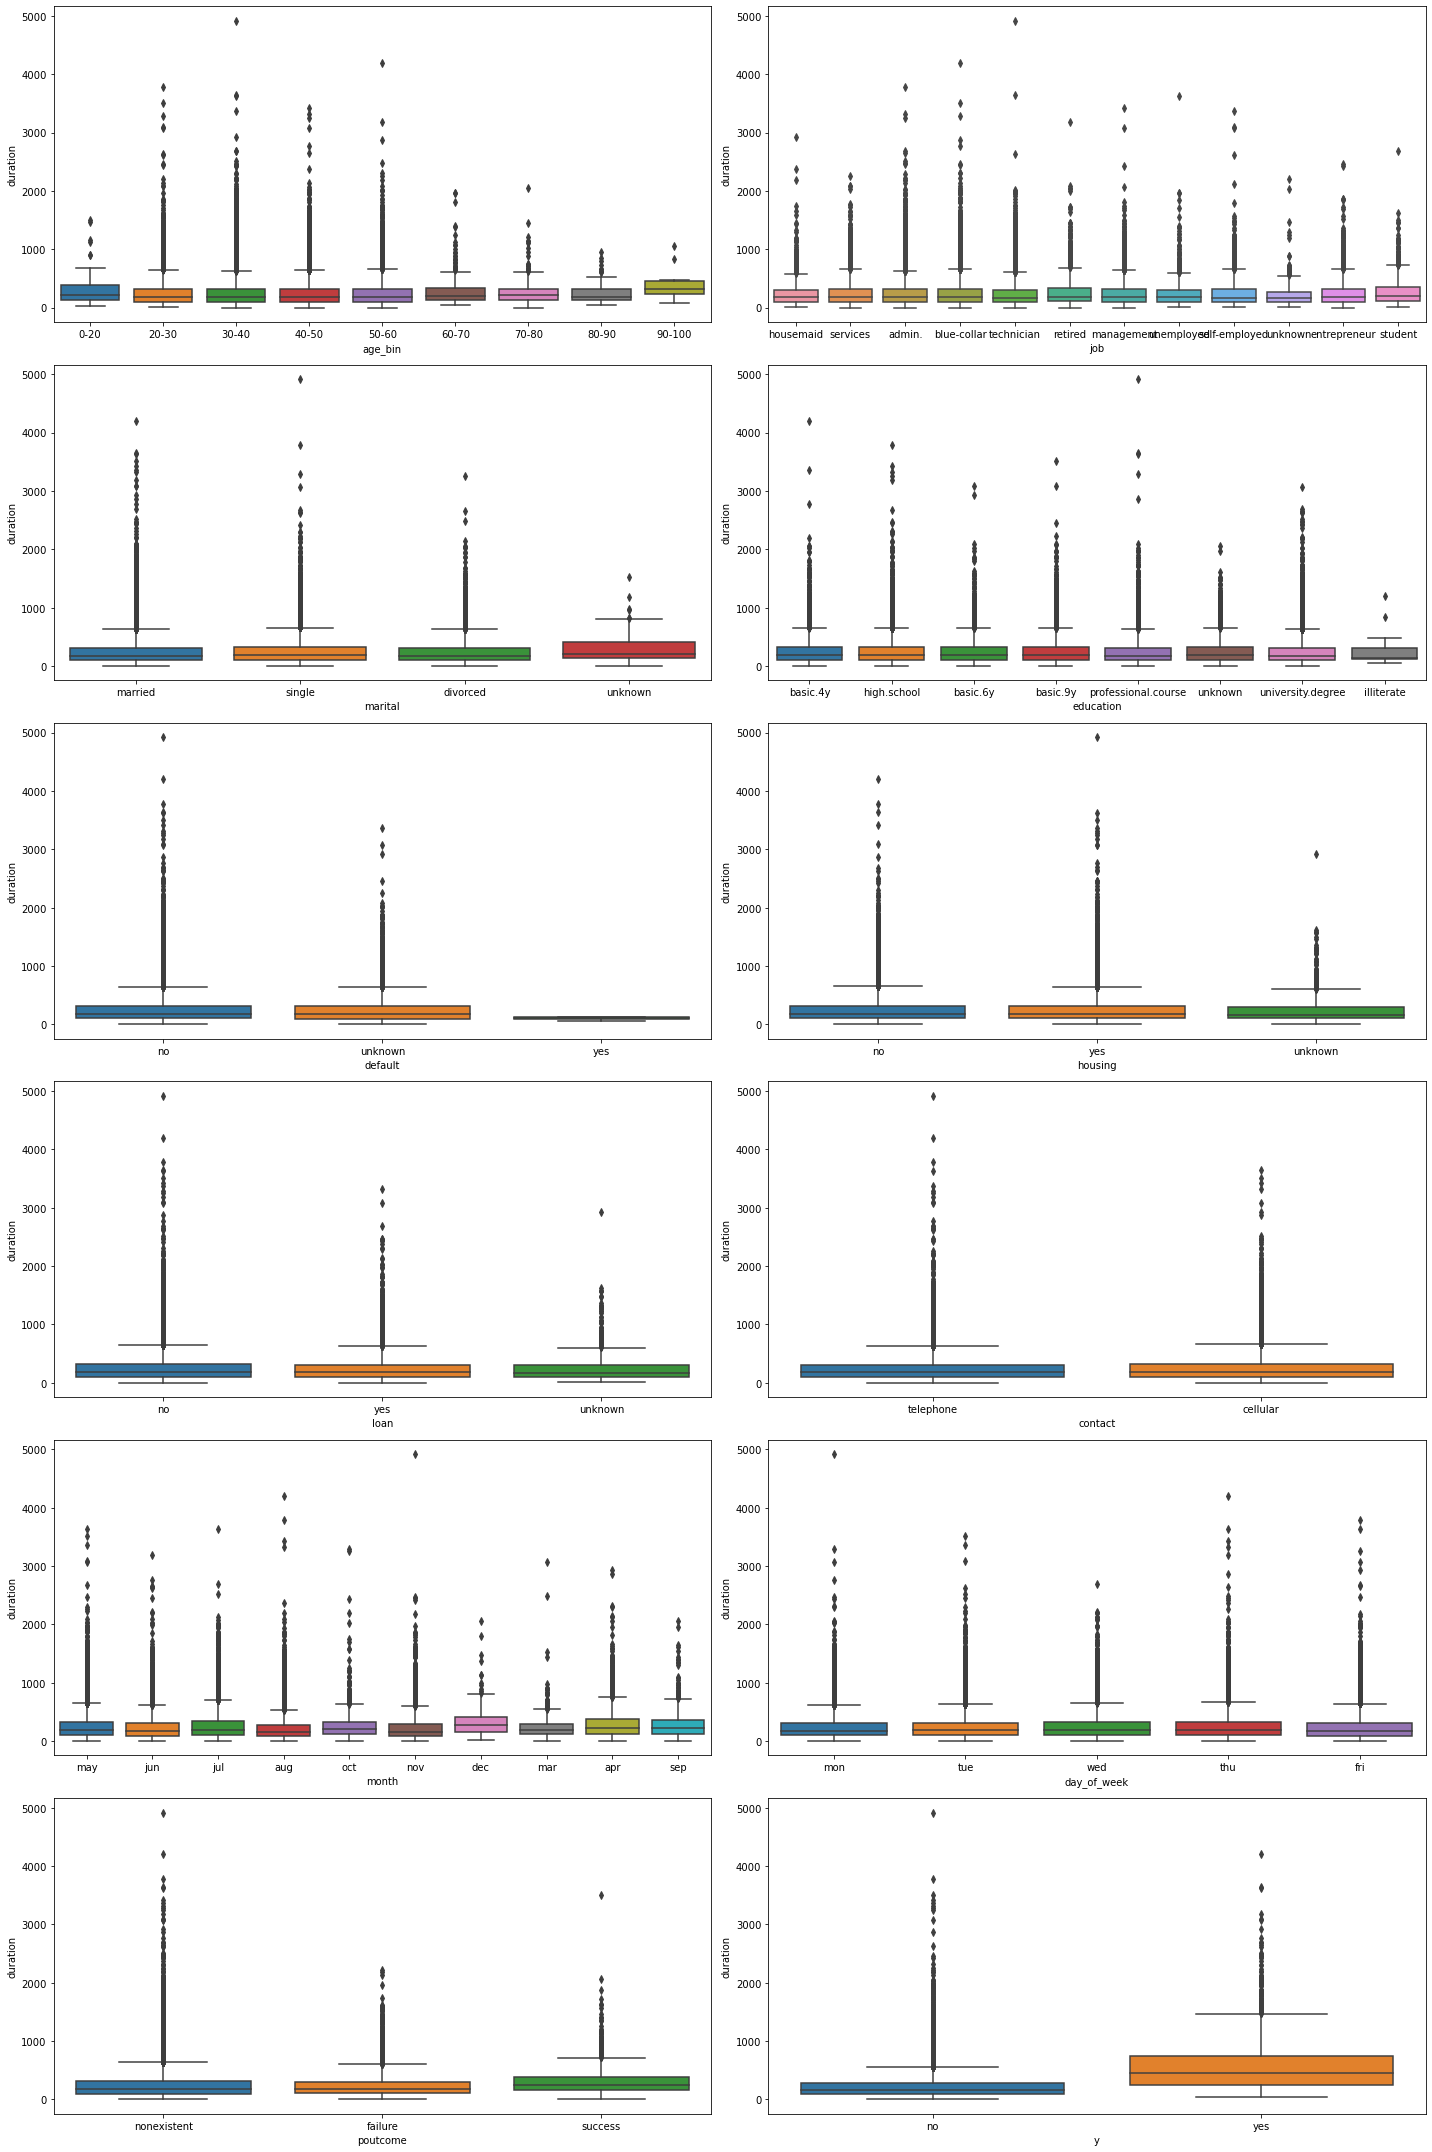

In [22]:
# Vislualize bivariate between numeric and categorical data
fig,ax = plt.subplots(6,2, figsize=(20,30)) 
i=0 
for a in range(6):
    for b in range(2):
        sns.boxplot(y=df['duration'], x=df[cat[i]], ax = ax[a,b])
        i+=1
plt.tight_layout()
plt.show()

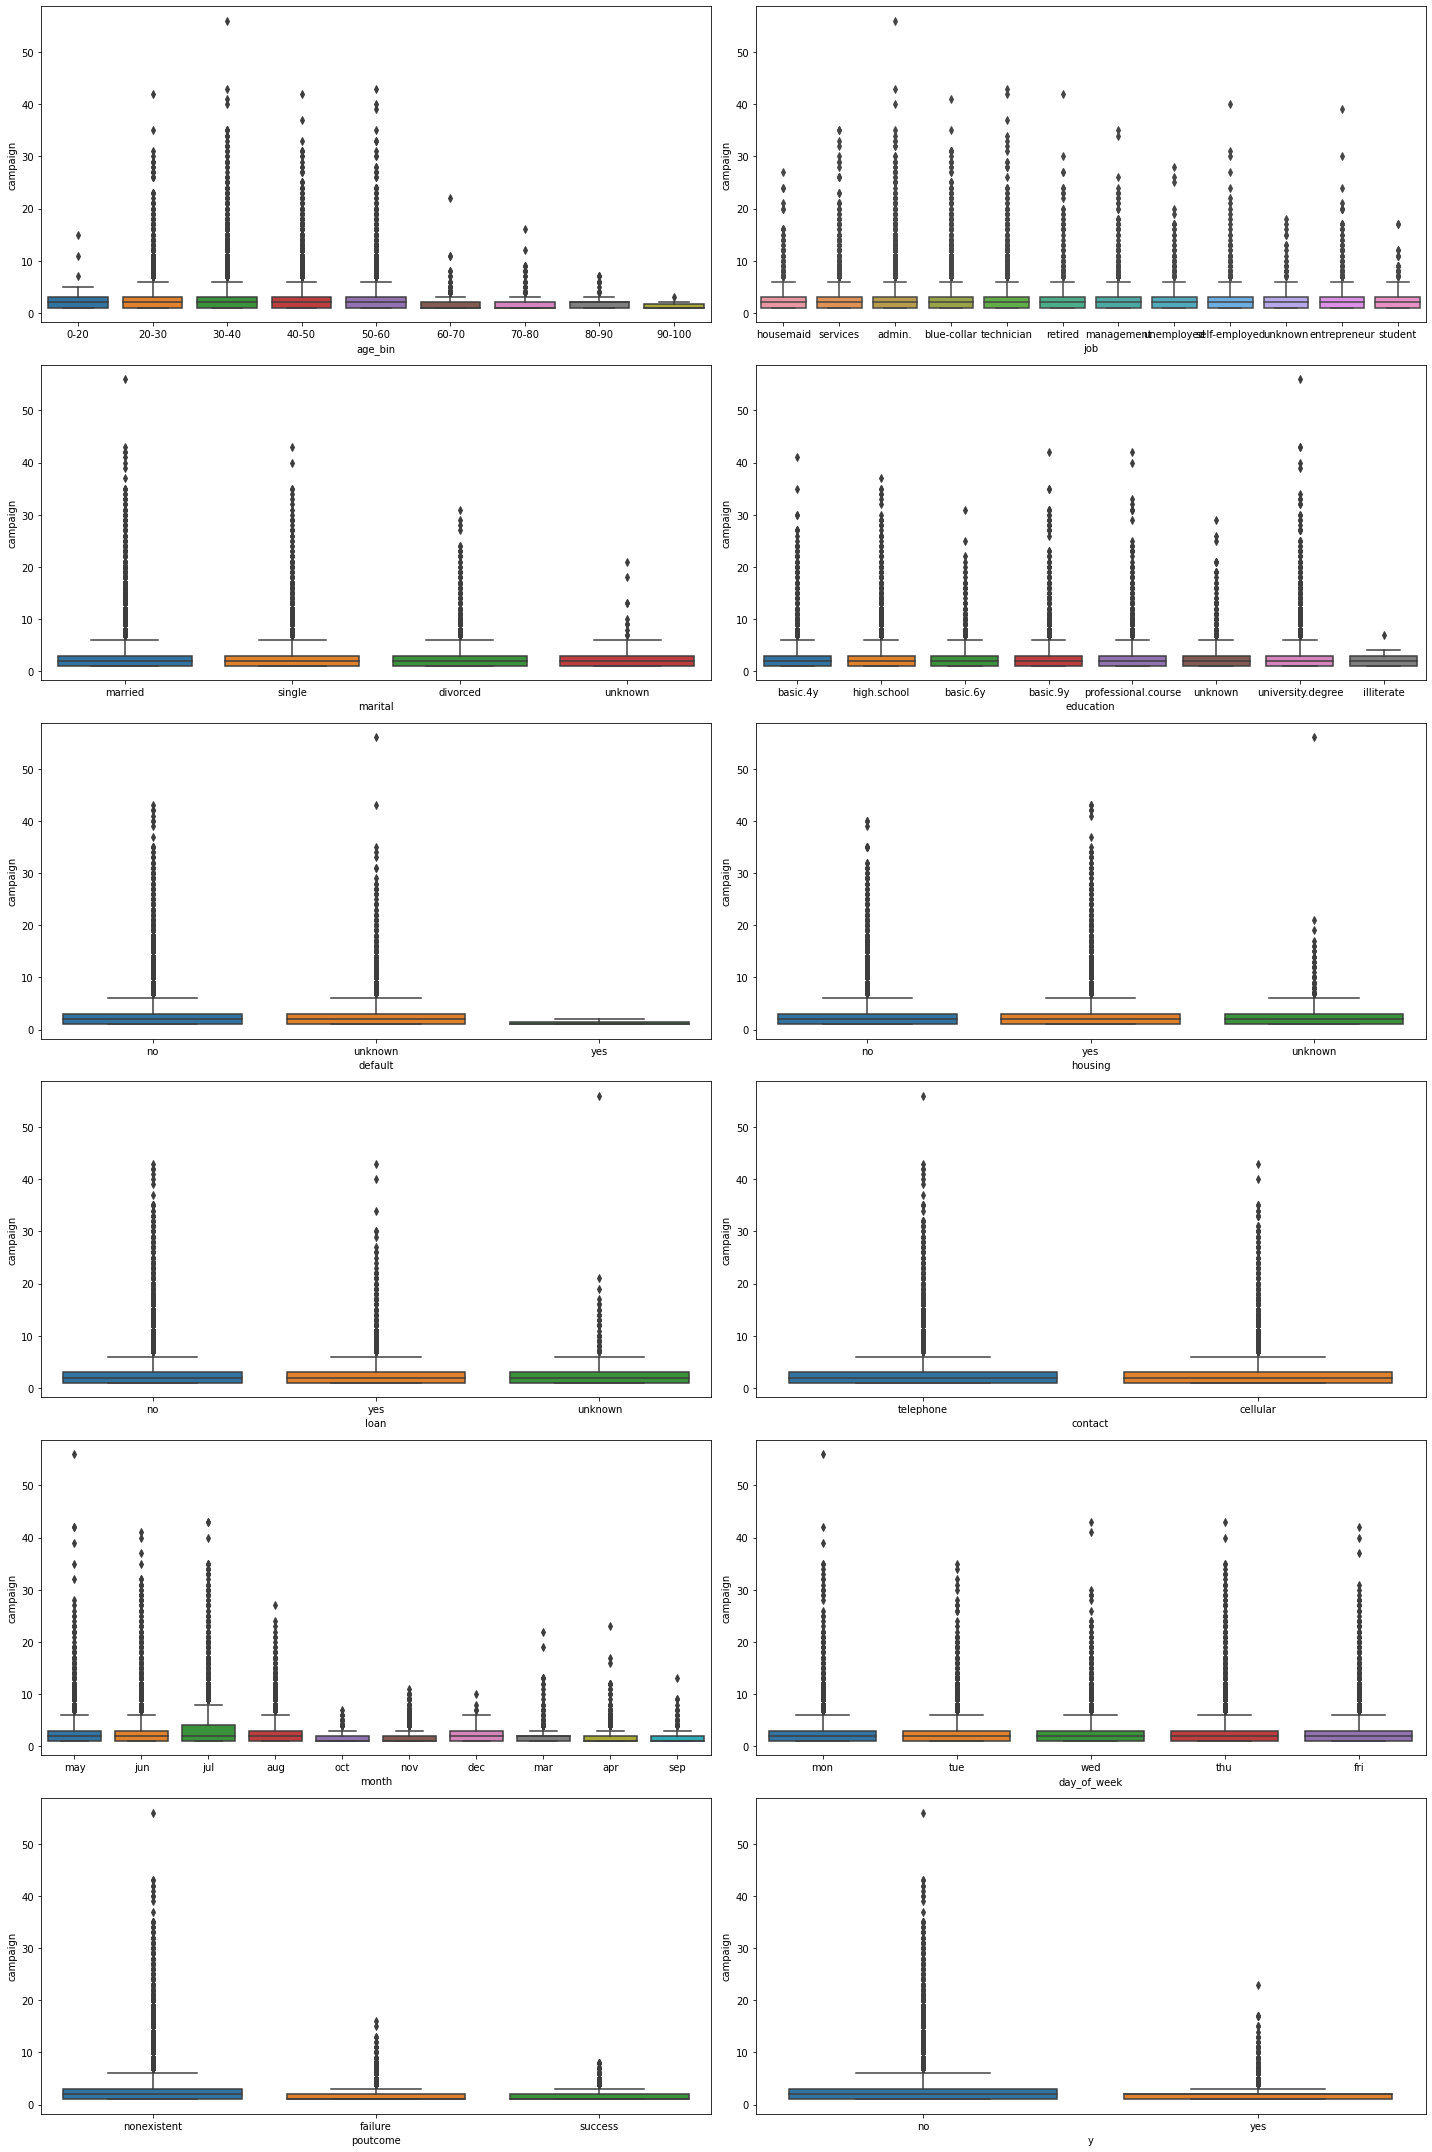

In [23]:
fig,ax = plt.subplots(6,2, figsize=(20,30)) 
i=0 
for a in range(6):
    for b in range(2):
        sns.boxplot(y=df['campaign'], x=df[cat[i]], ax = ax[a,b])
        i+=1
plt.tight_layout()
plt.show()

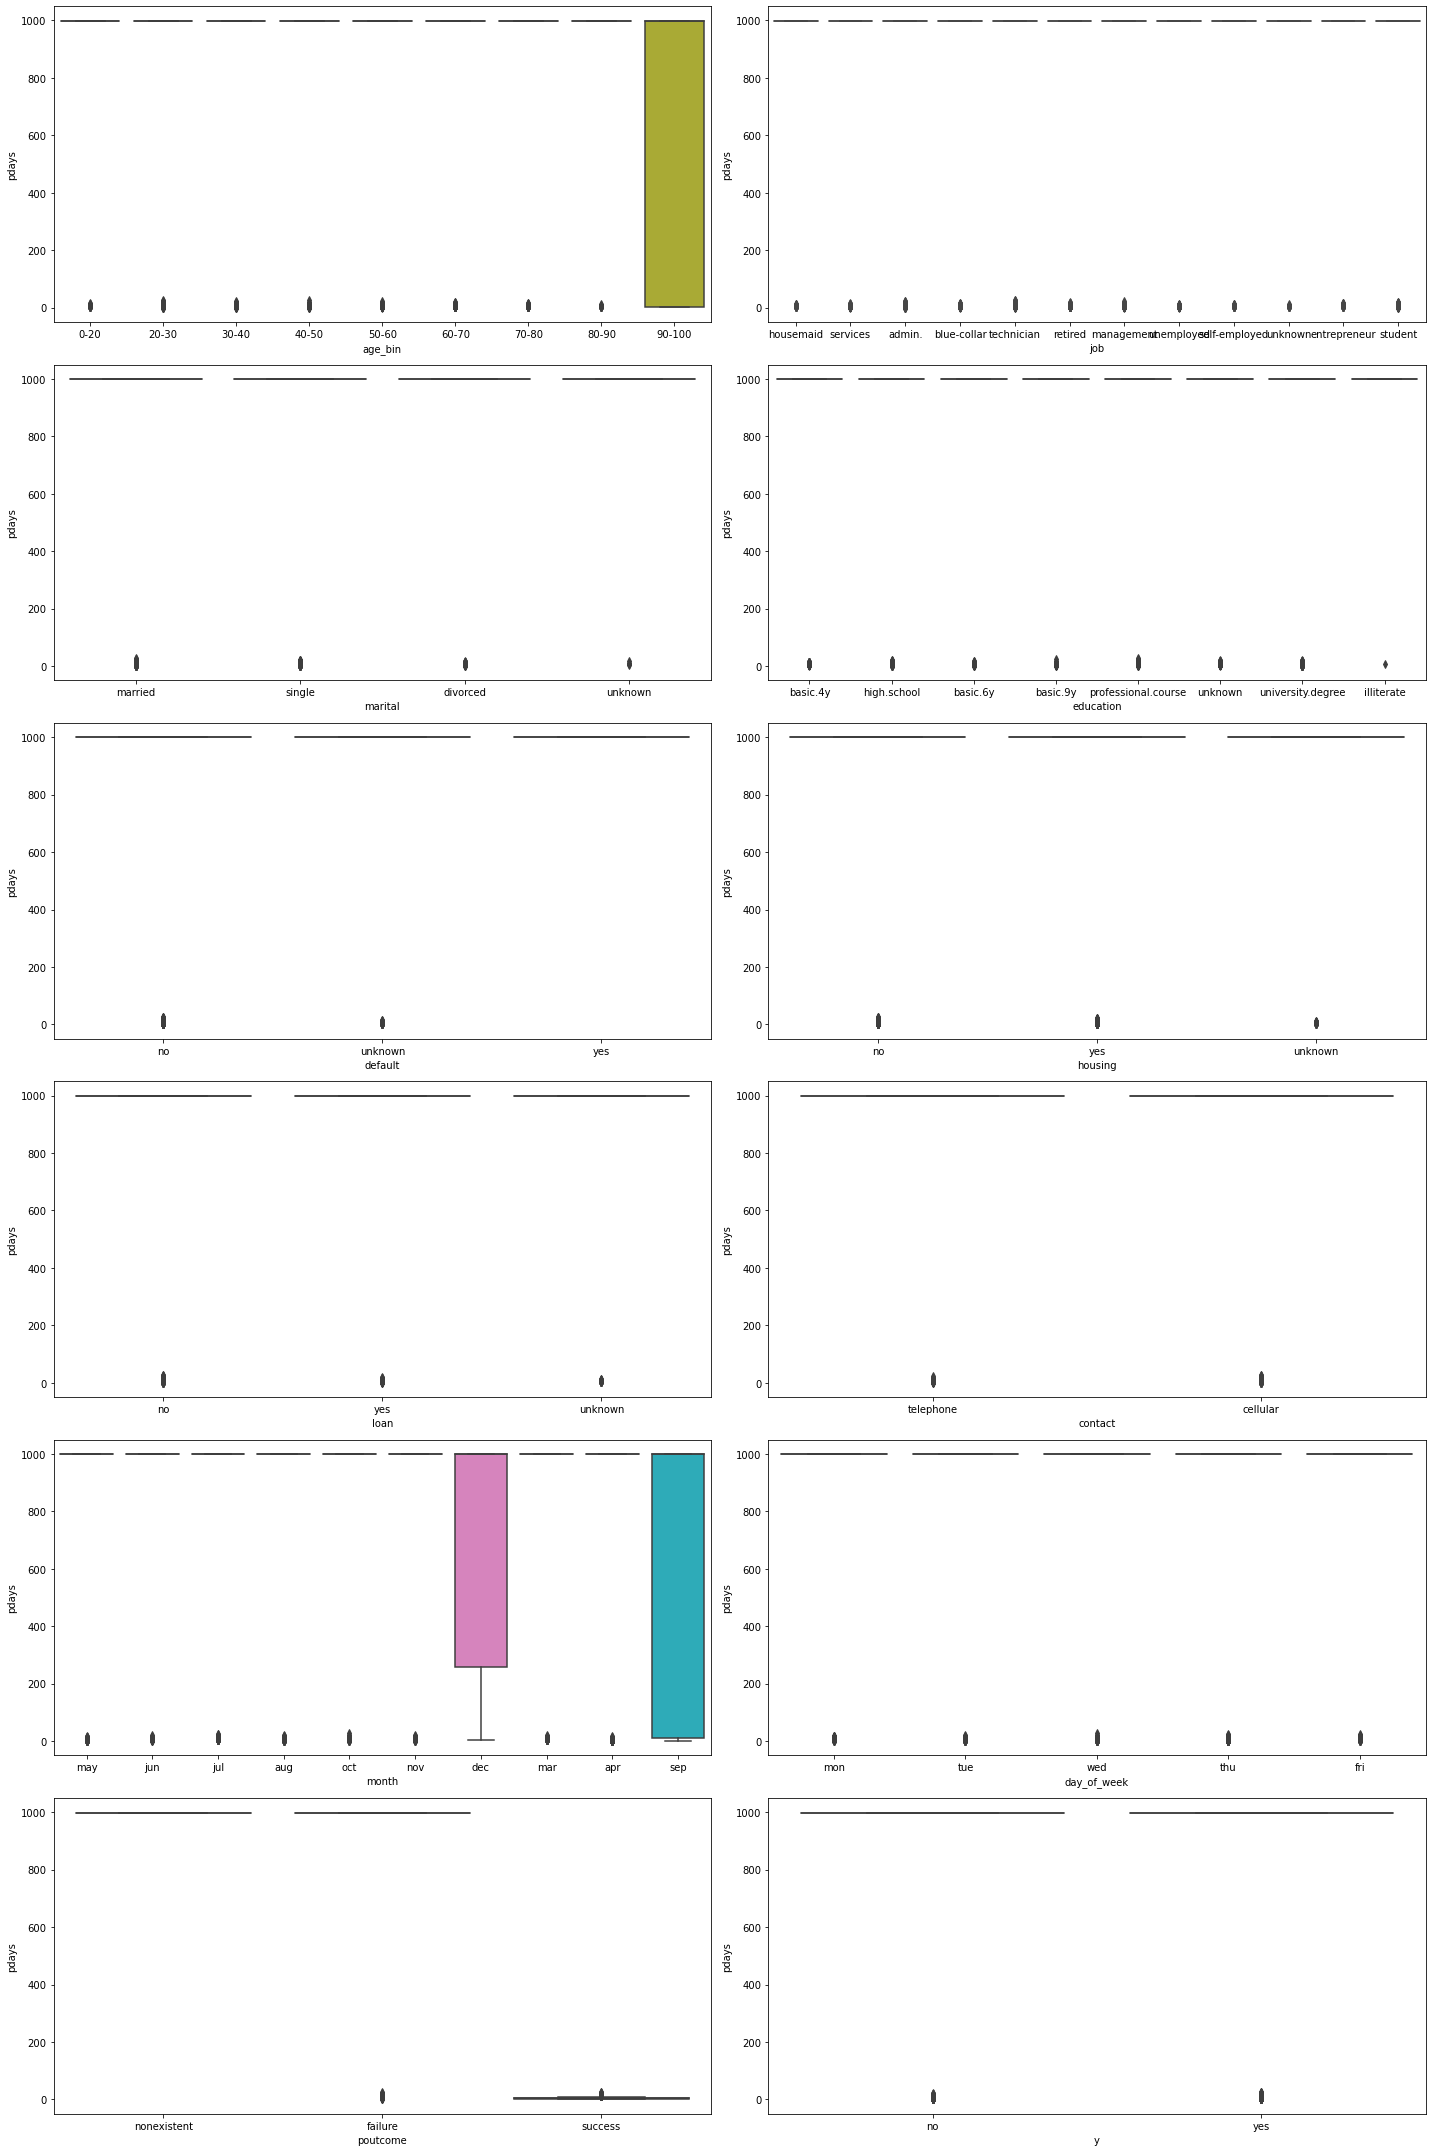

In [24]:
fig,ax = plt.subplots(6,2, figsize=(20,30)) 
i=0 
for a in range(6):
    for b in range(2):
        sns.boxplot(y=df['pdays'], x=df[cat[i]], ax = ax[a,b])
        i+=1
plt.tight_layout()
plt.show()

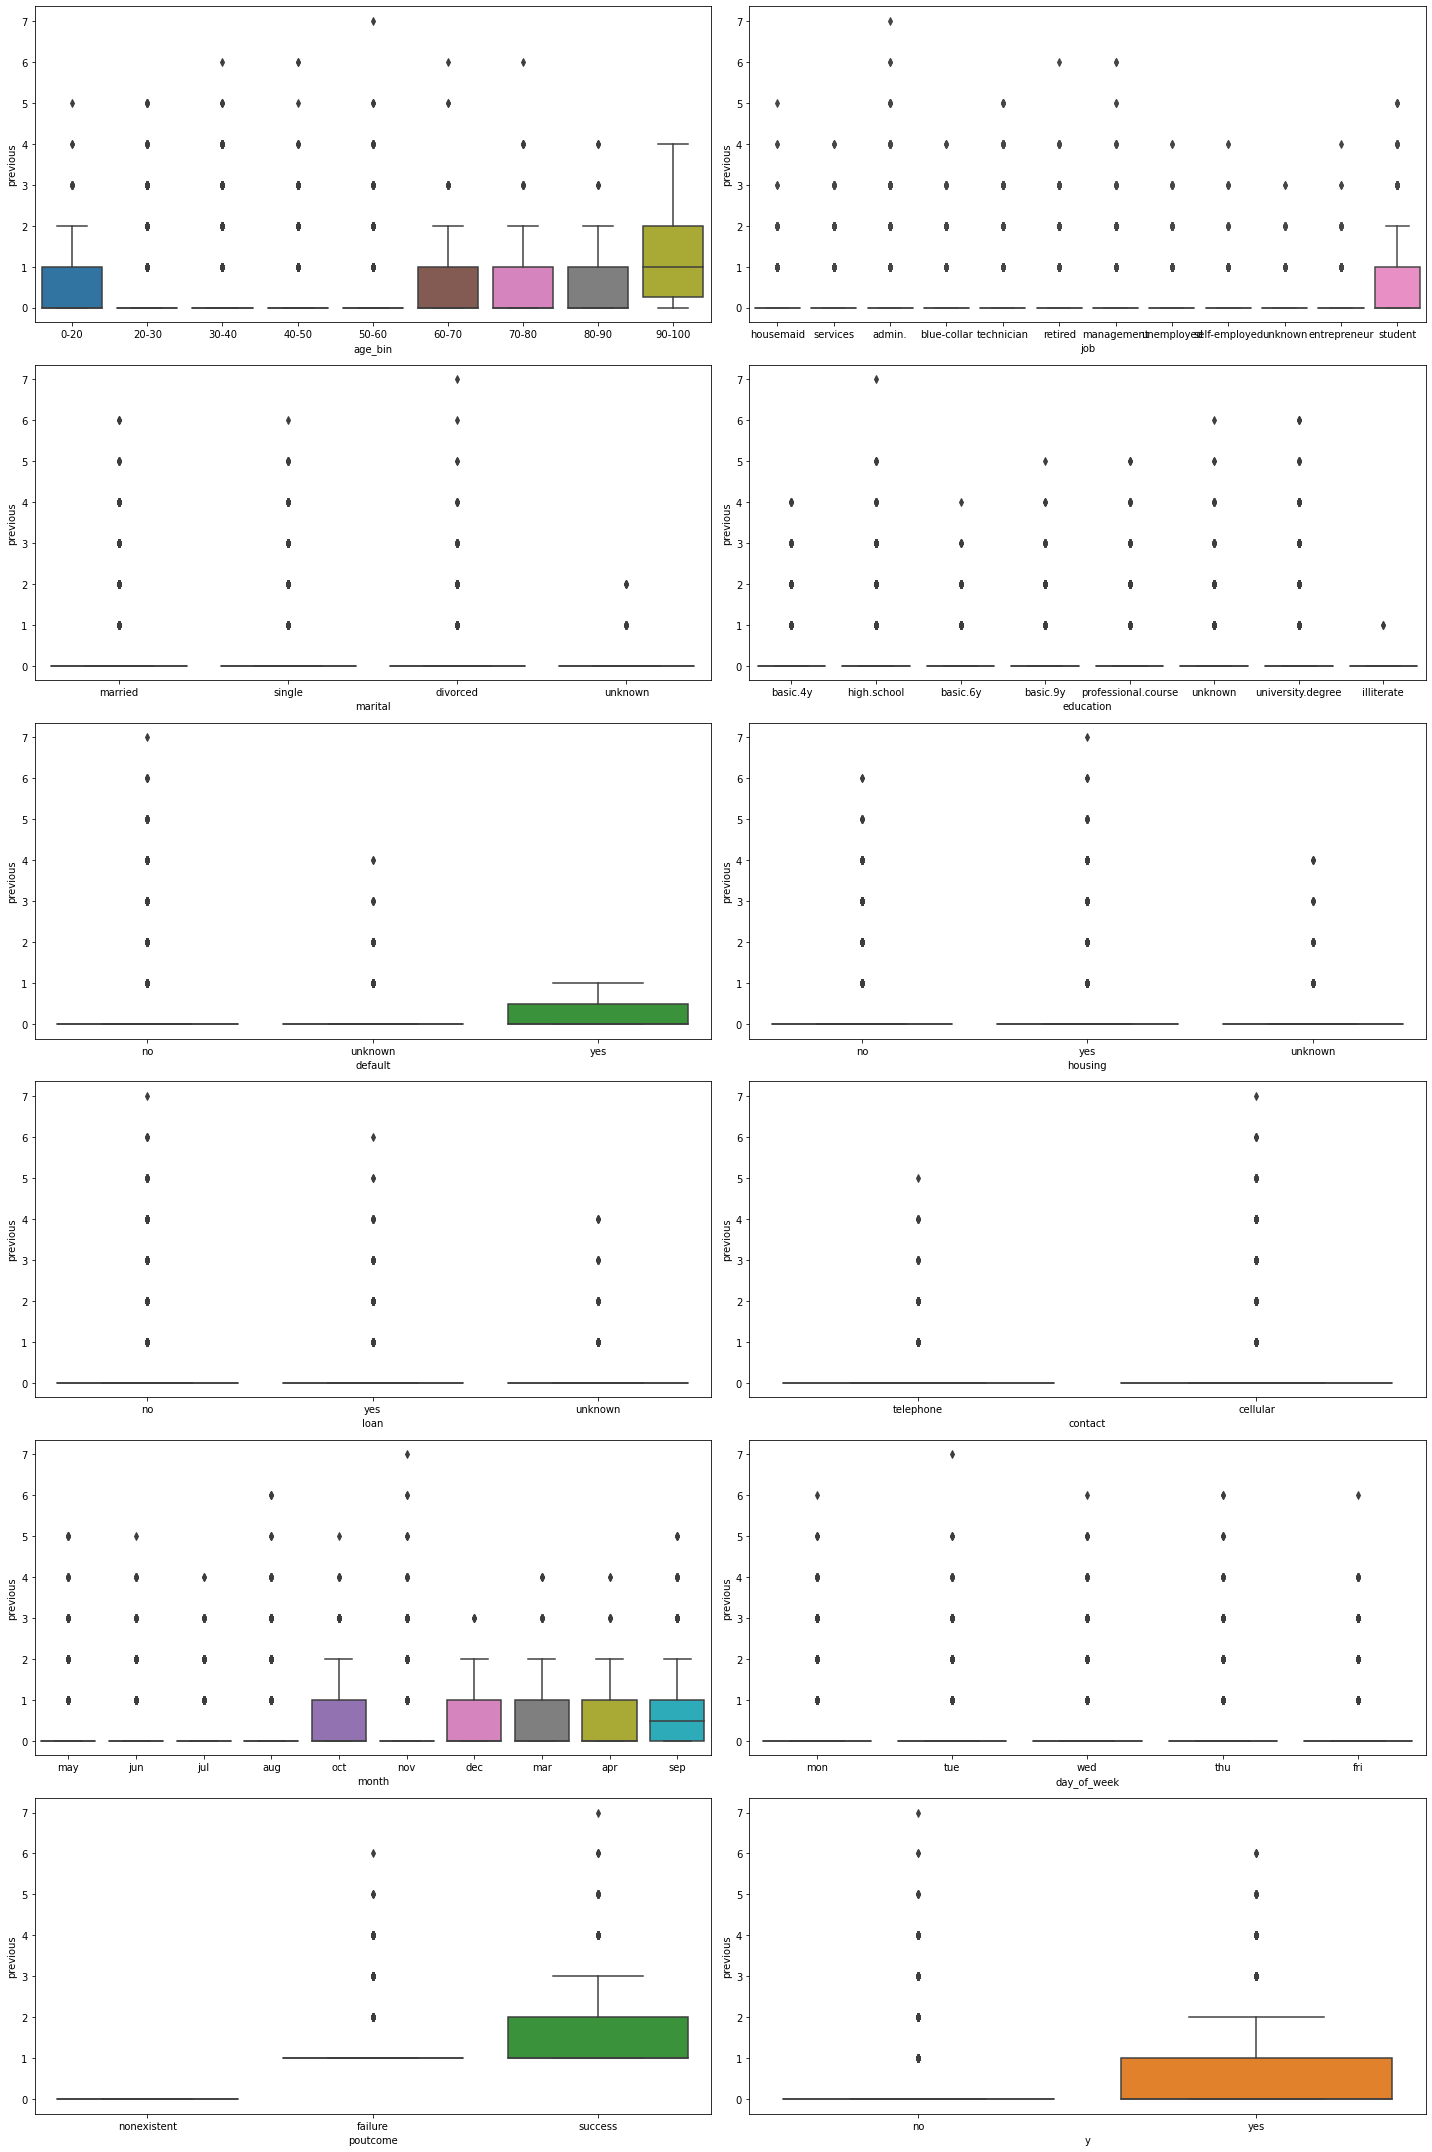

In [25]:
fig,ax = plt.subplots(6,2, figsize=(20,30)) 
i=0 
for a in range(6):
    for b in range(2):
        sns.boxplot(y=df['previous'], x=df[cat[i]], ax = ax[a,b])
        i+=1
plt.tight_layout()
plt.show()

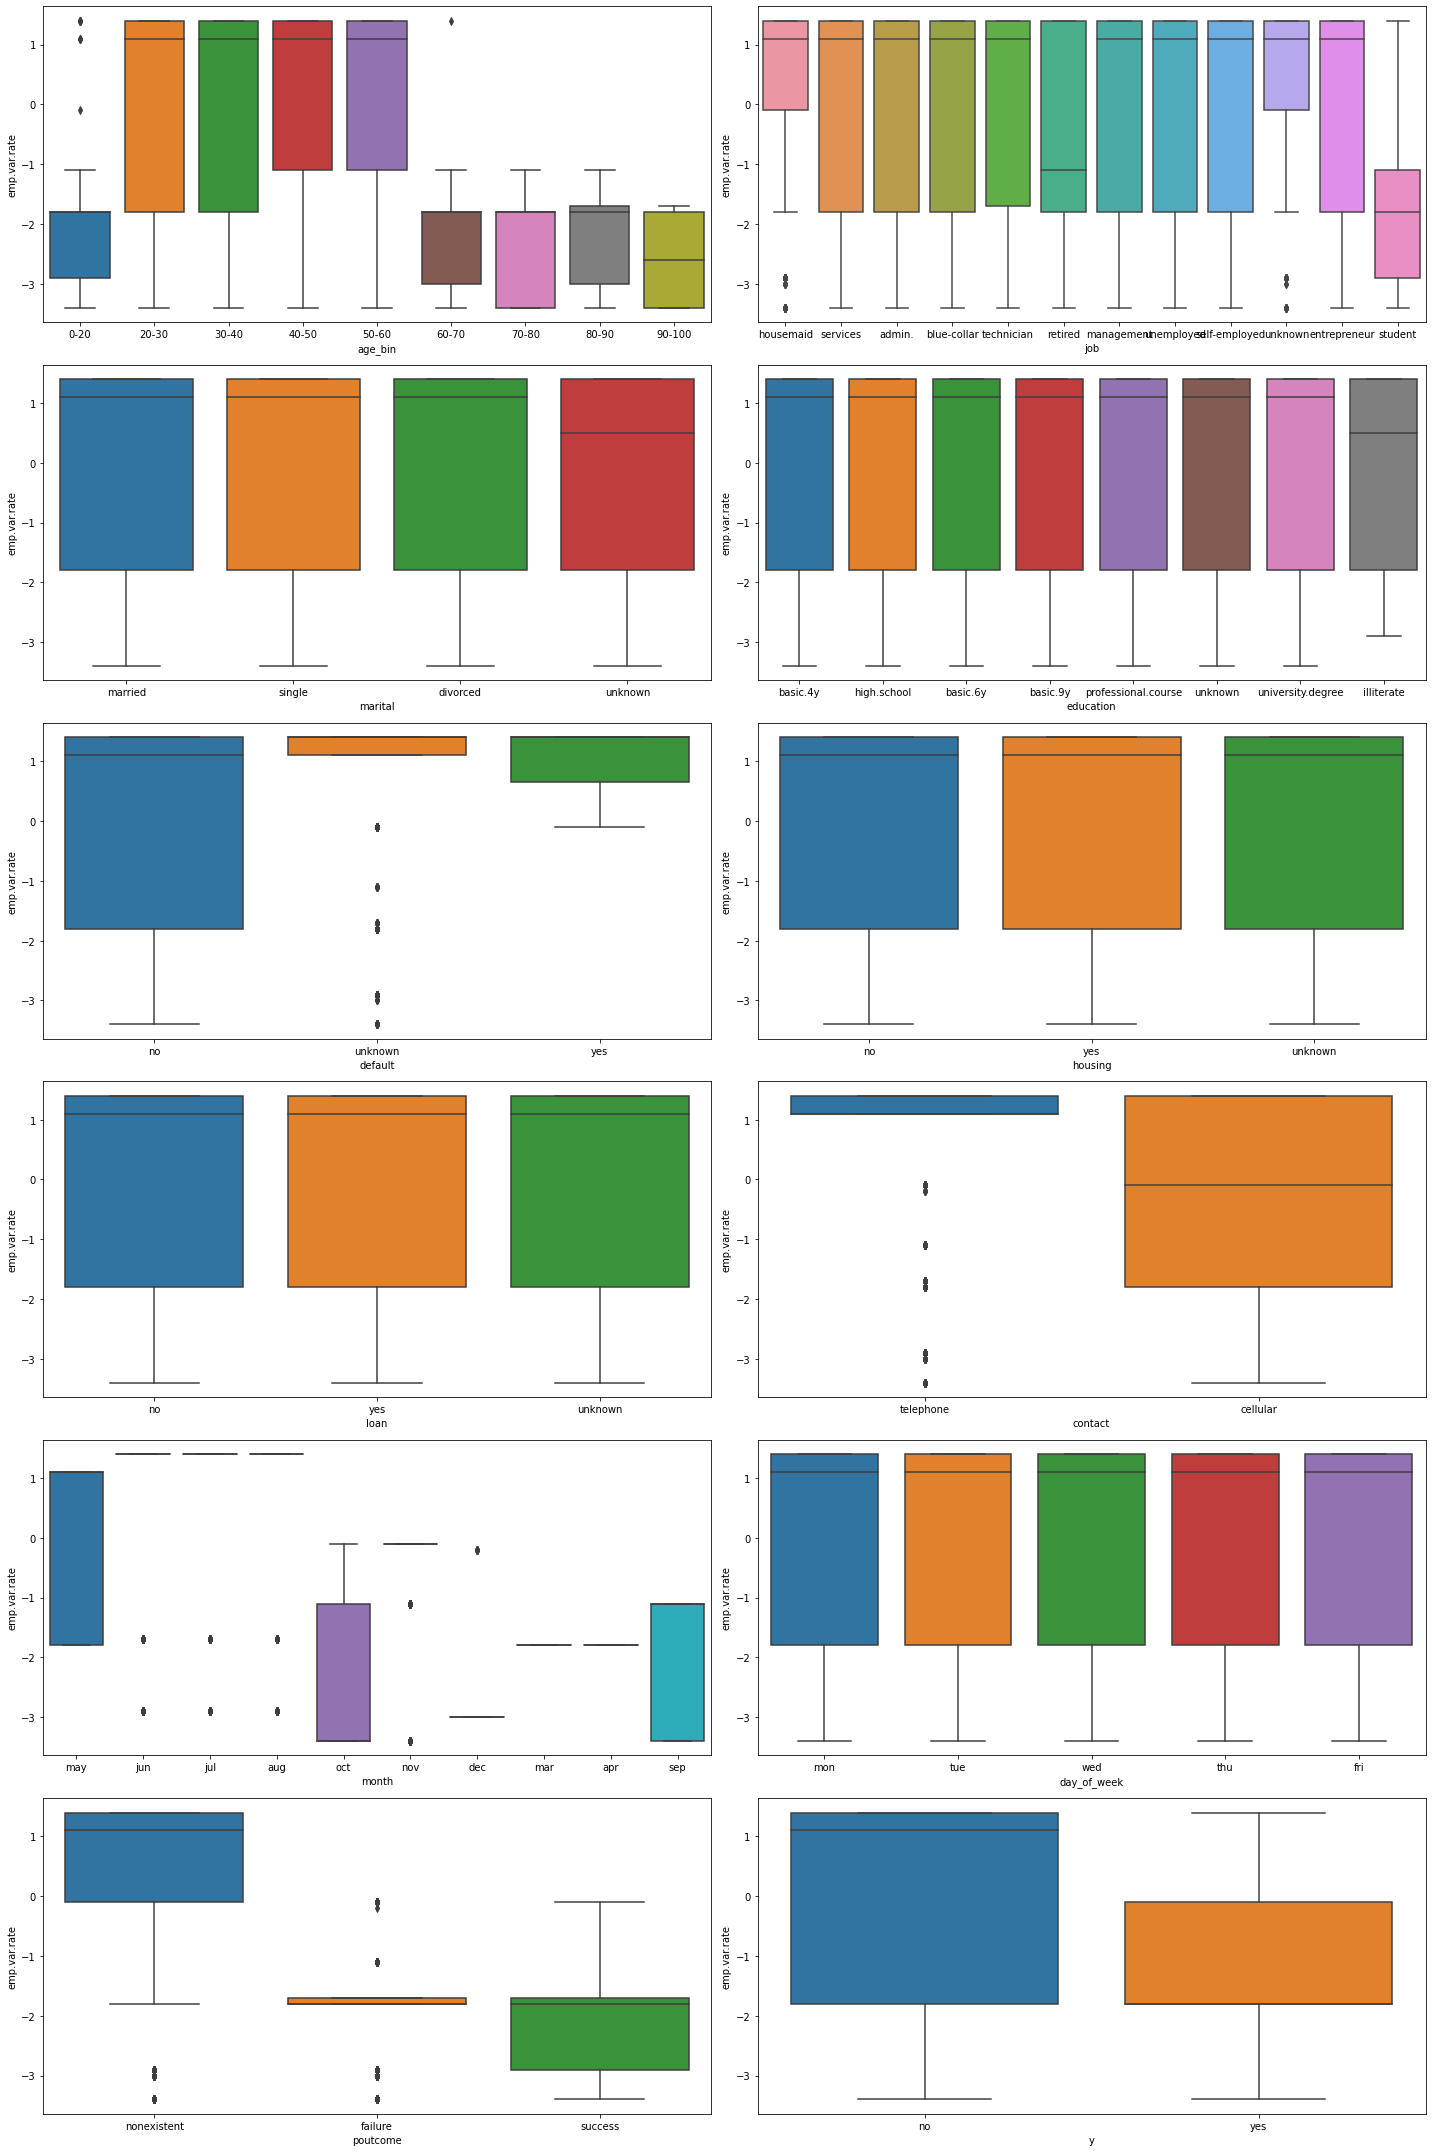

In [26]:
fig,ax = plt.subplots(6,2, figsize=(20,30)) 
i=0 
for a in range(6):
    for b in range(2):
        sns.boxplot(y=df['emp.var.rate'], x=df[cat[i]], ax = ax[a,b])
        i+=1
plt.tight_layout()
plt.show()

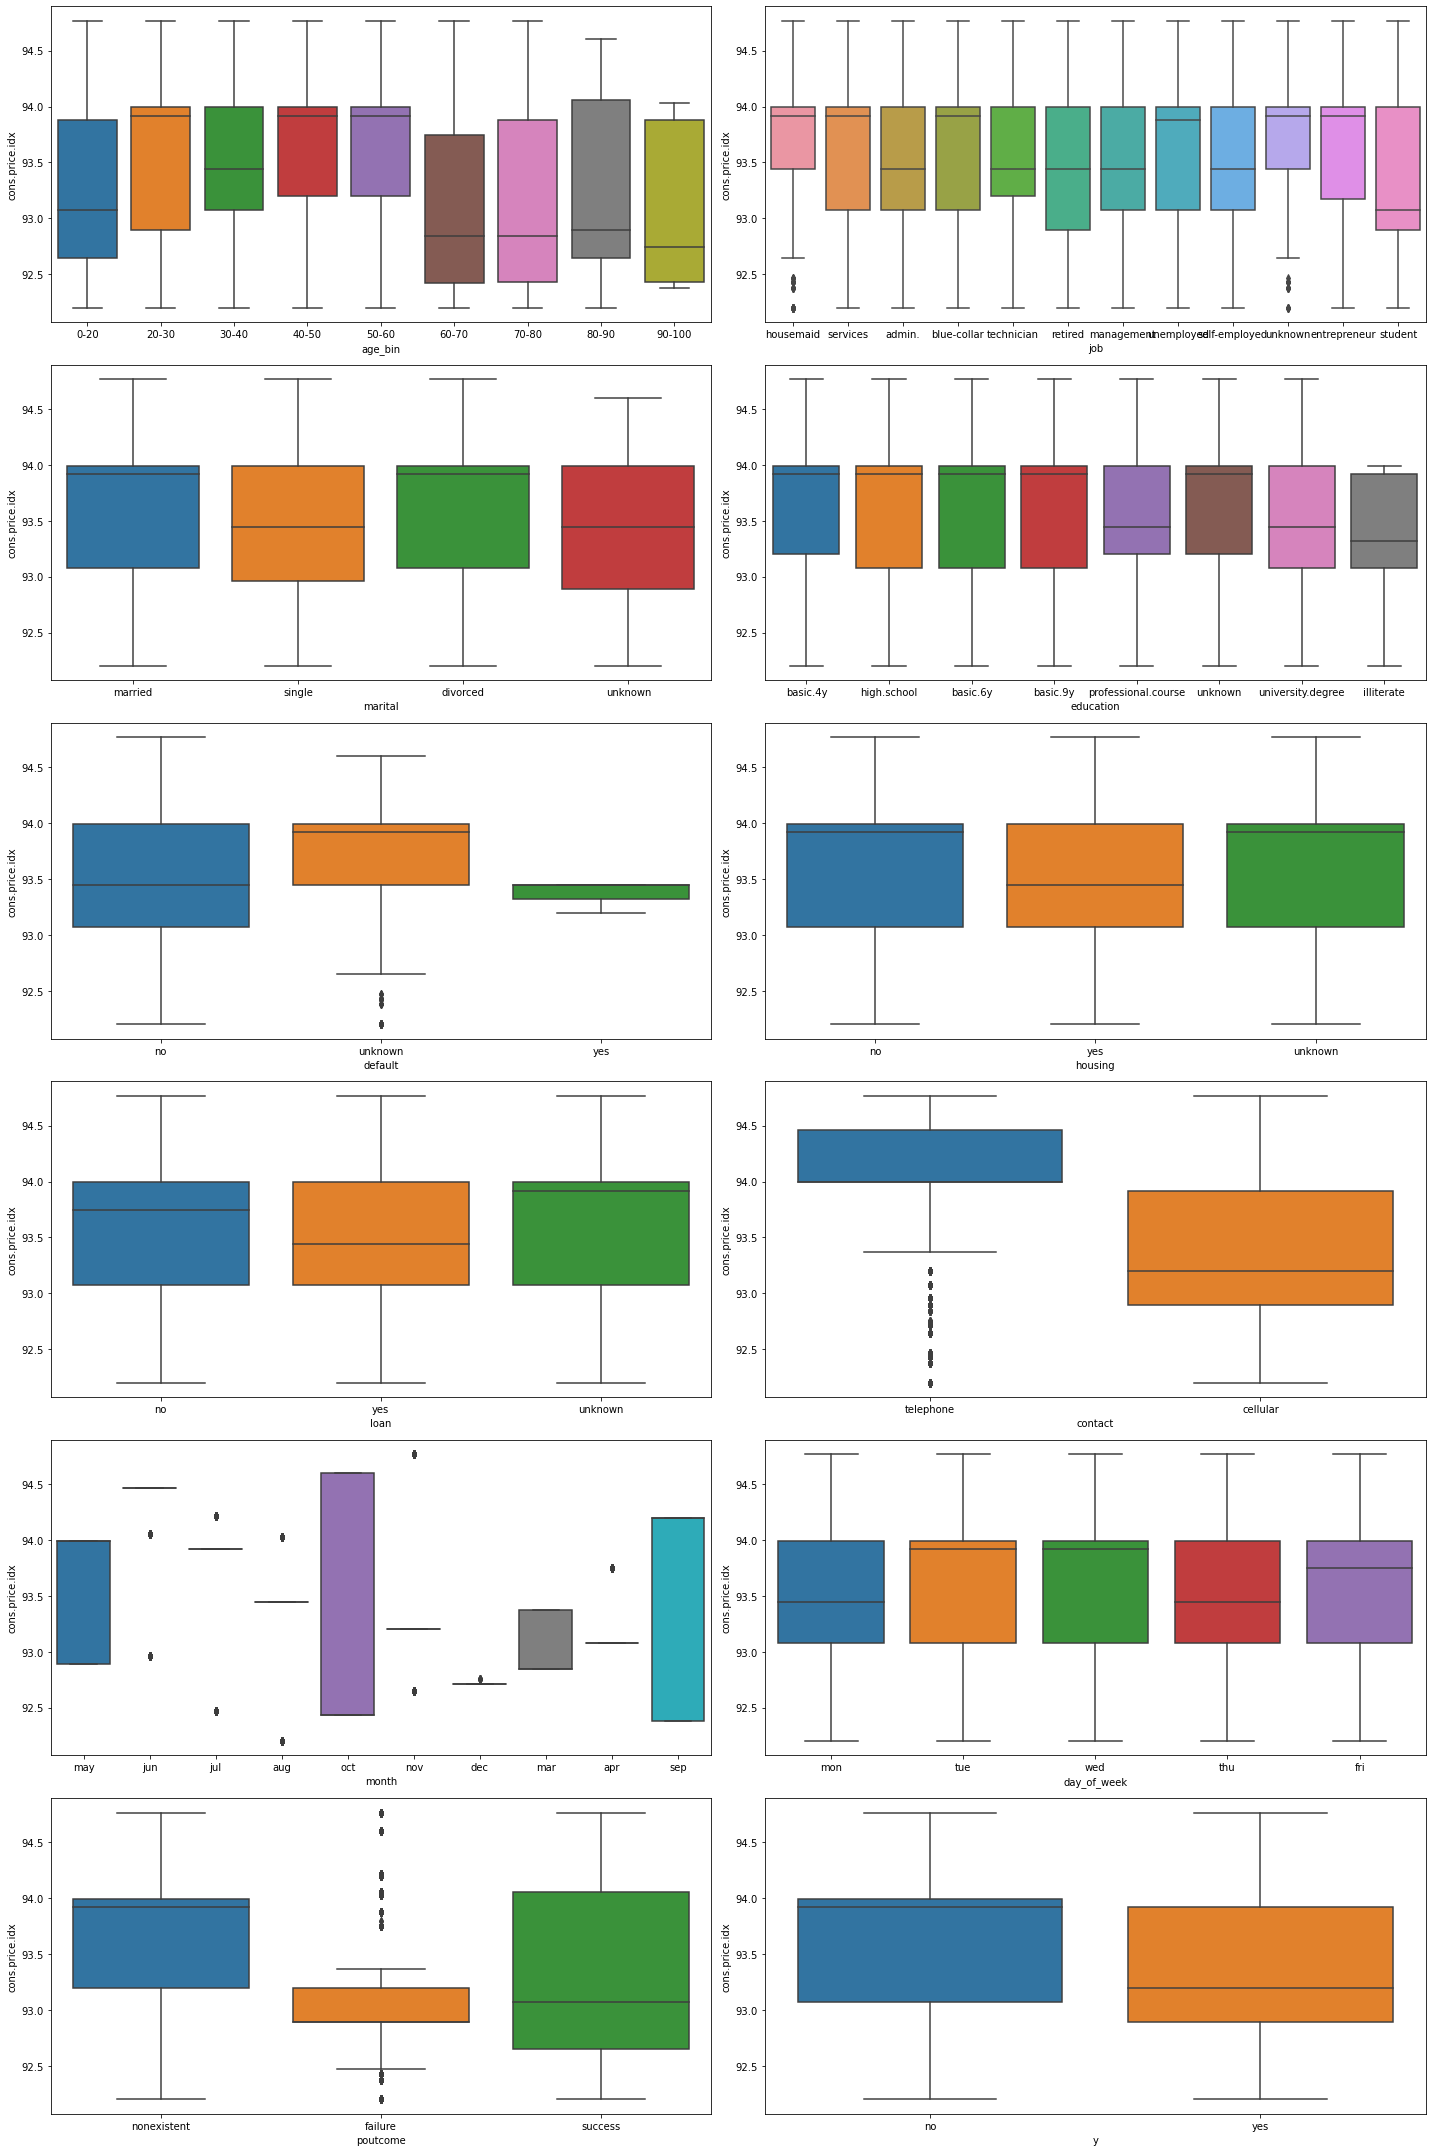

In [27]:
fig,ax = plt.subplots(6,2, figsize=(20,30)) 
i=0 
for a in range(6):
    for b in range(2):
        sns.boxplot(y=df['cons.price.idx'], x=df[cat[i]], ax = ax[a,b])
        i+=1
plt.tight_layout()
plt.show()

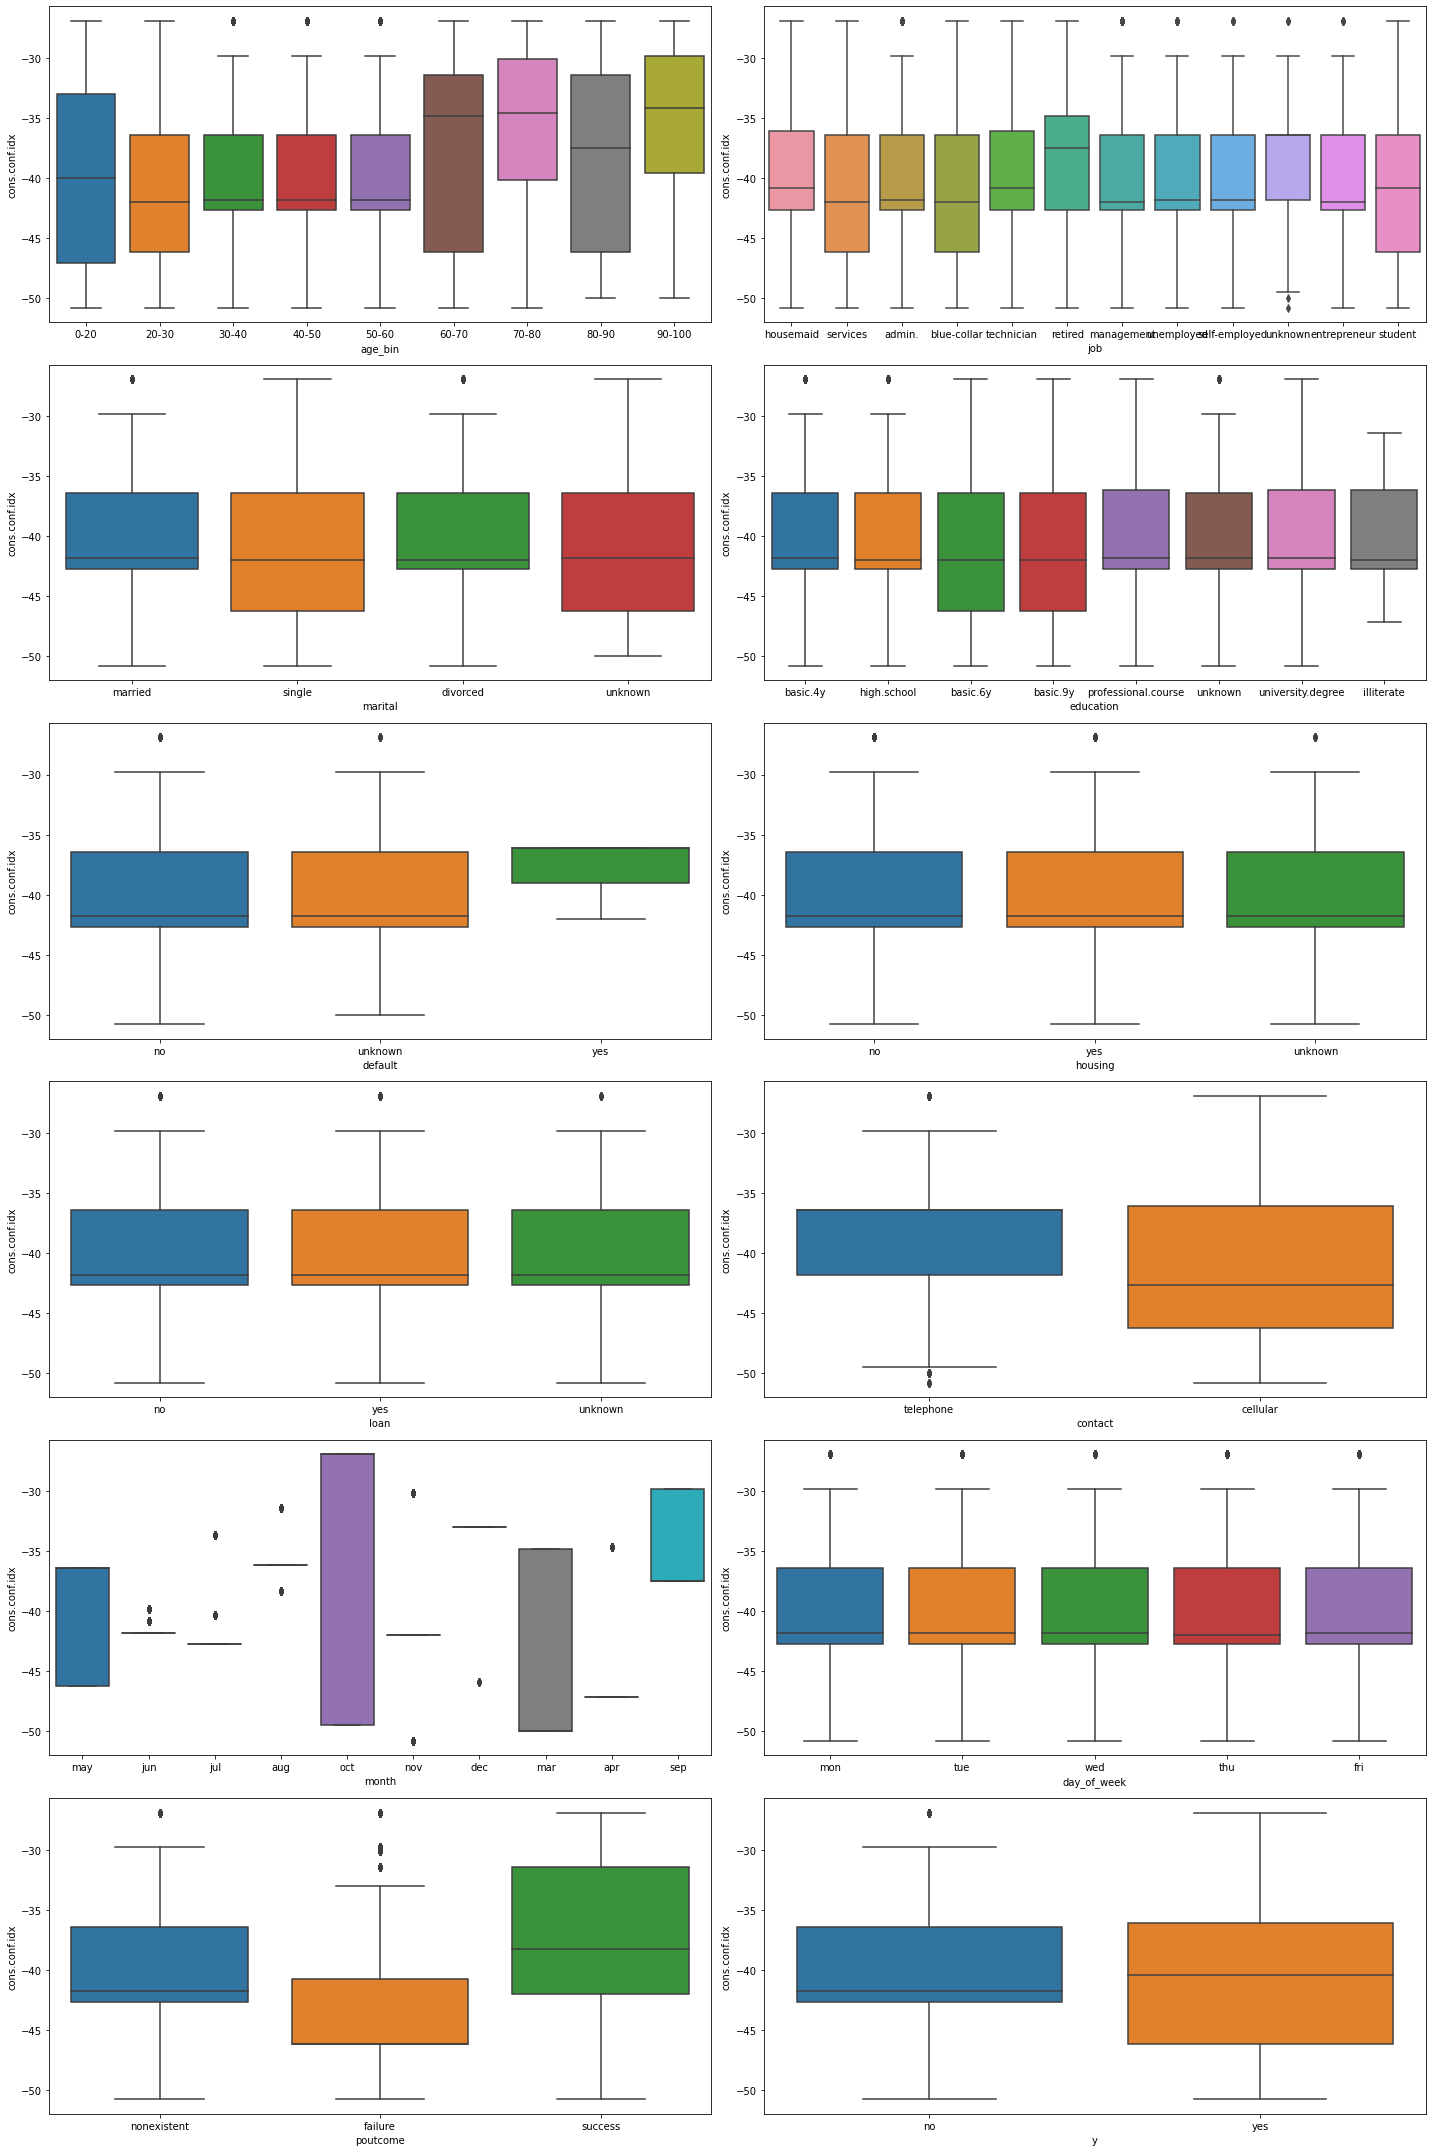

In [28]:
fig,ax = plt.subplots(6,2, figsize=(20,30)) 
i=0 
for a in range(6):
    for b in range(2):
        sns.boxplot(y=df['cons.conf.idx'], x=df[cat[i]], ax = ax[a,b])
        i+=1
plt.tight_layout()
plt.show()

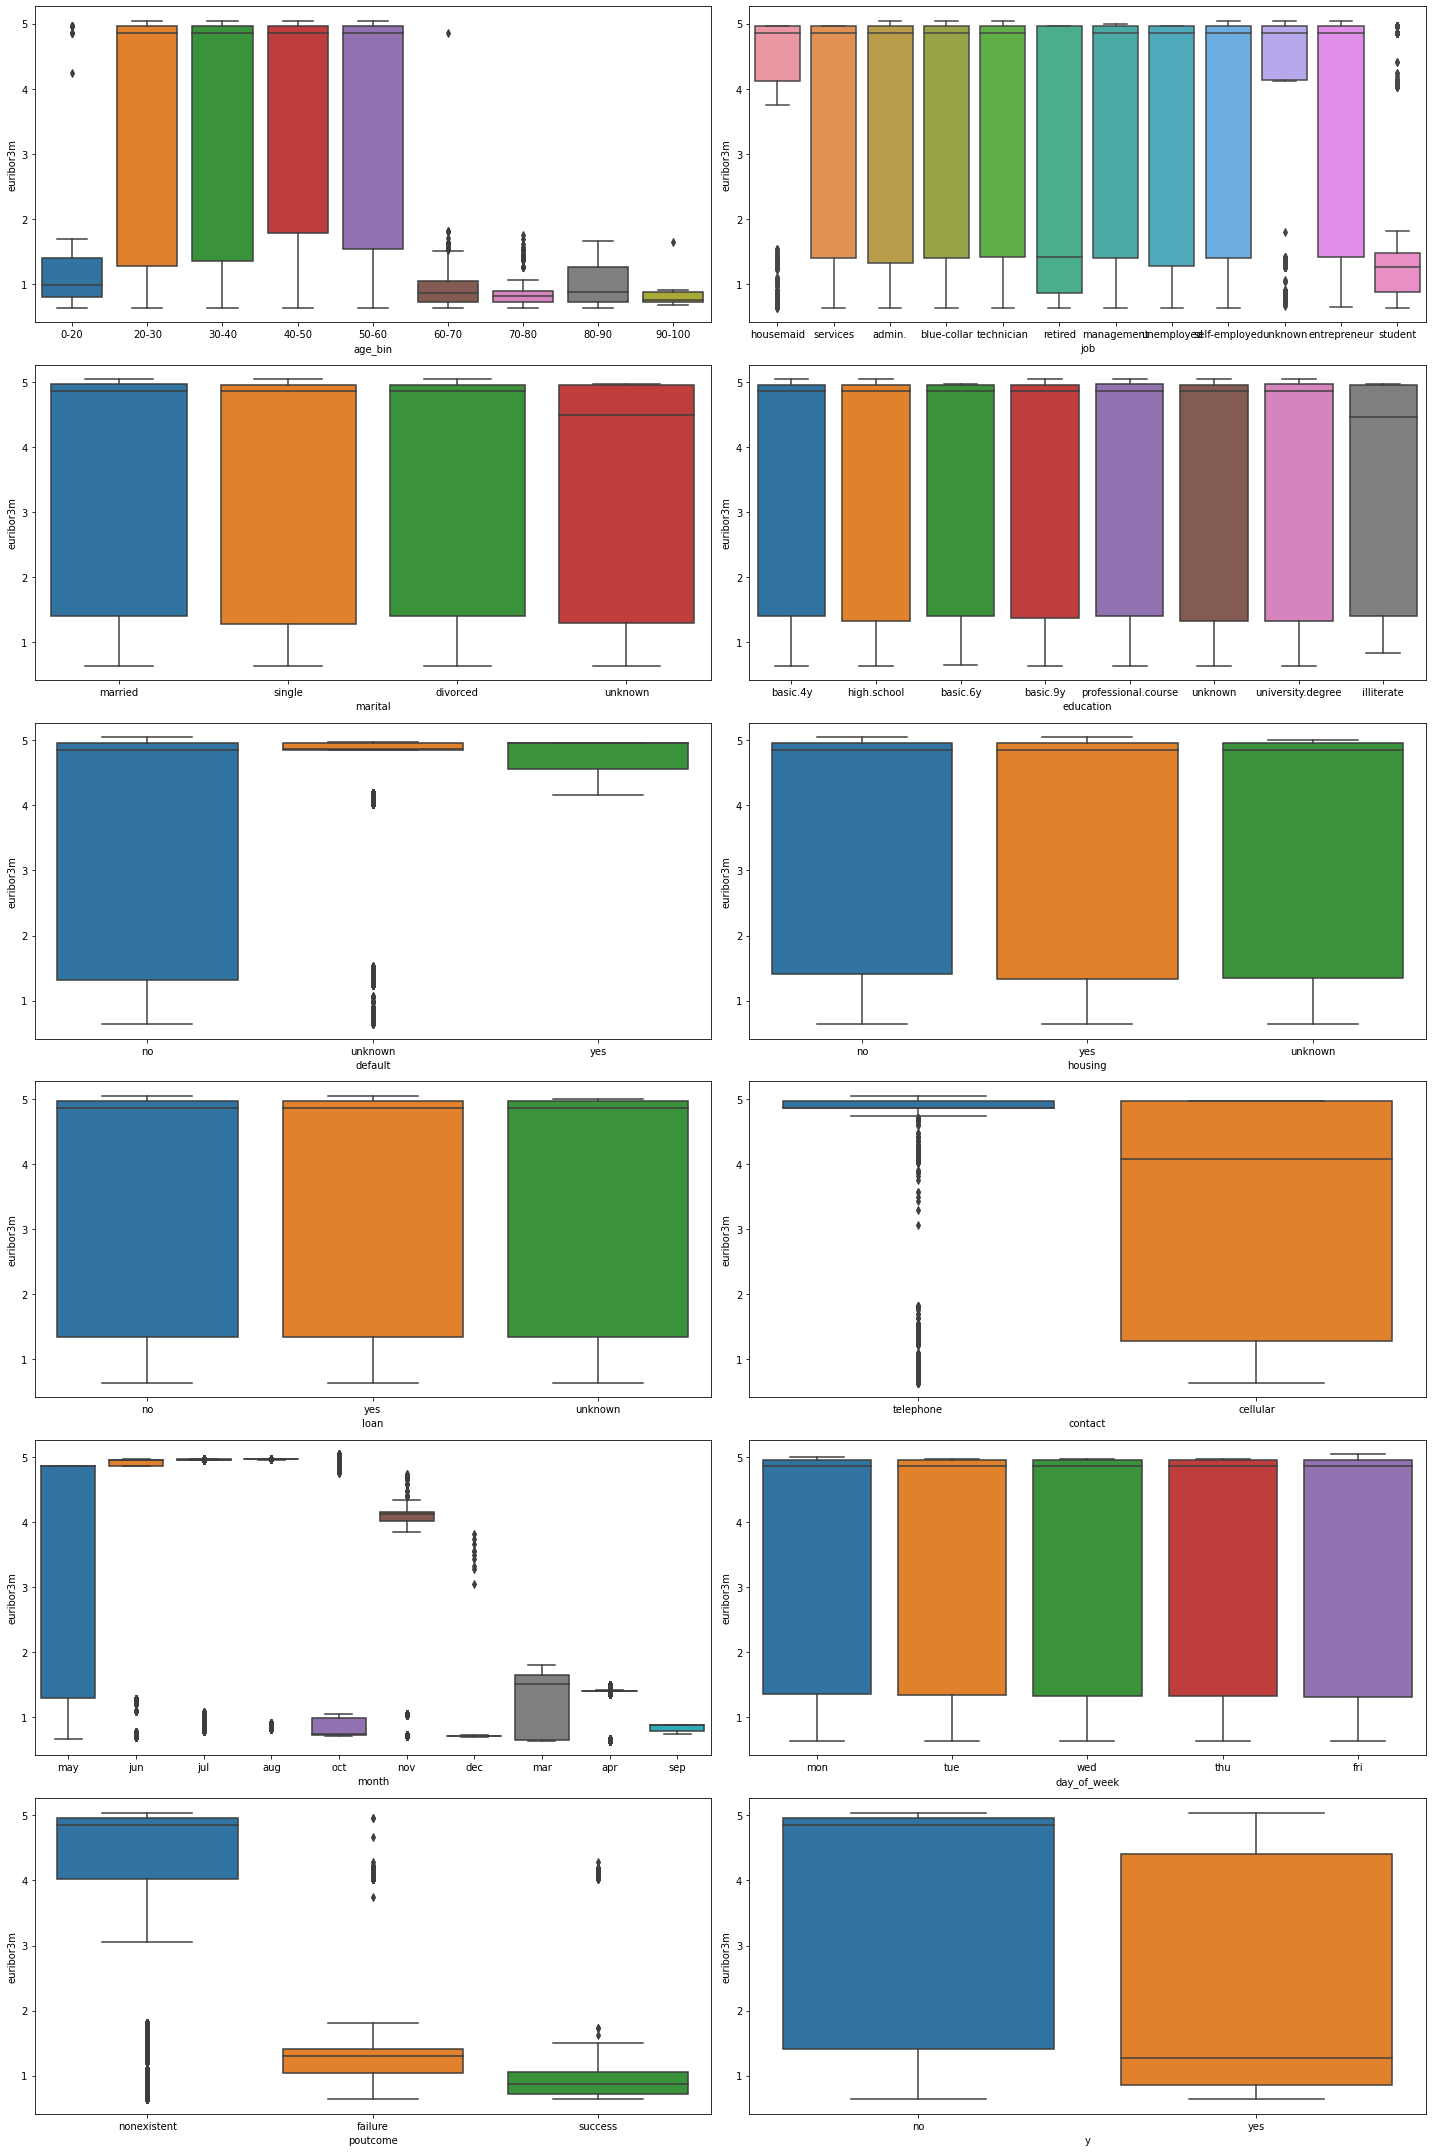

In [29]:
fig,ax = plt.subplots(6,2, figsize=(20,30)) 
i=0 
for a in range(6):
    for b in range(2):
        sns.boxplot(y=df['euribor3m'], x=df[cat[i]], ax = ax[a,b])
        i+=1
plt.tight_layout()
plt.show()

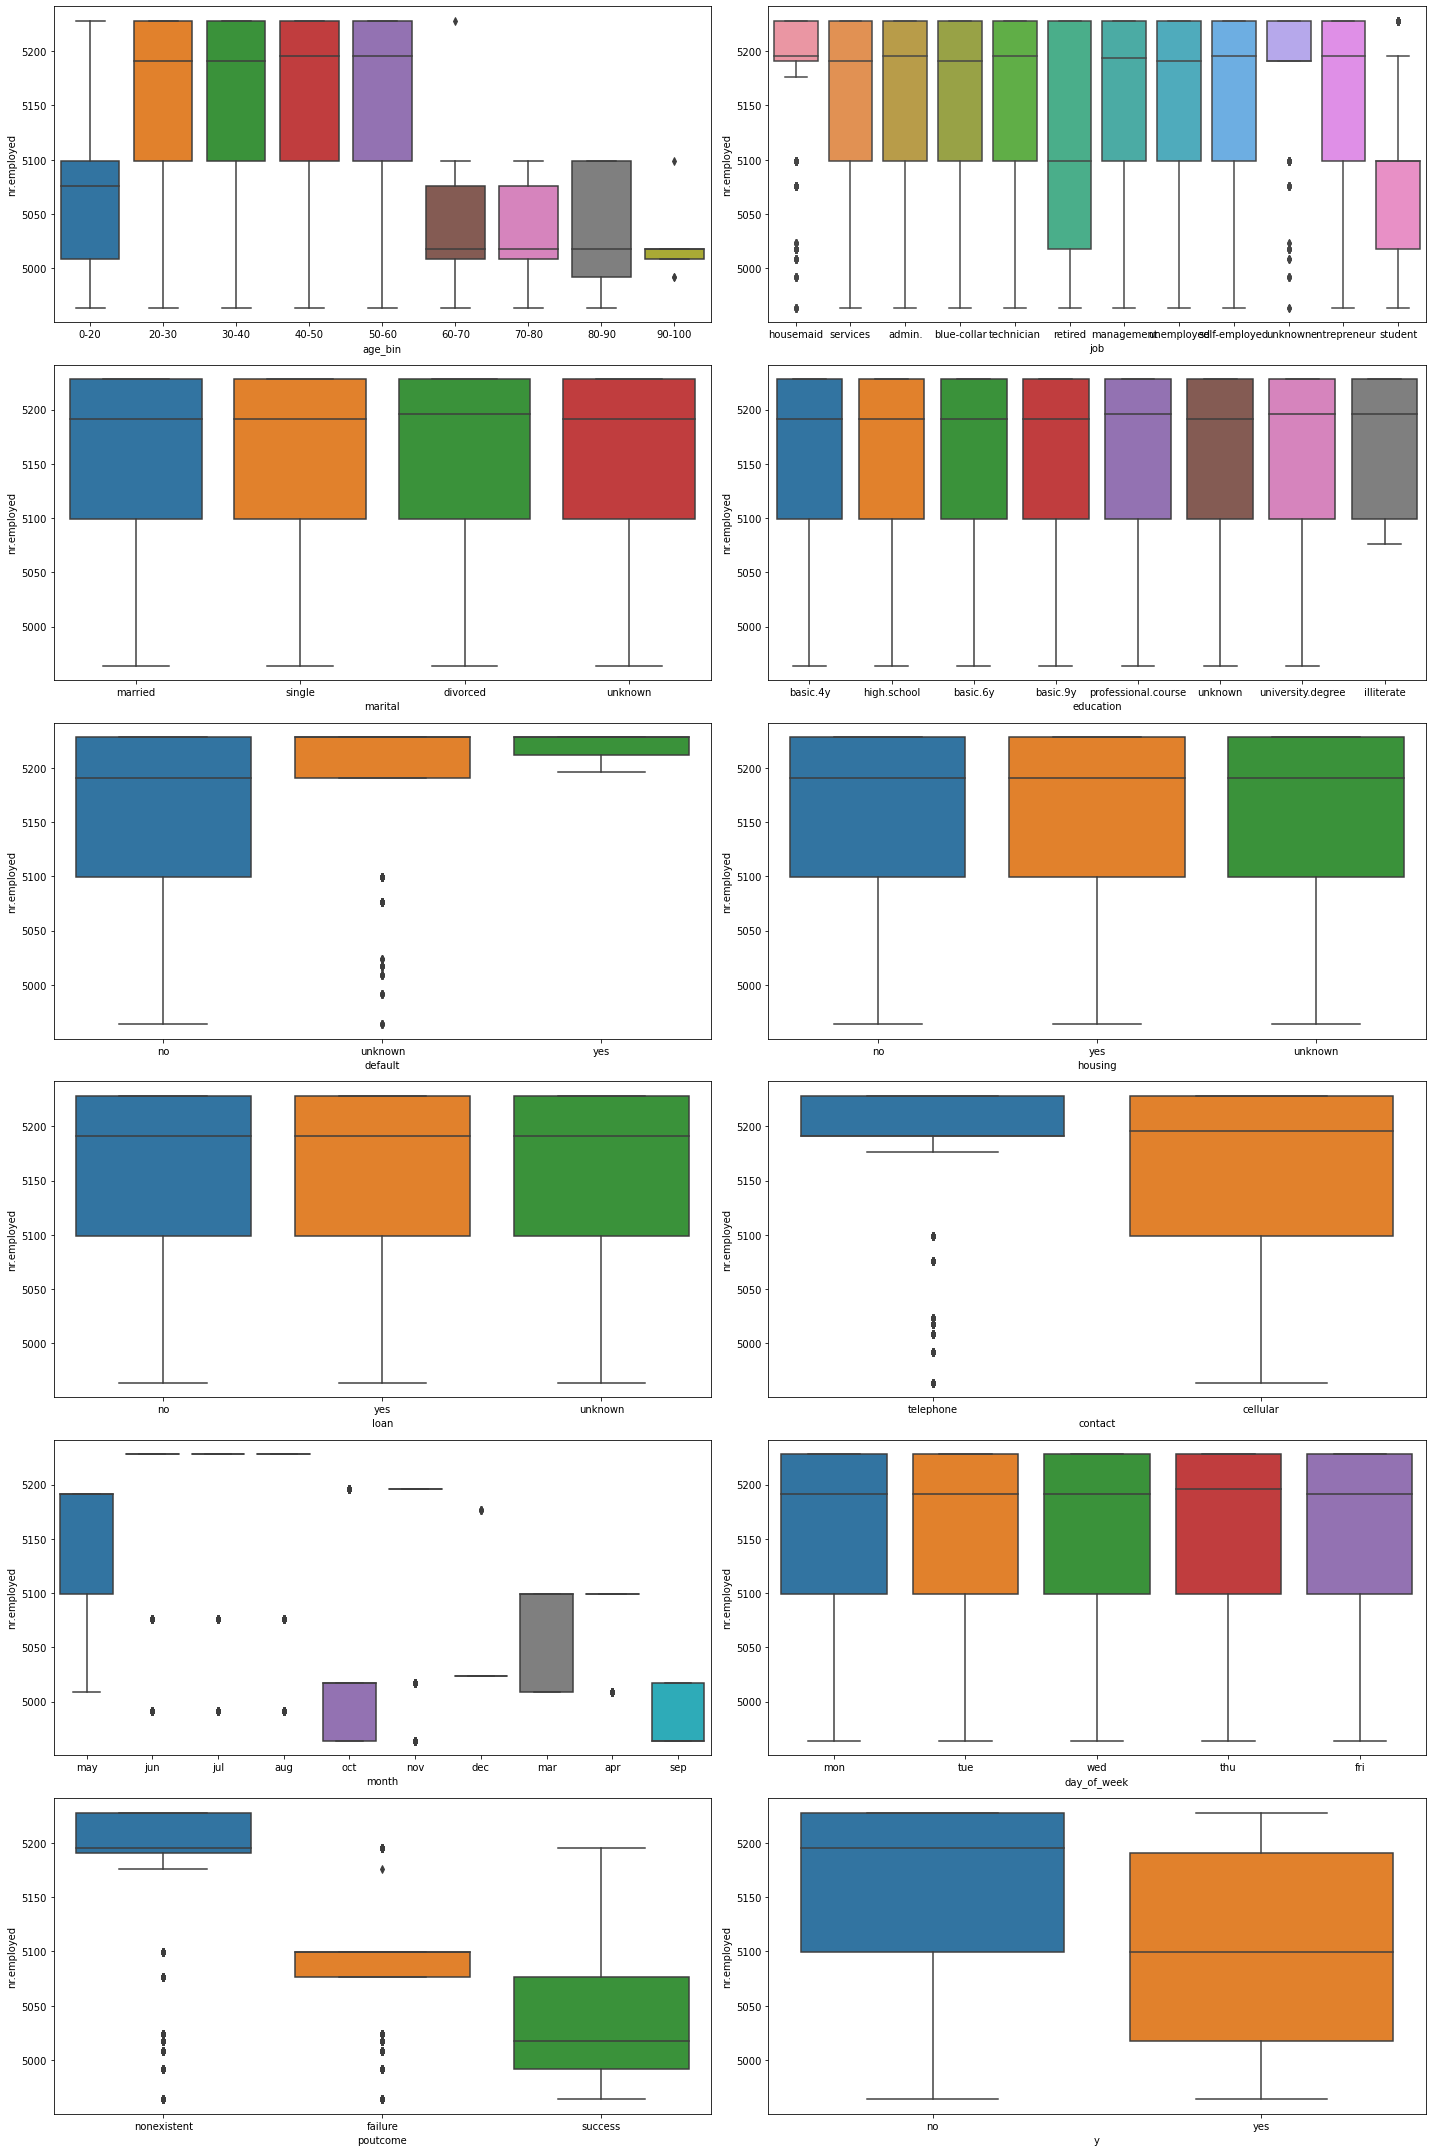

In [30]:
fig,ax = plt.subplots(6,2, figsize=(20,30)) 
i=0 
for a in range(6):
    for b in range(2):
        sns.boxplot(y=df['nr.employed'], x=df[cat[i]], ax = ax[a,b])
        i+=1
plt.tight_layout()
plt.show()

In [31]:
cat

['age_bin',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'poutcome',
 'y']

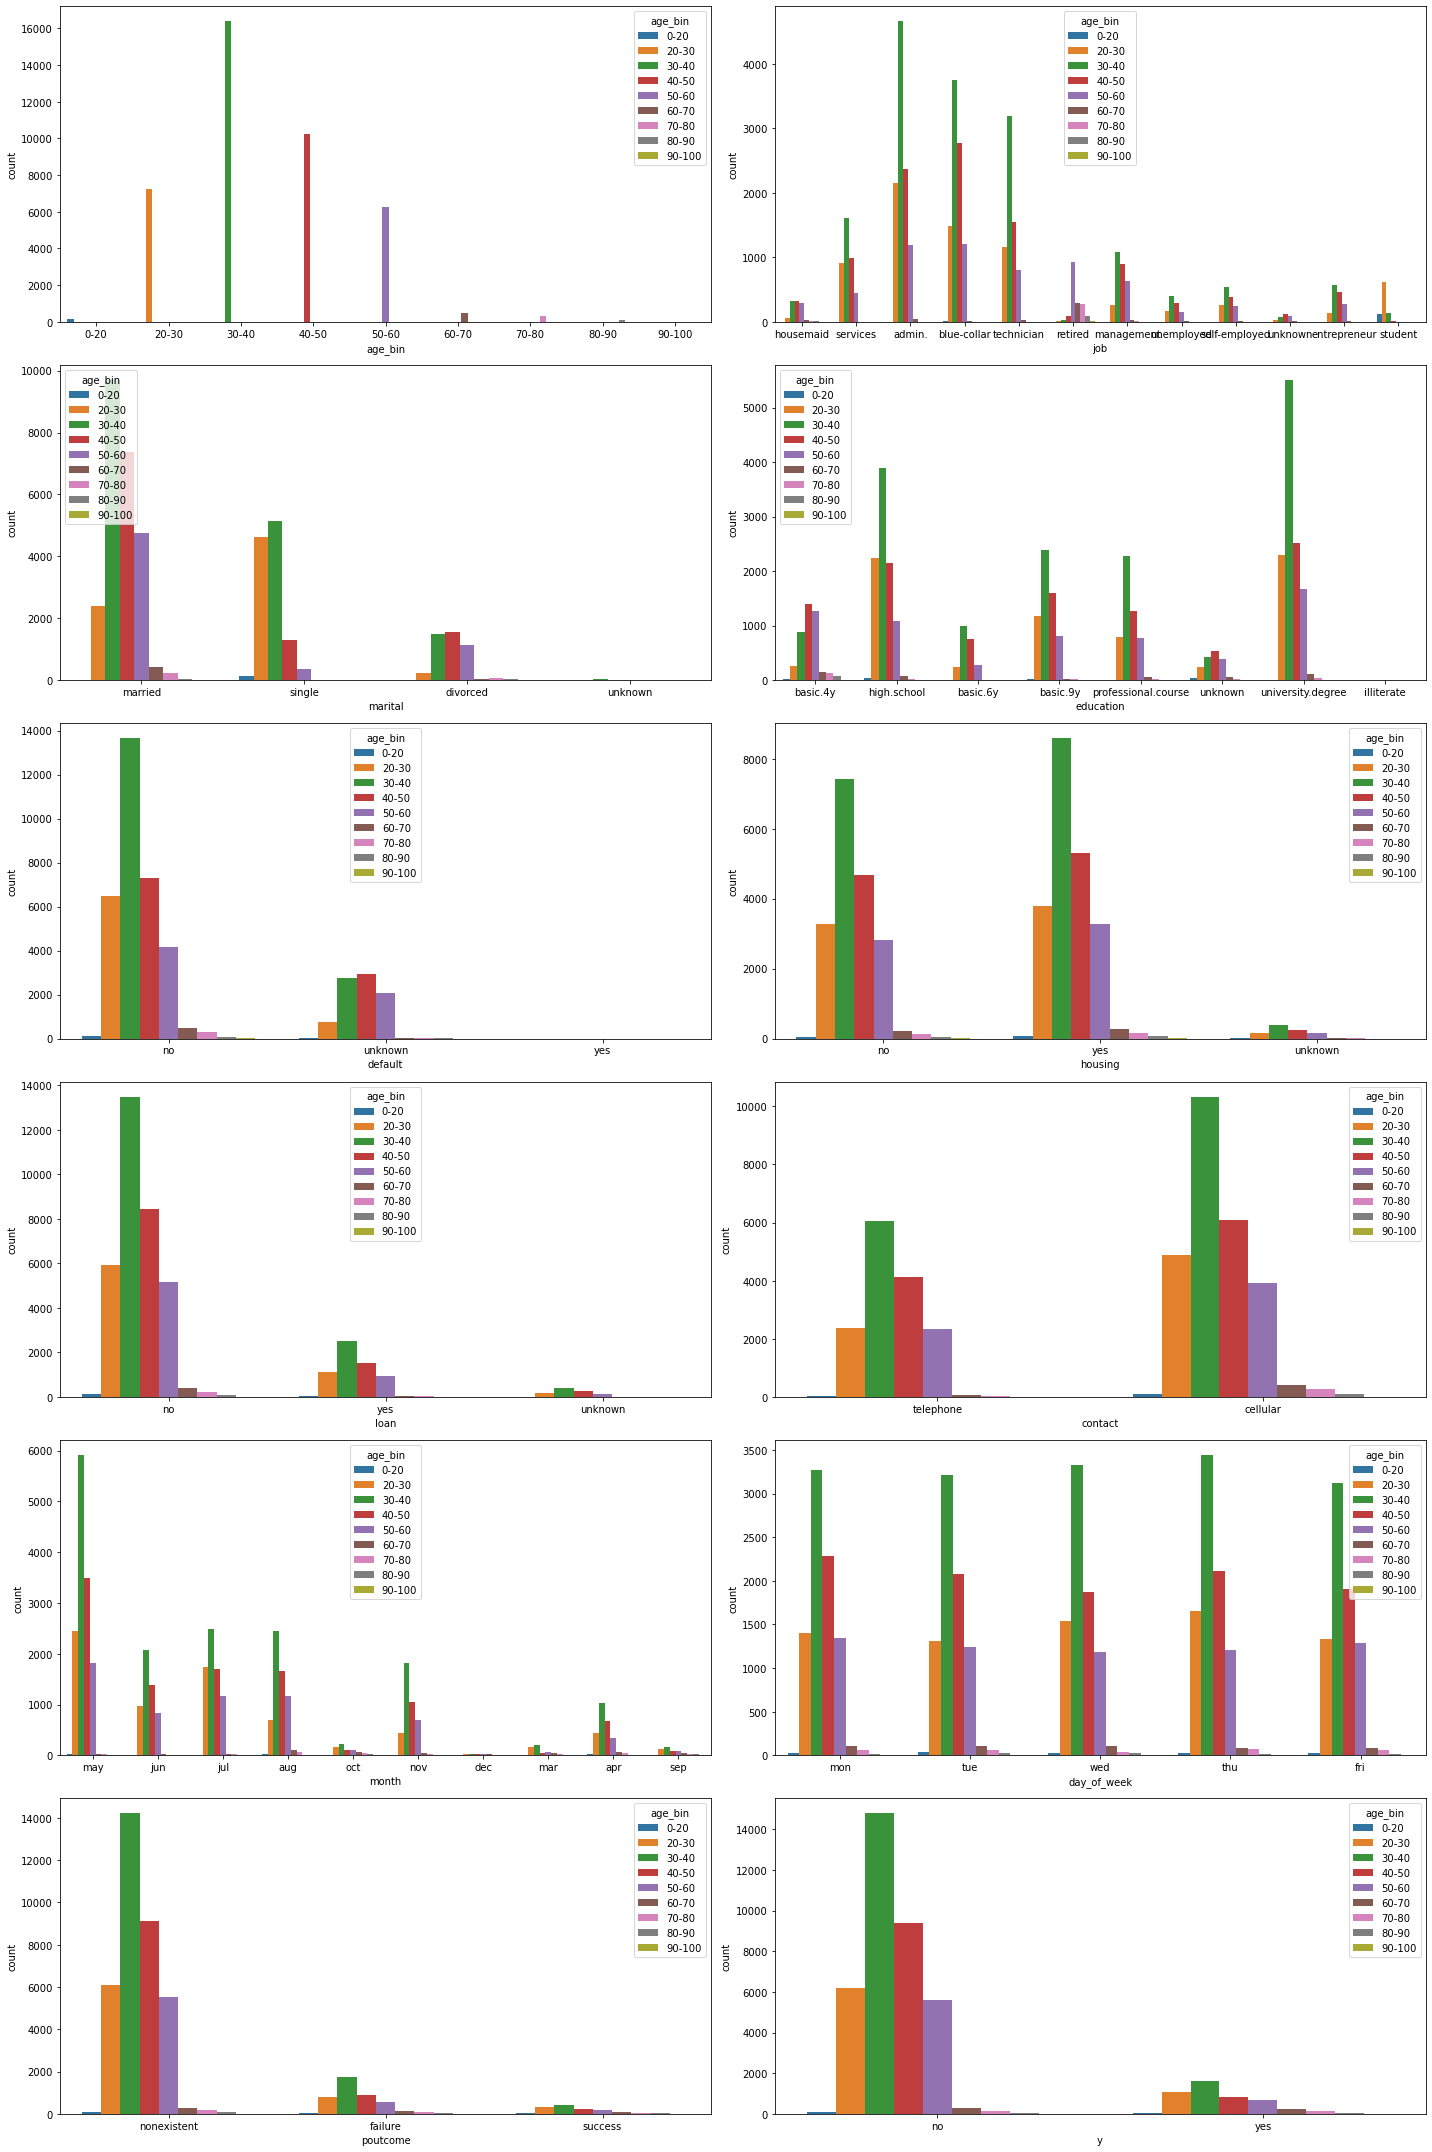

In [32]:
# Vislualize bivariate between numeric and categorical data
fig,ax = plt.subplots(6,2, figsize=(20,30)) 
i=0 
for a in range(6):
    for b in range(2):
        sns.countplot(x=df[cat[i]], hue=df['age_bin'], ax = ax[a,b])
        i+=1
plt.tight_layout()
plt.show()

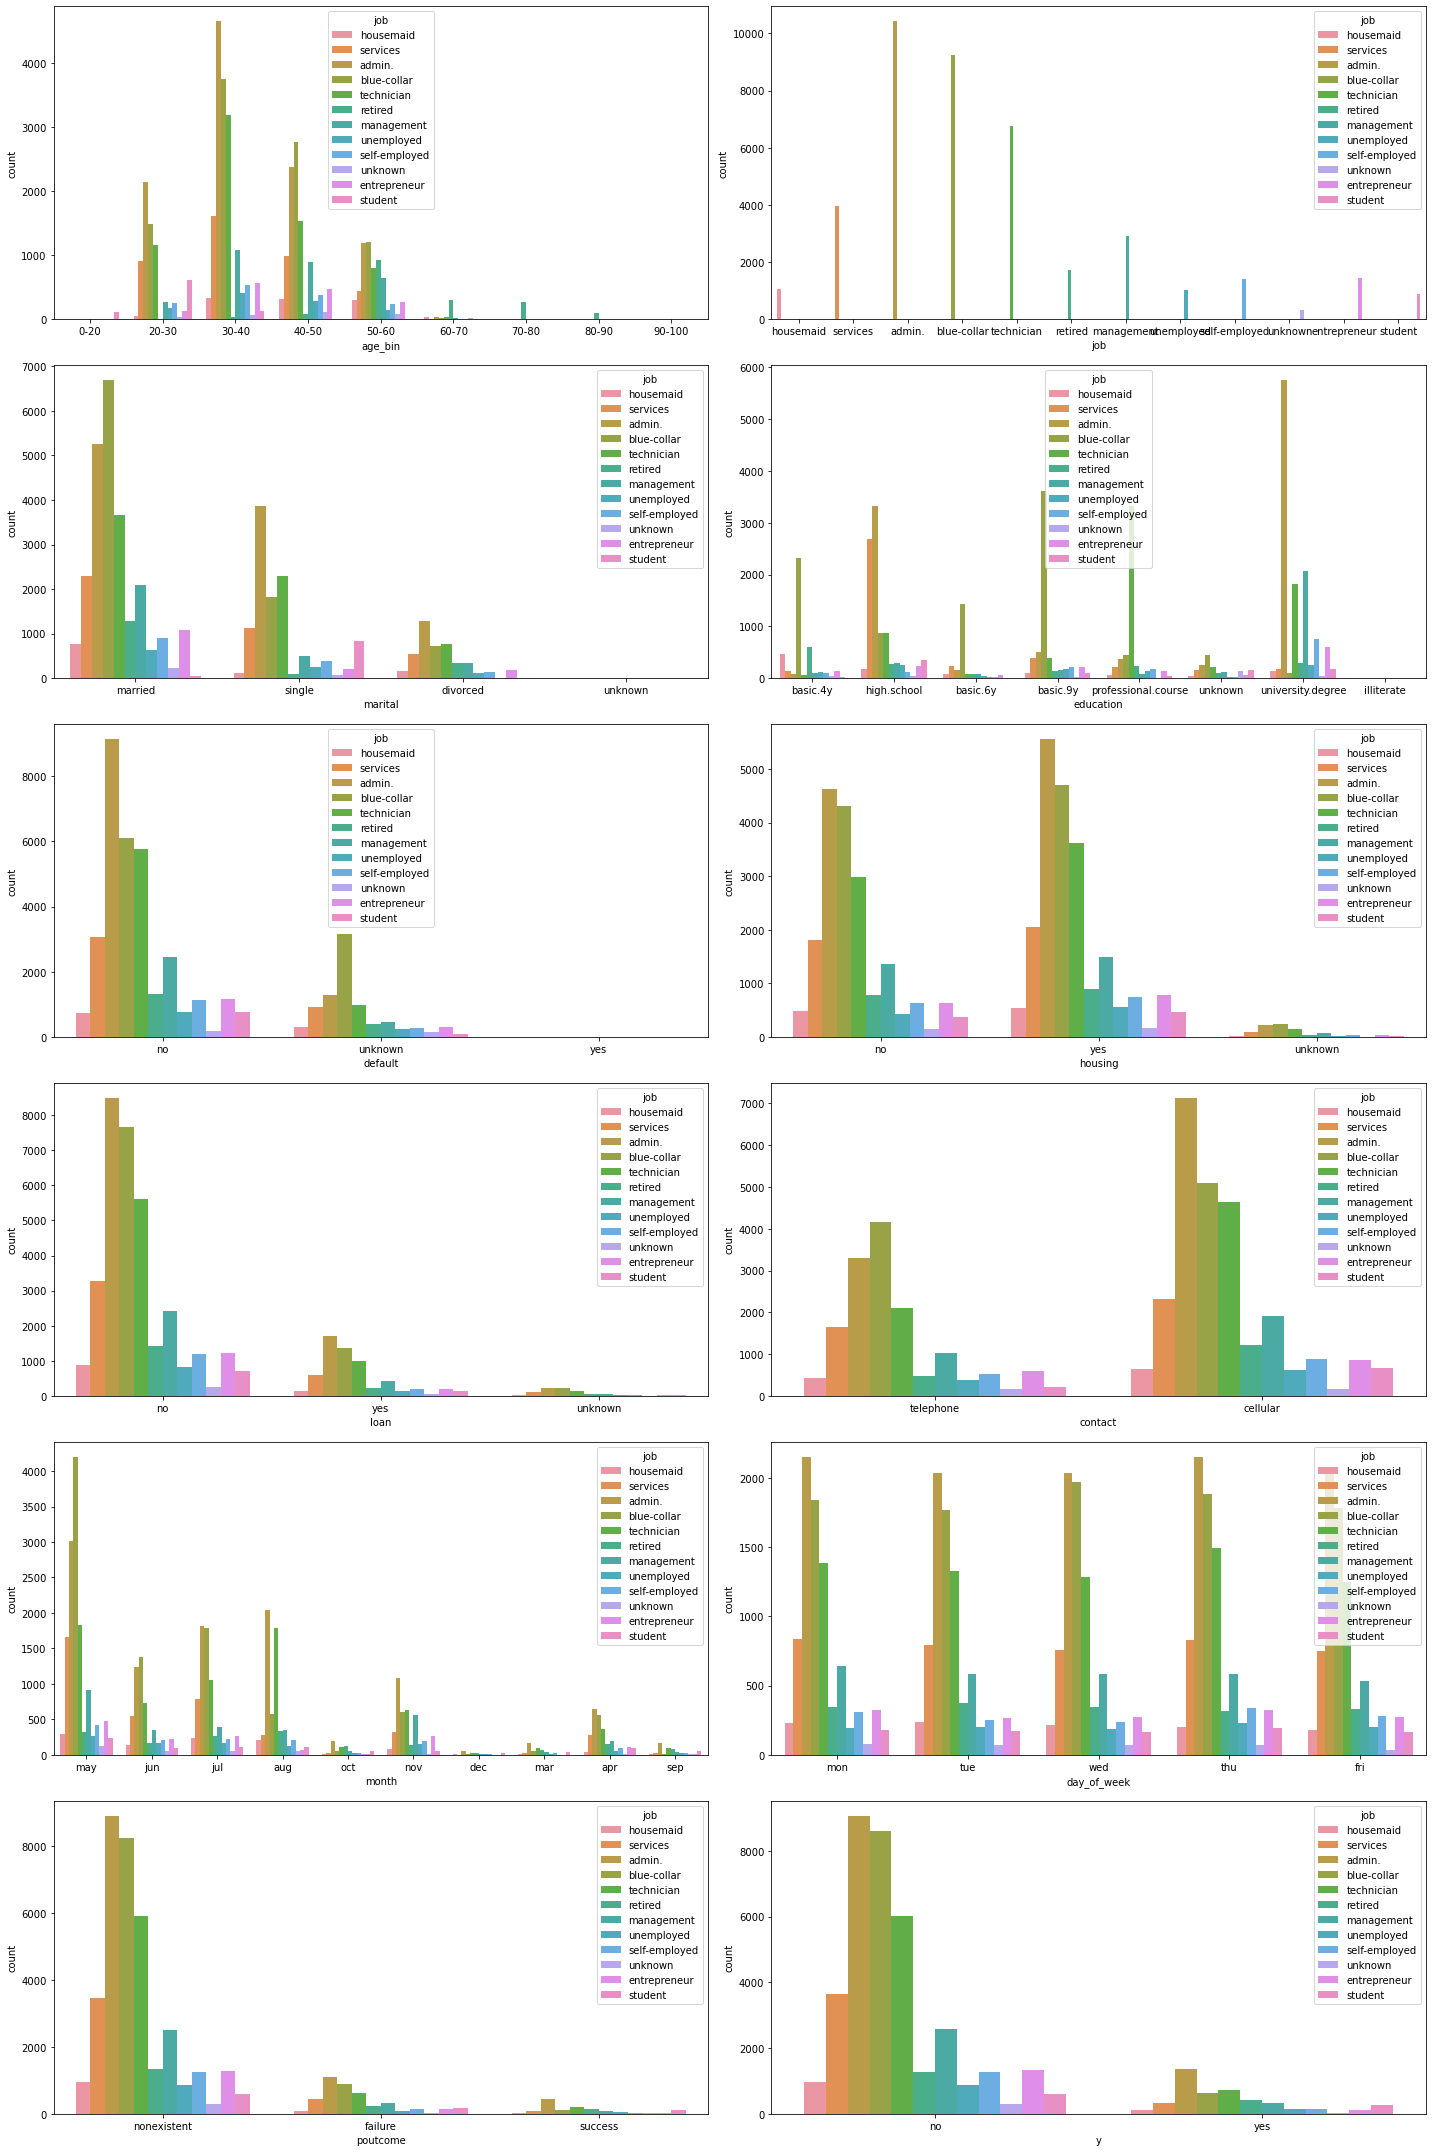

In [33]:
fig,ax = plt.subplots(6,2, figsize=(20,30)) 
i=0 
for a in range(6):
    for b in range(2):
        sns.countplot(x=df[cat[i]], hue=df['job'], ax = ax[a,b])
        i+=1
plt.tight_layout()
plt.show()

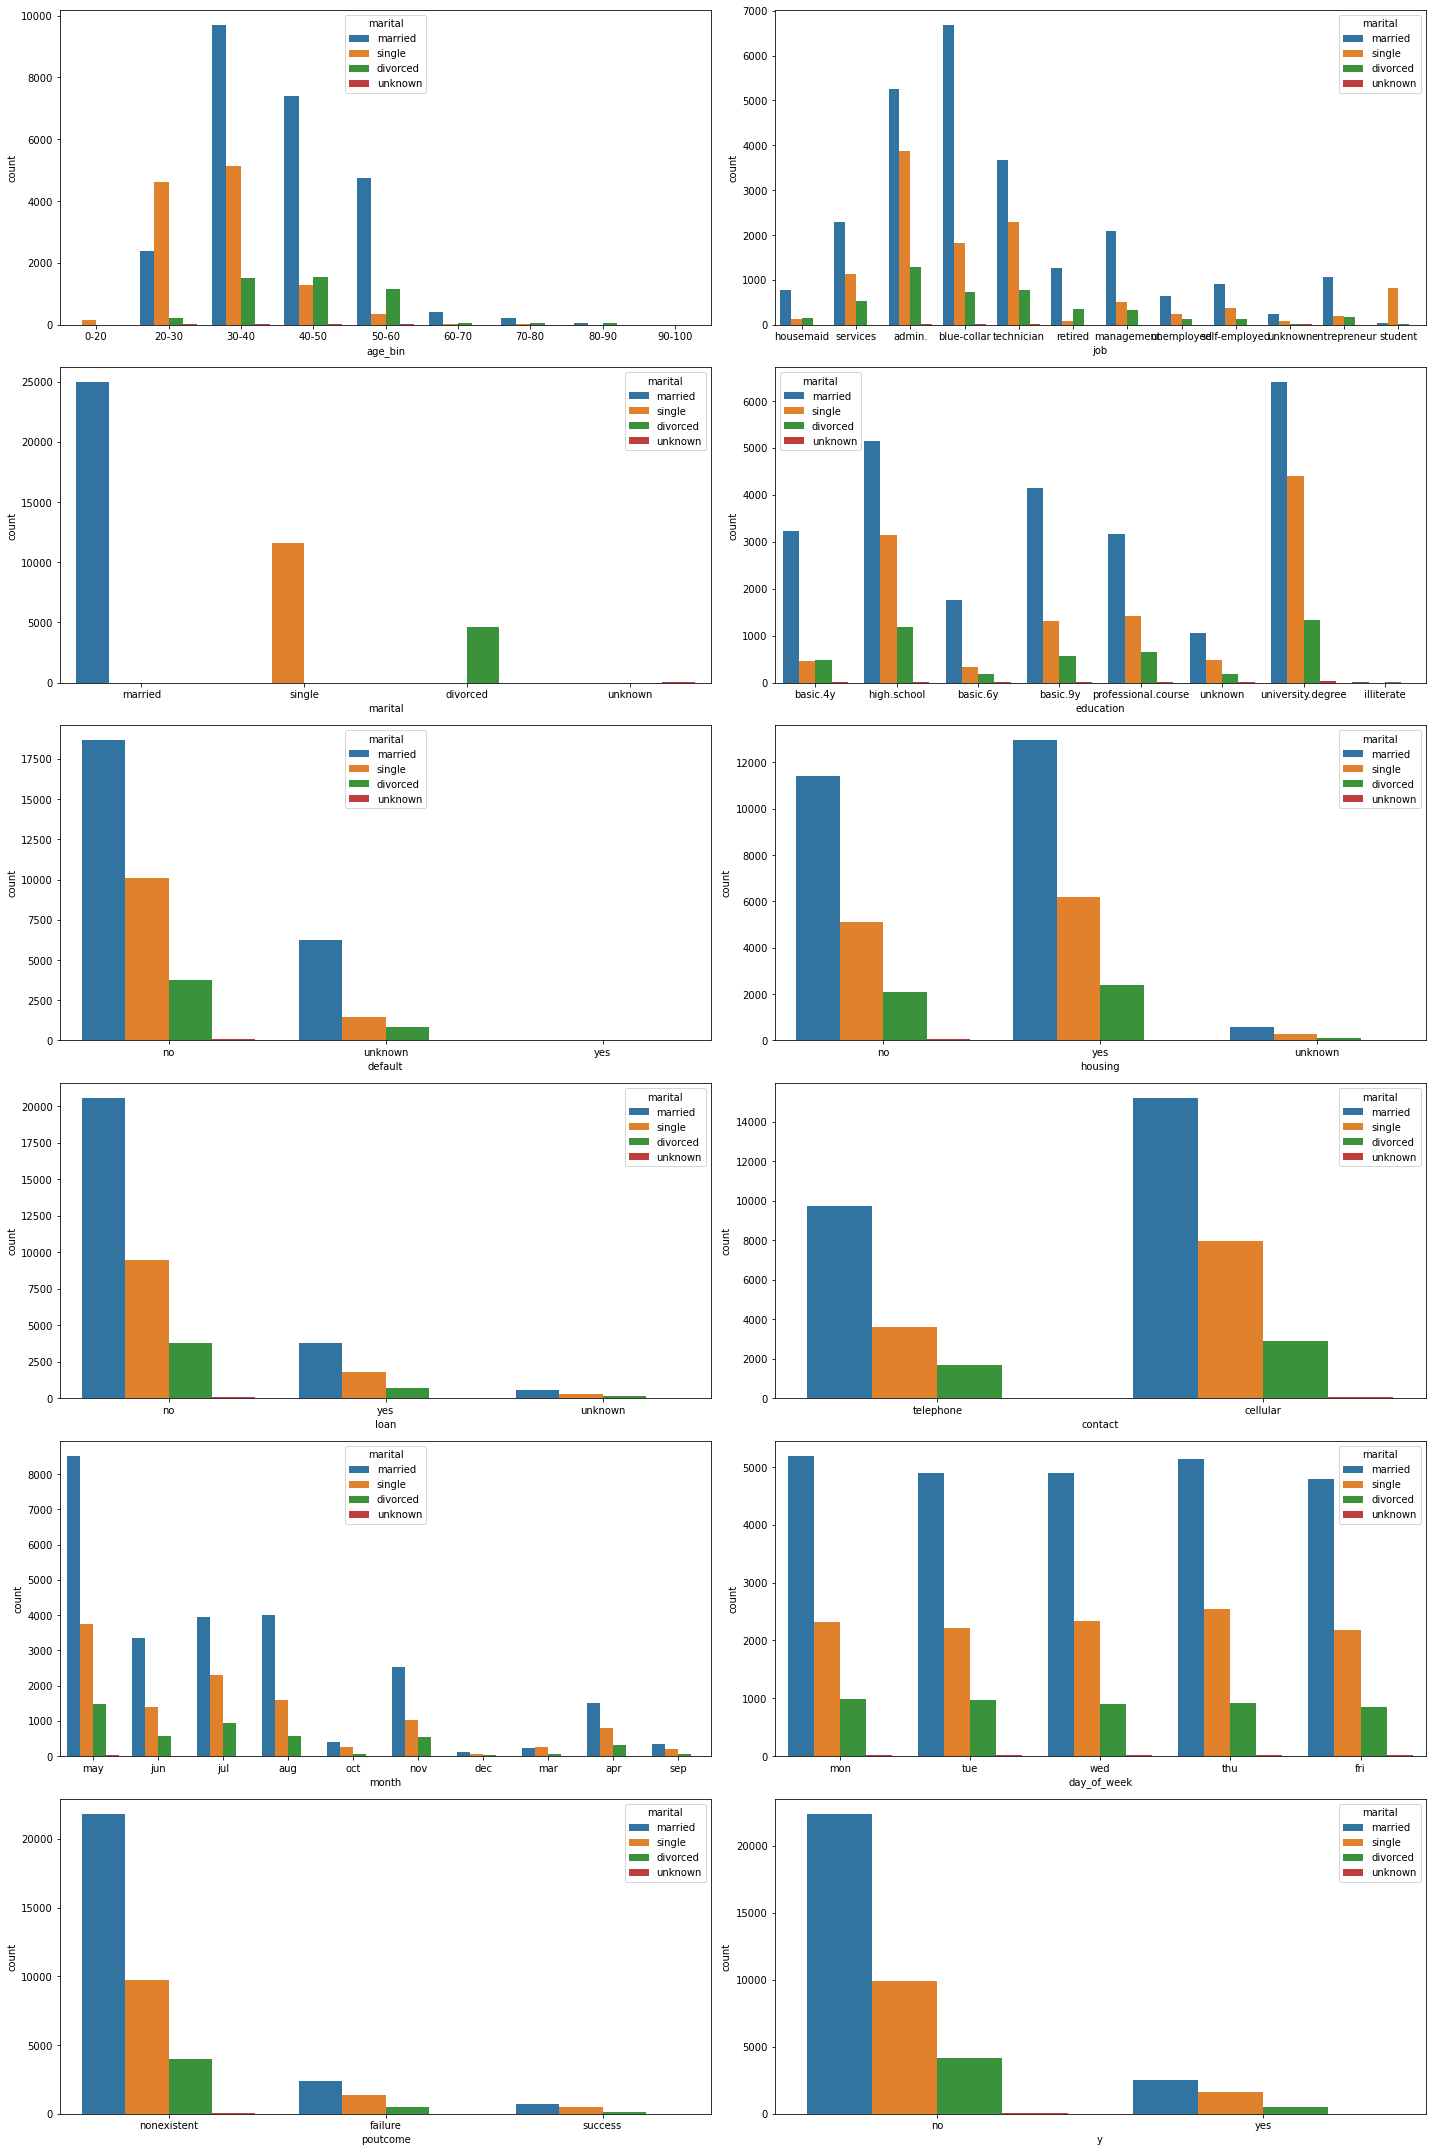

In [34]:
fig,ax = plt.subplots(6,2, figsize=(20,30)) 
i=0 
for a in range(6):
    for b in range(2):
        sns.countplot(x=df[cat[i]], hue=df['marital'], ax = ax[a,b])
        i+=1
plt.tight_layout()
plt.show()

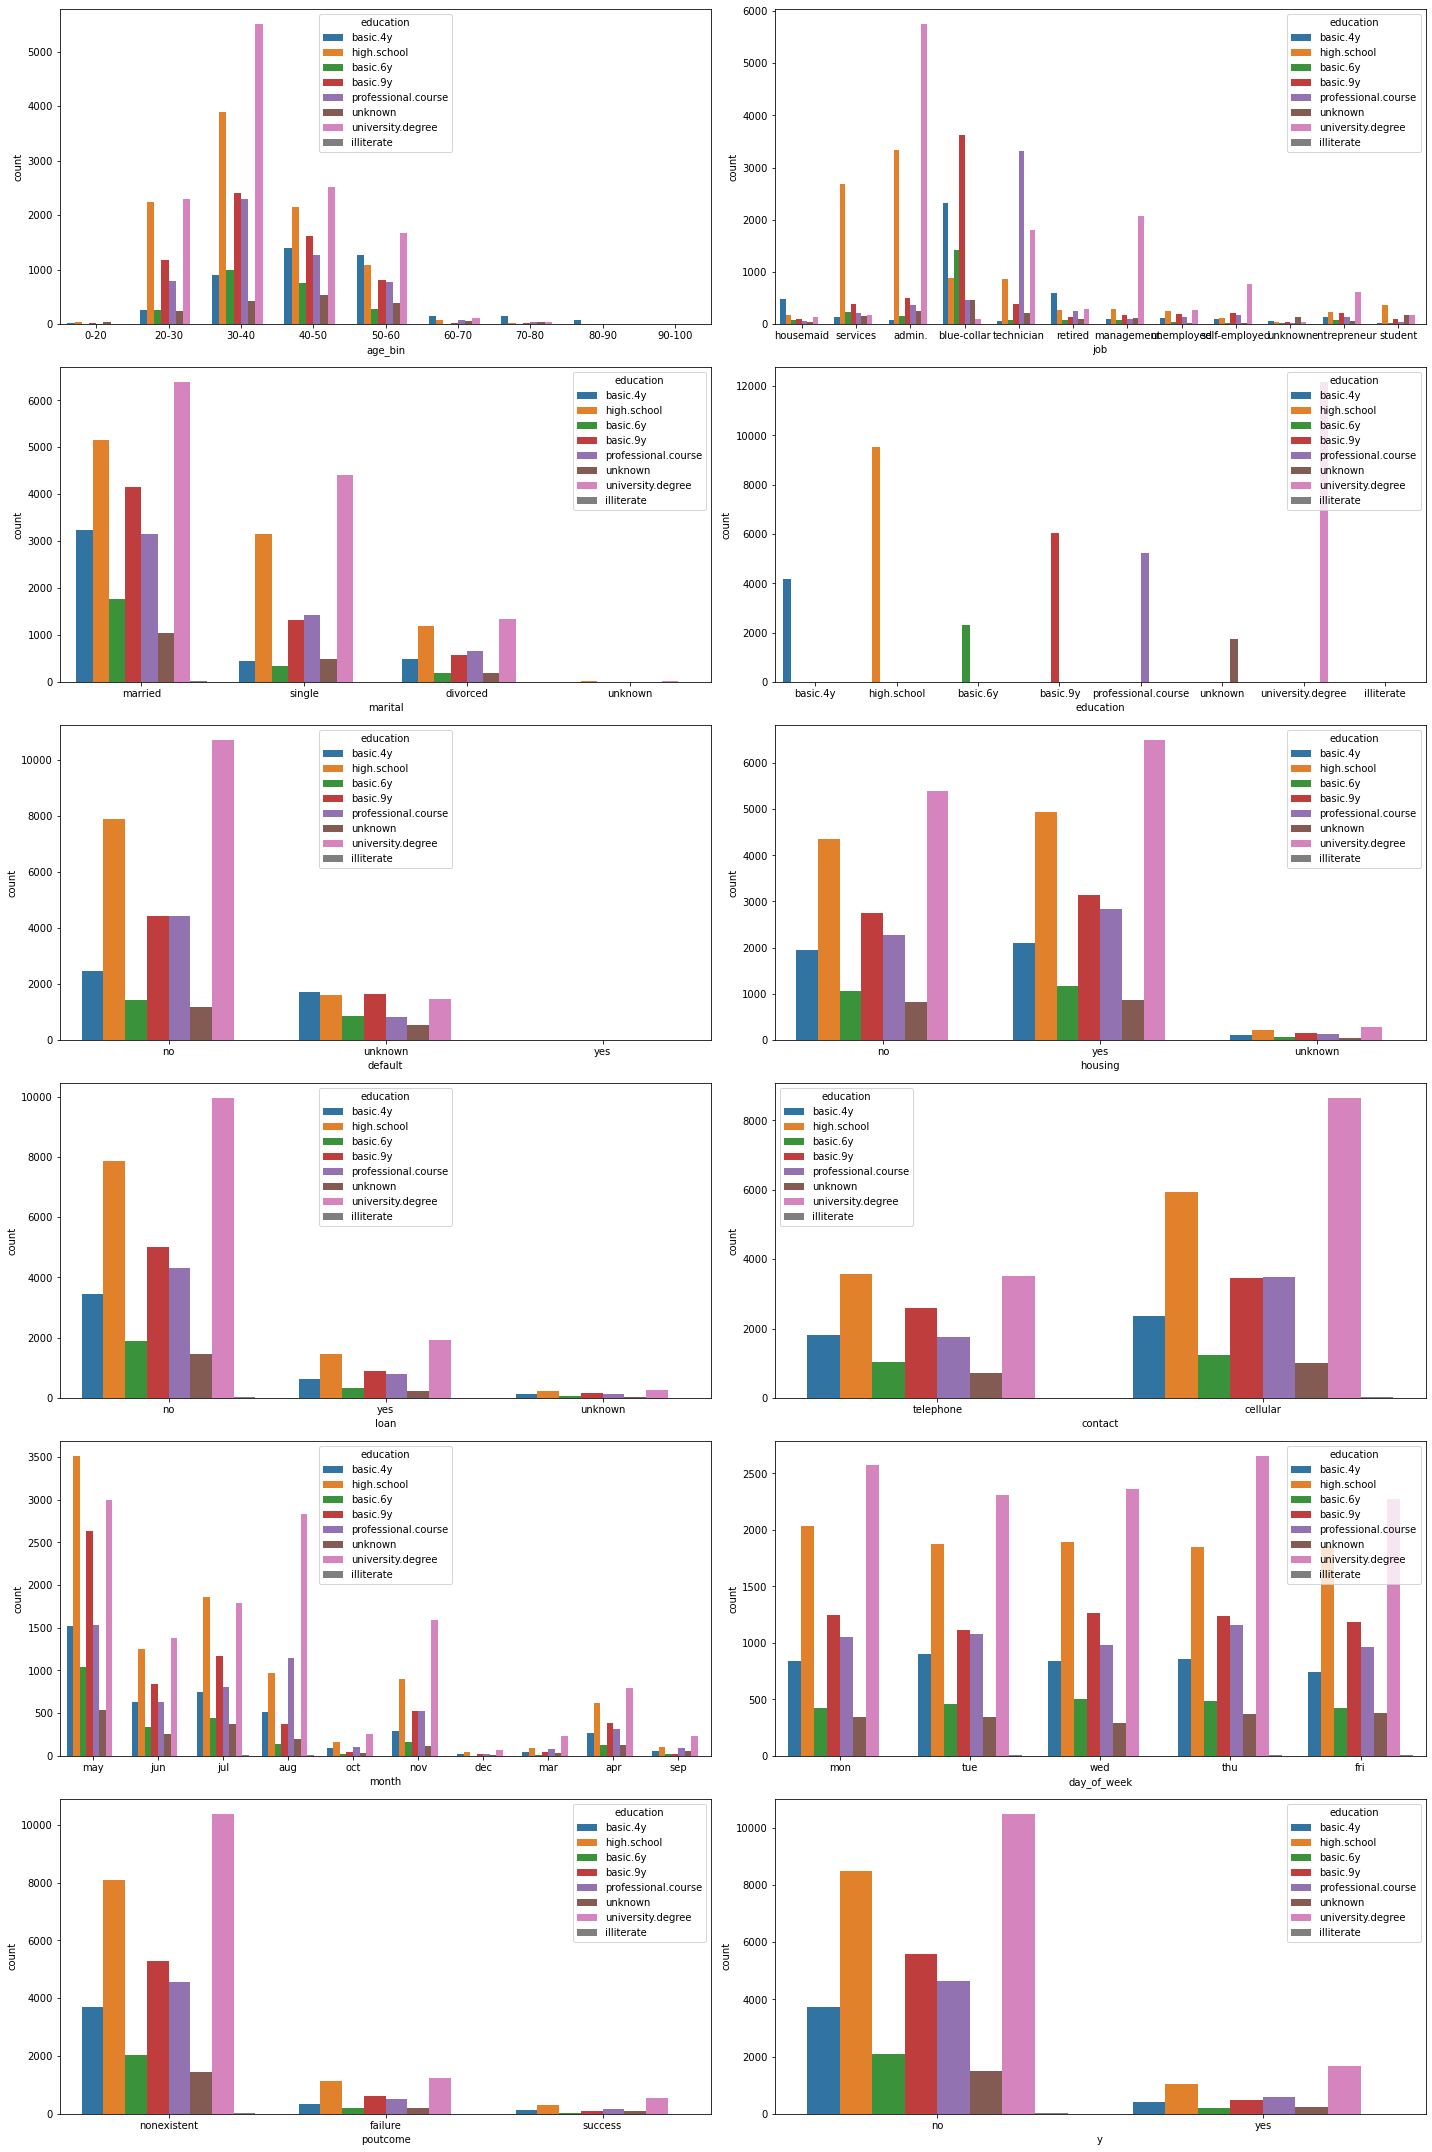

In [35]:
fig,ax = plt.subplots(6,2, figsize=(20,30)) 
i=0 
for a in range(6):
    for b in range(2):
        sns.countplot(x=df[cat[i]], hue=df['education'], ax = ax[a,b])
        i+=1
plt.tight_layout()
plt.show()

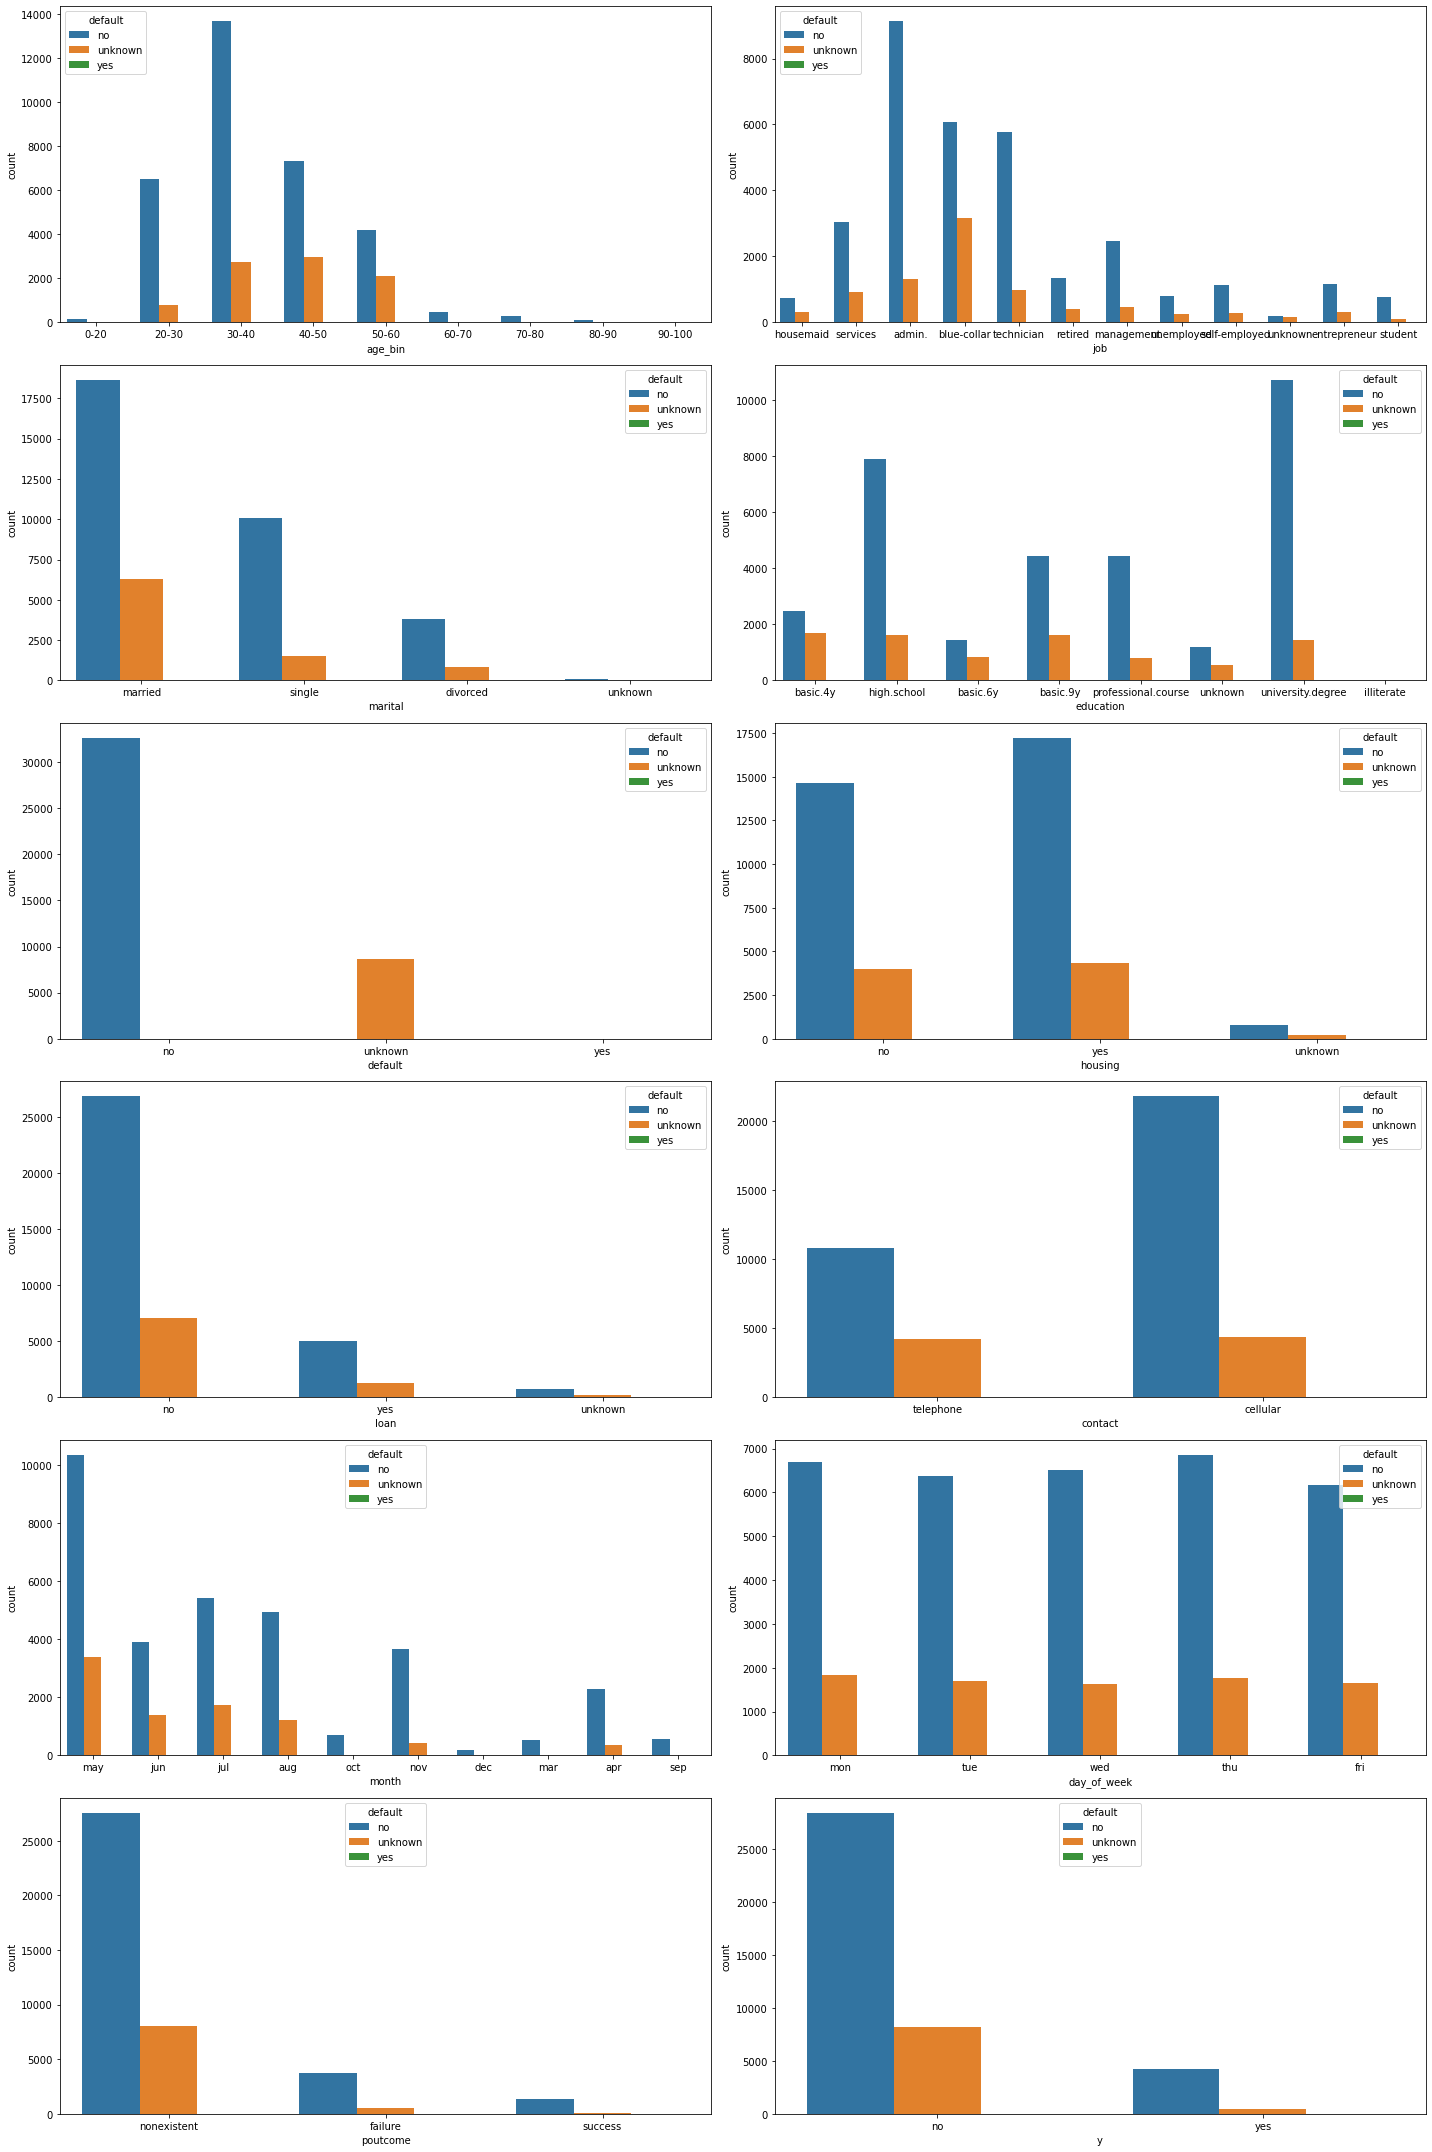

In [36]:
fig,ax = plt.subplots(6,2, figsize=(20,30)) 
i=0 
for a in range(6):
    for b in range(2):
        sns.countplot(x=df[cat[i]], hue=df['default'], ax = ax[a,b])
        i+=1
plt.tight_layout()
plt.show()

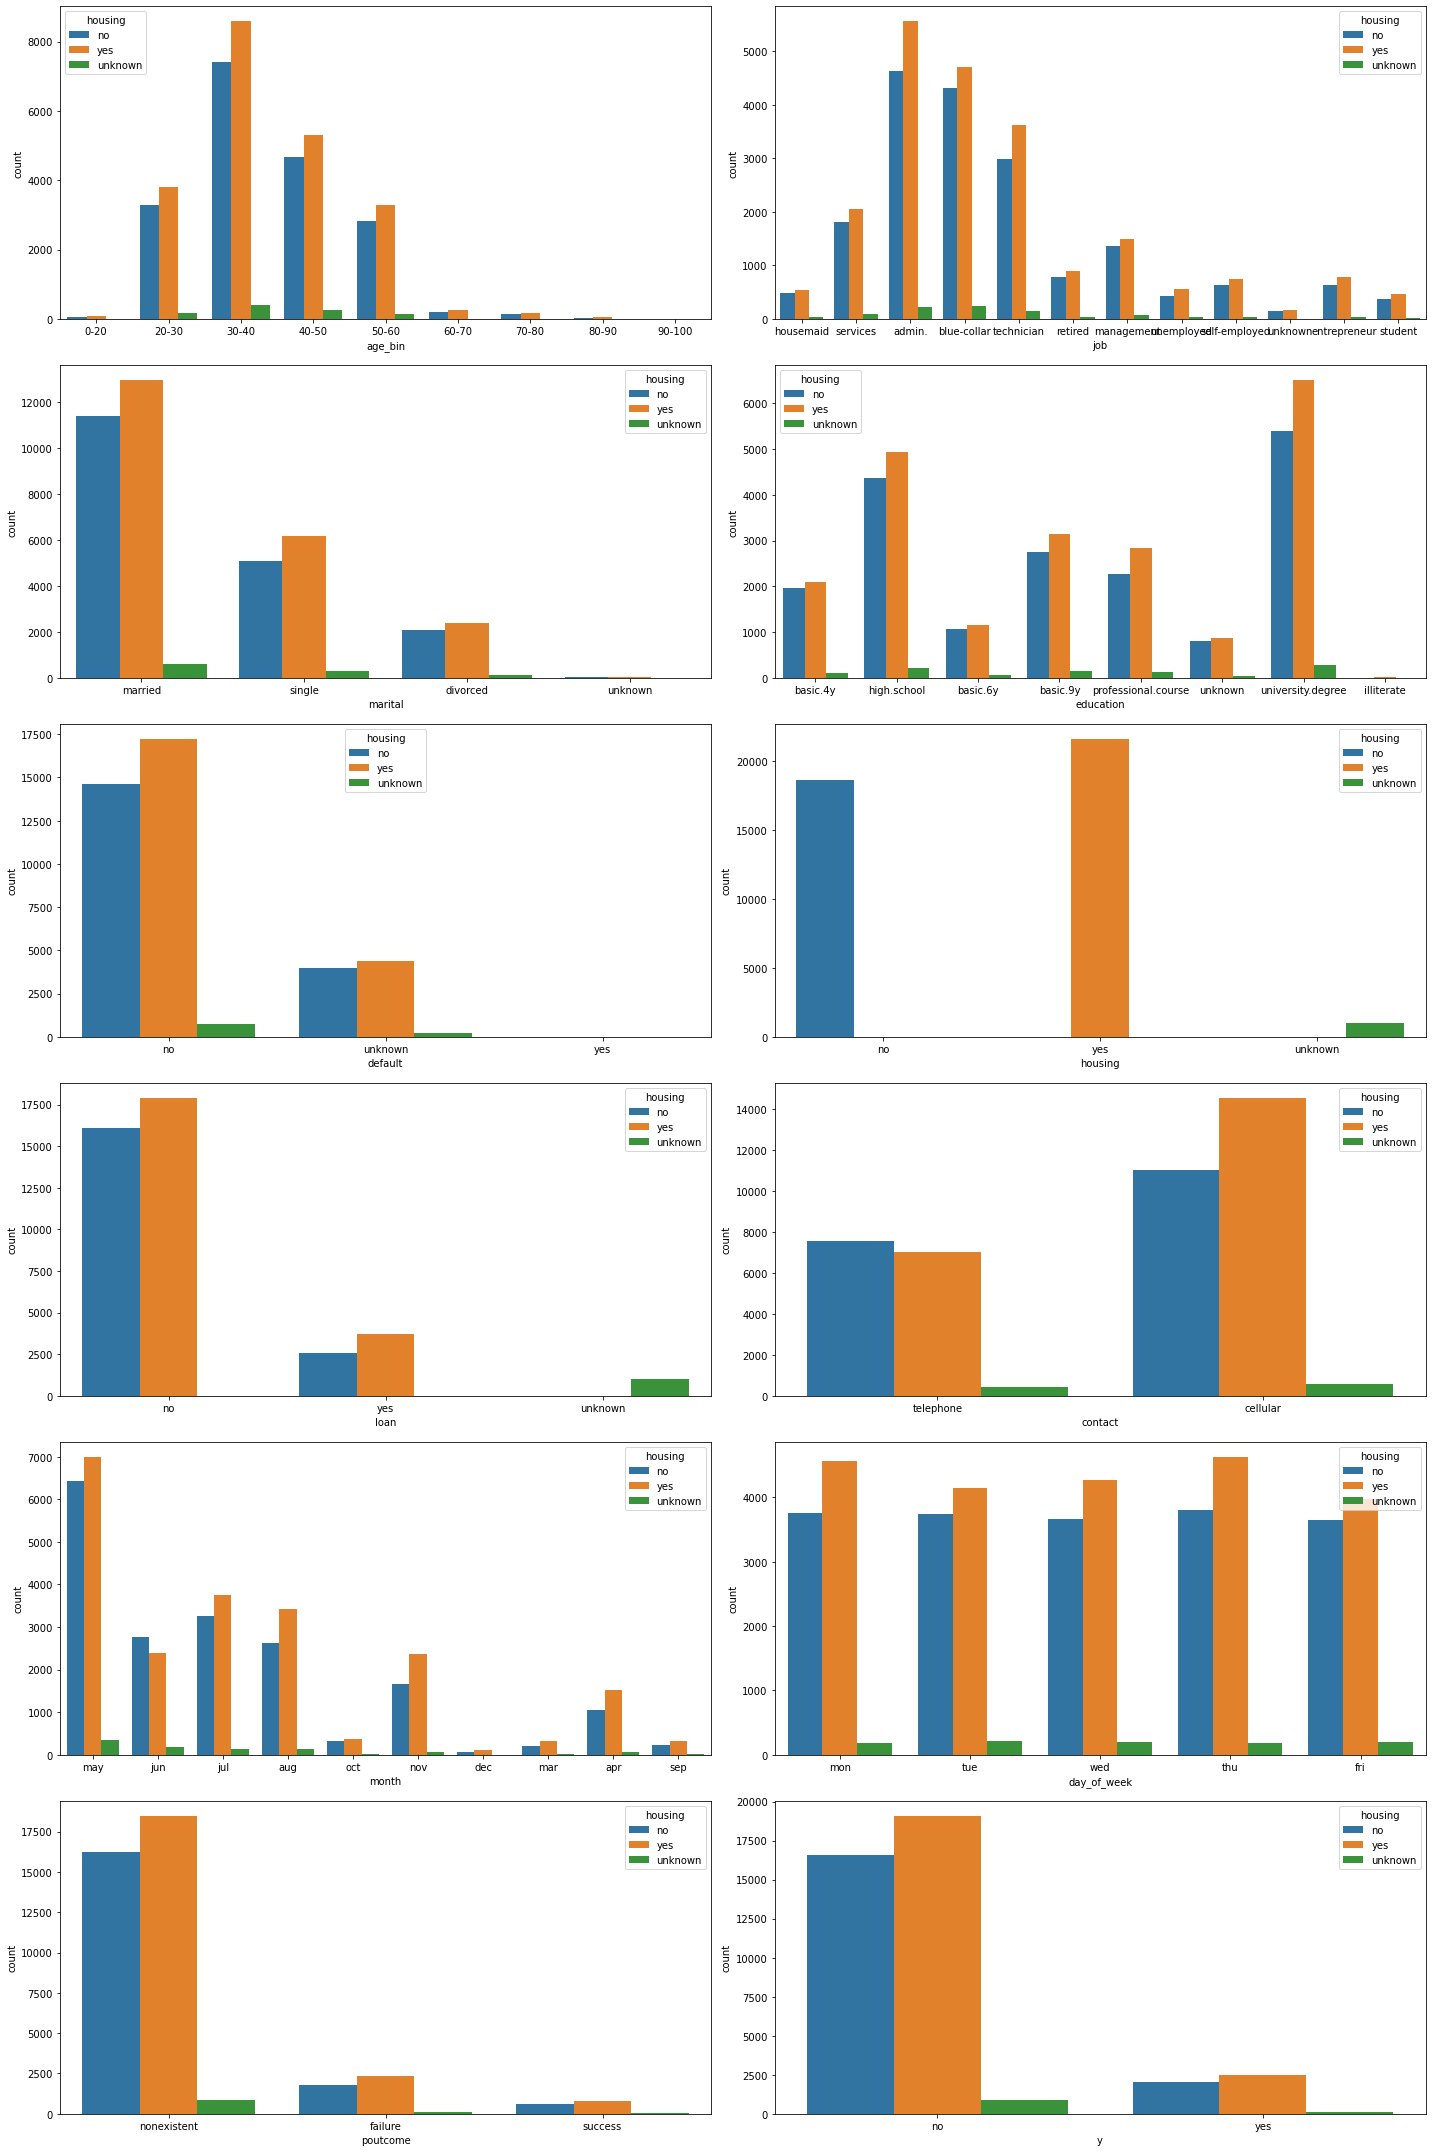

In [37]:
fig,ax = plt.subplots(6,2, figsize=(20,30)) 
i=0 
for a in range(6):
    for b in range(2):
        sns.countplot(x=df[cat[i]], hue=df['housing'], ax = ax[a,b])
        i+=1
plt.tight_layout()
plt.show()

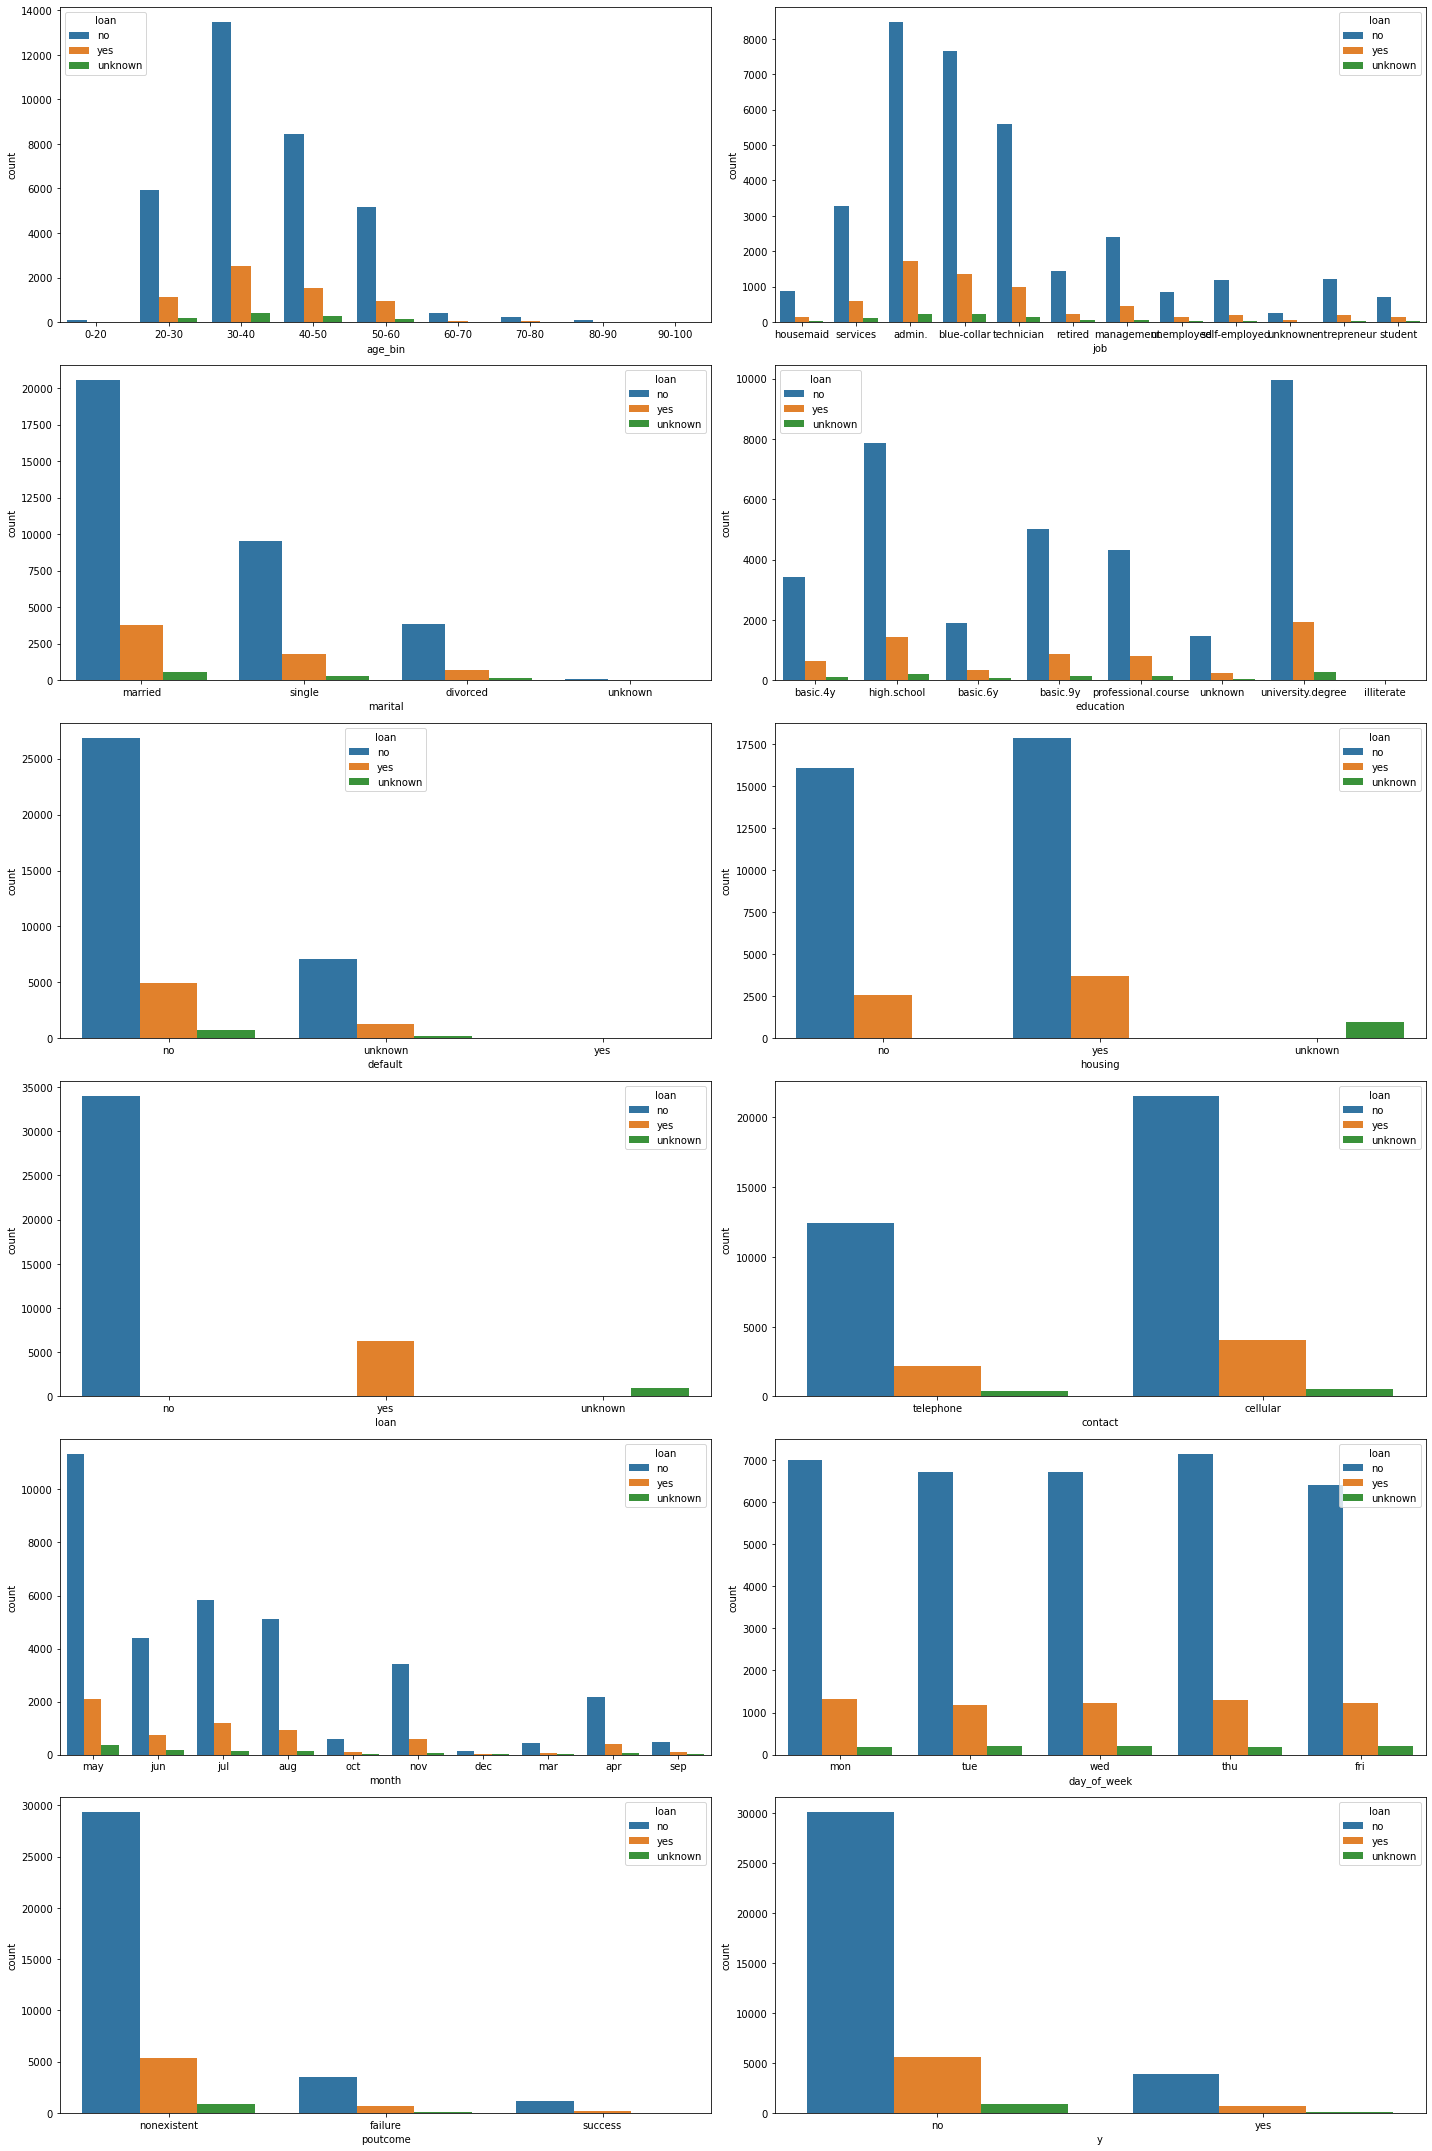

In [38]:
fig,ax = plt.subplots(6,2, figsize=(20,30)) 
i=0 
for a in range(6):
    for b in range(2):
        sns.countplot(x=df[cat[i]], hue=df['loan'], ax = ax[a,b])
        i+=1
plt.tight_layout()
plt.show()

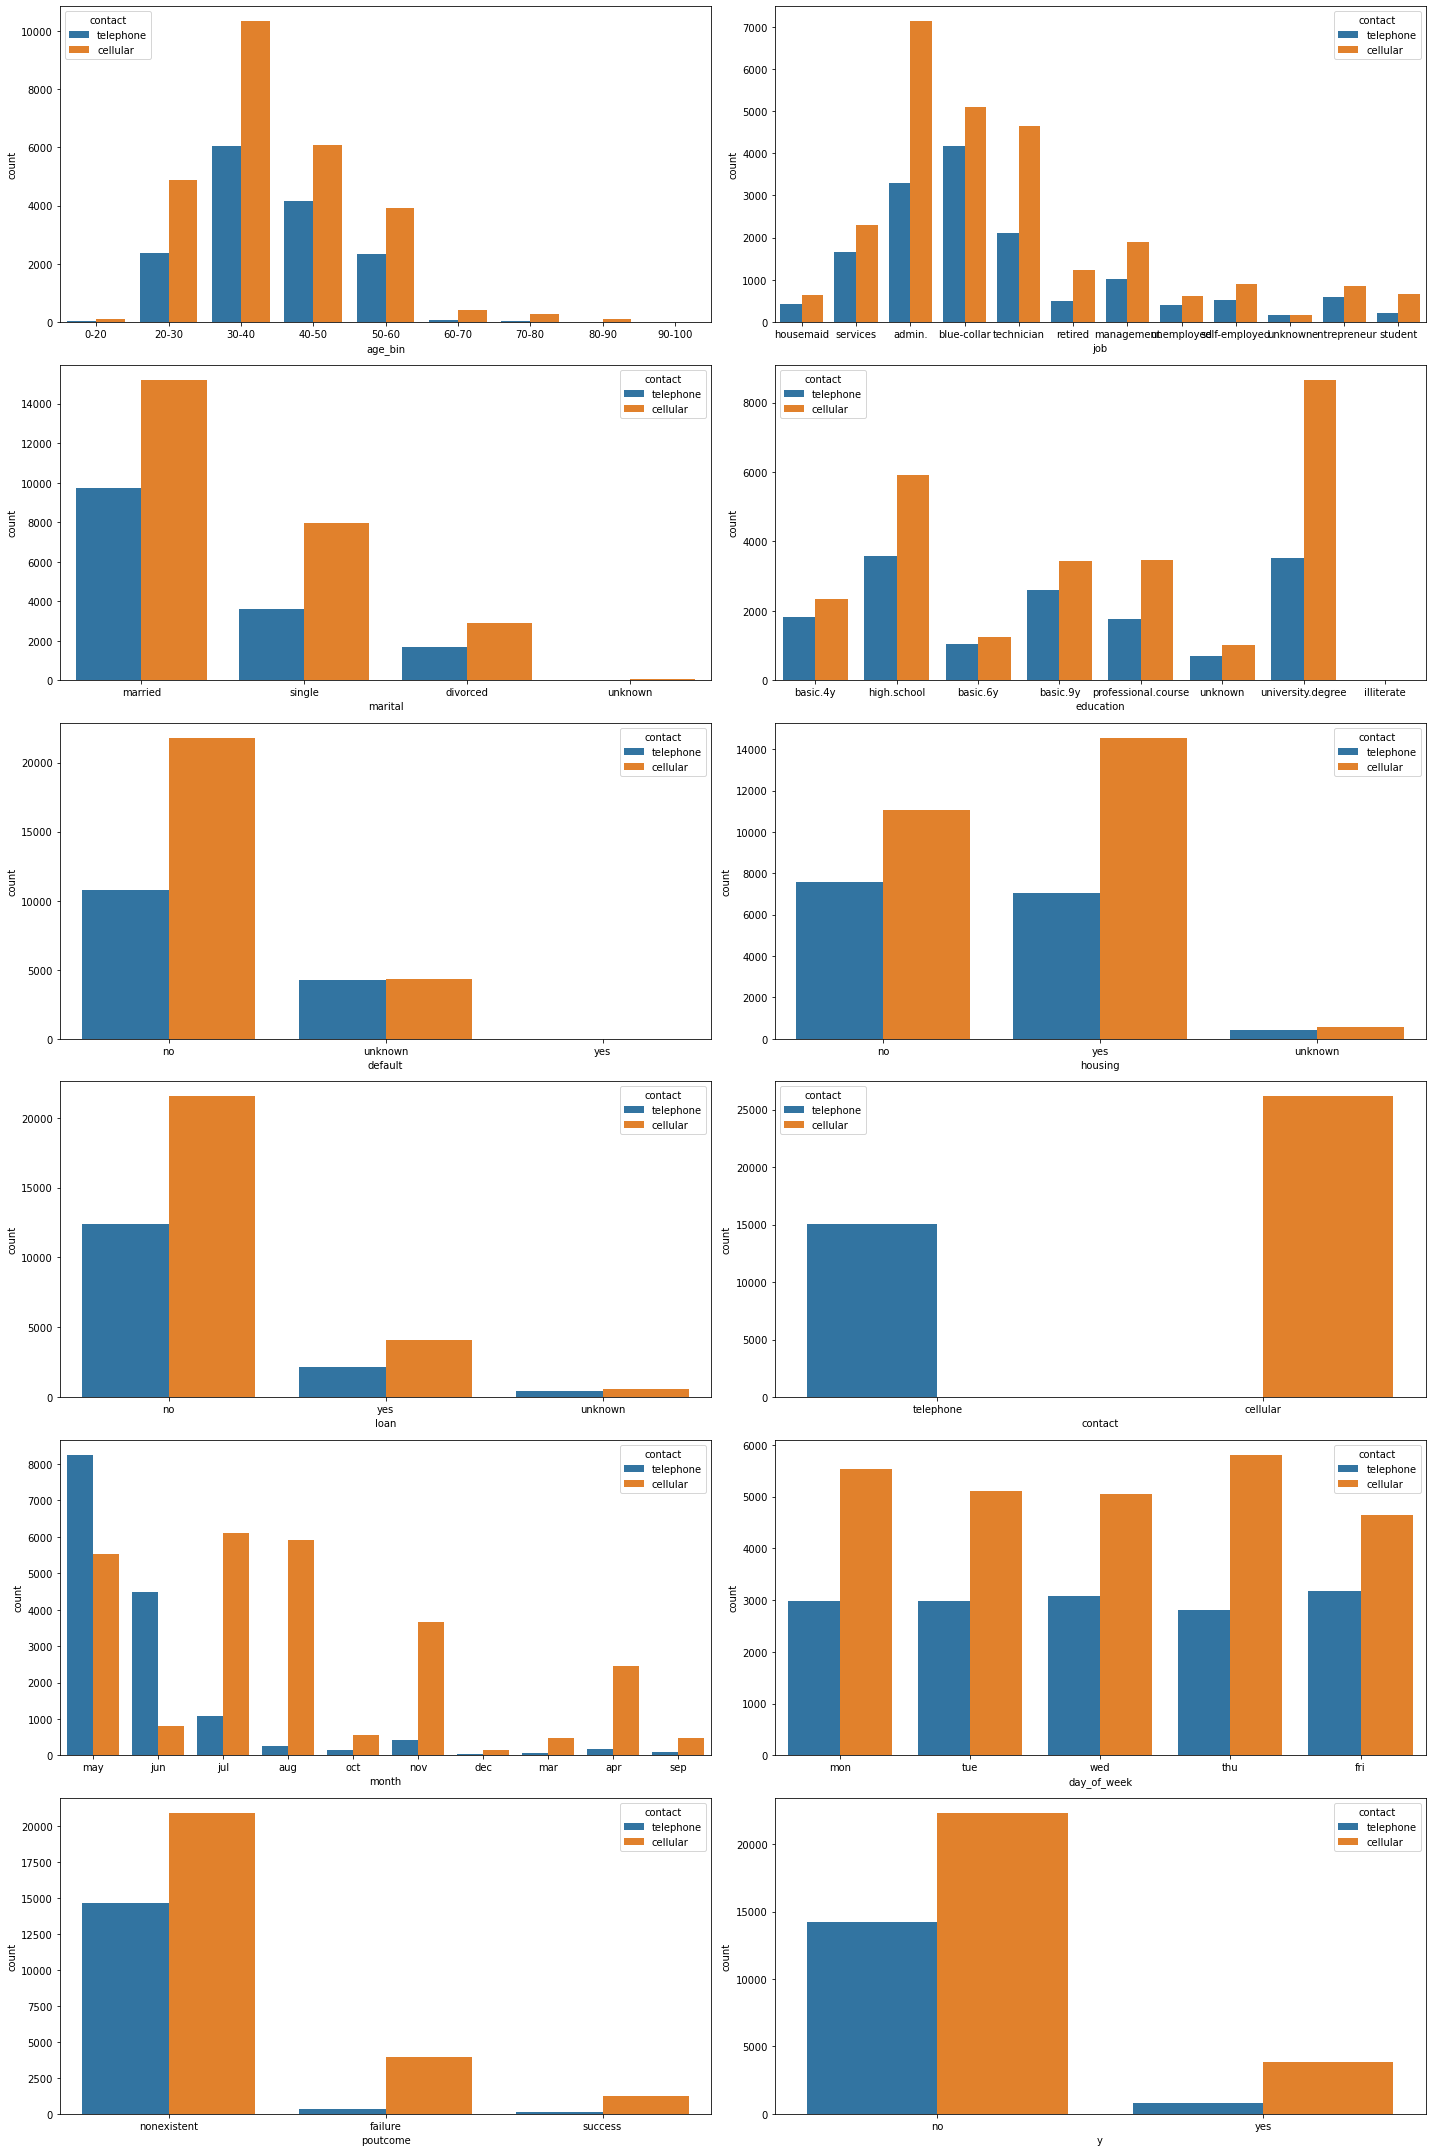

In [39]:
fig,ax = plt.subplots(6,2, figsize=(20,30)) 
i=0 
for a in range(6):
    for b in range(2):
        sns.countplot(x=df[cat[i]], hue=df['contact'], ax = ax[a,b])
        i+=1
plt.tight_layout()
plt.show()

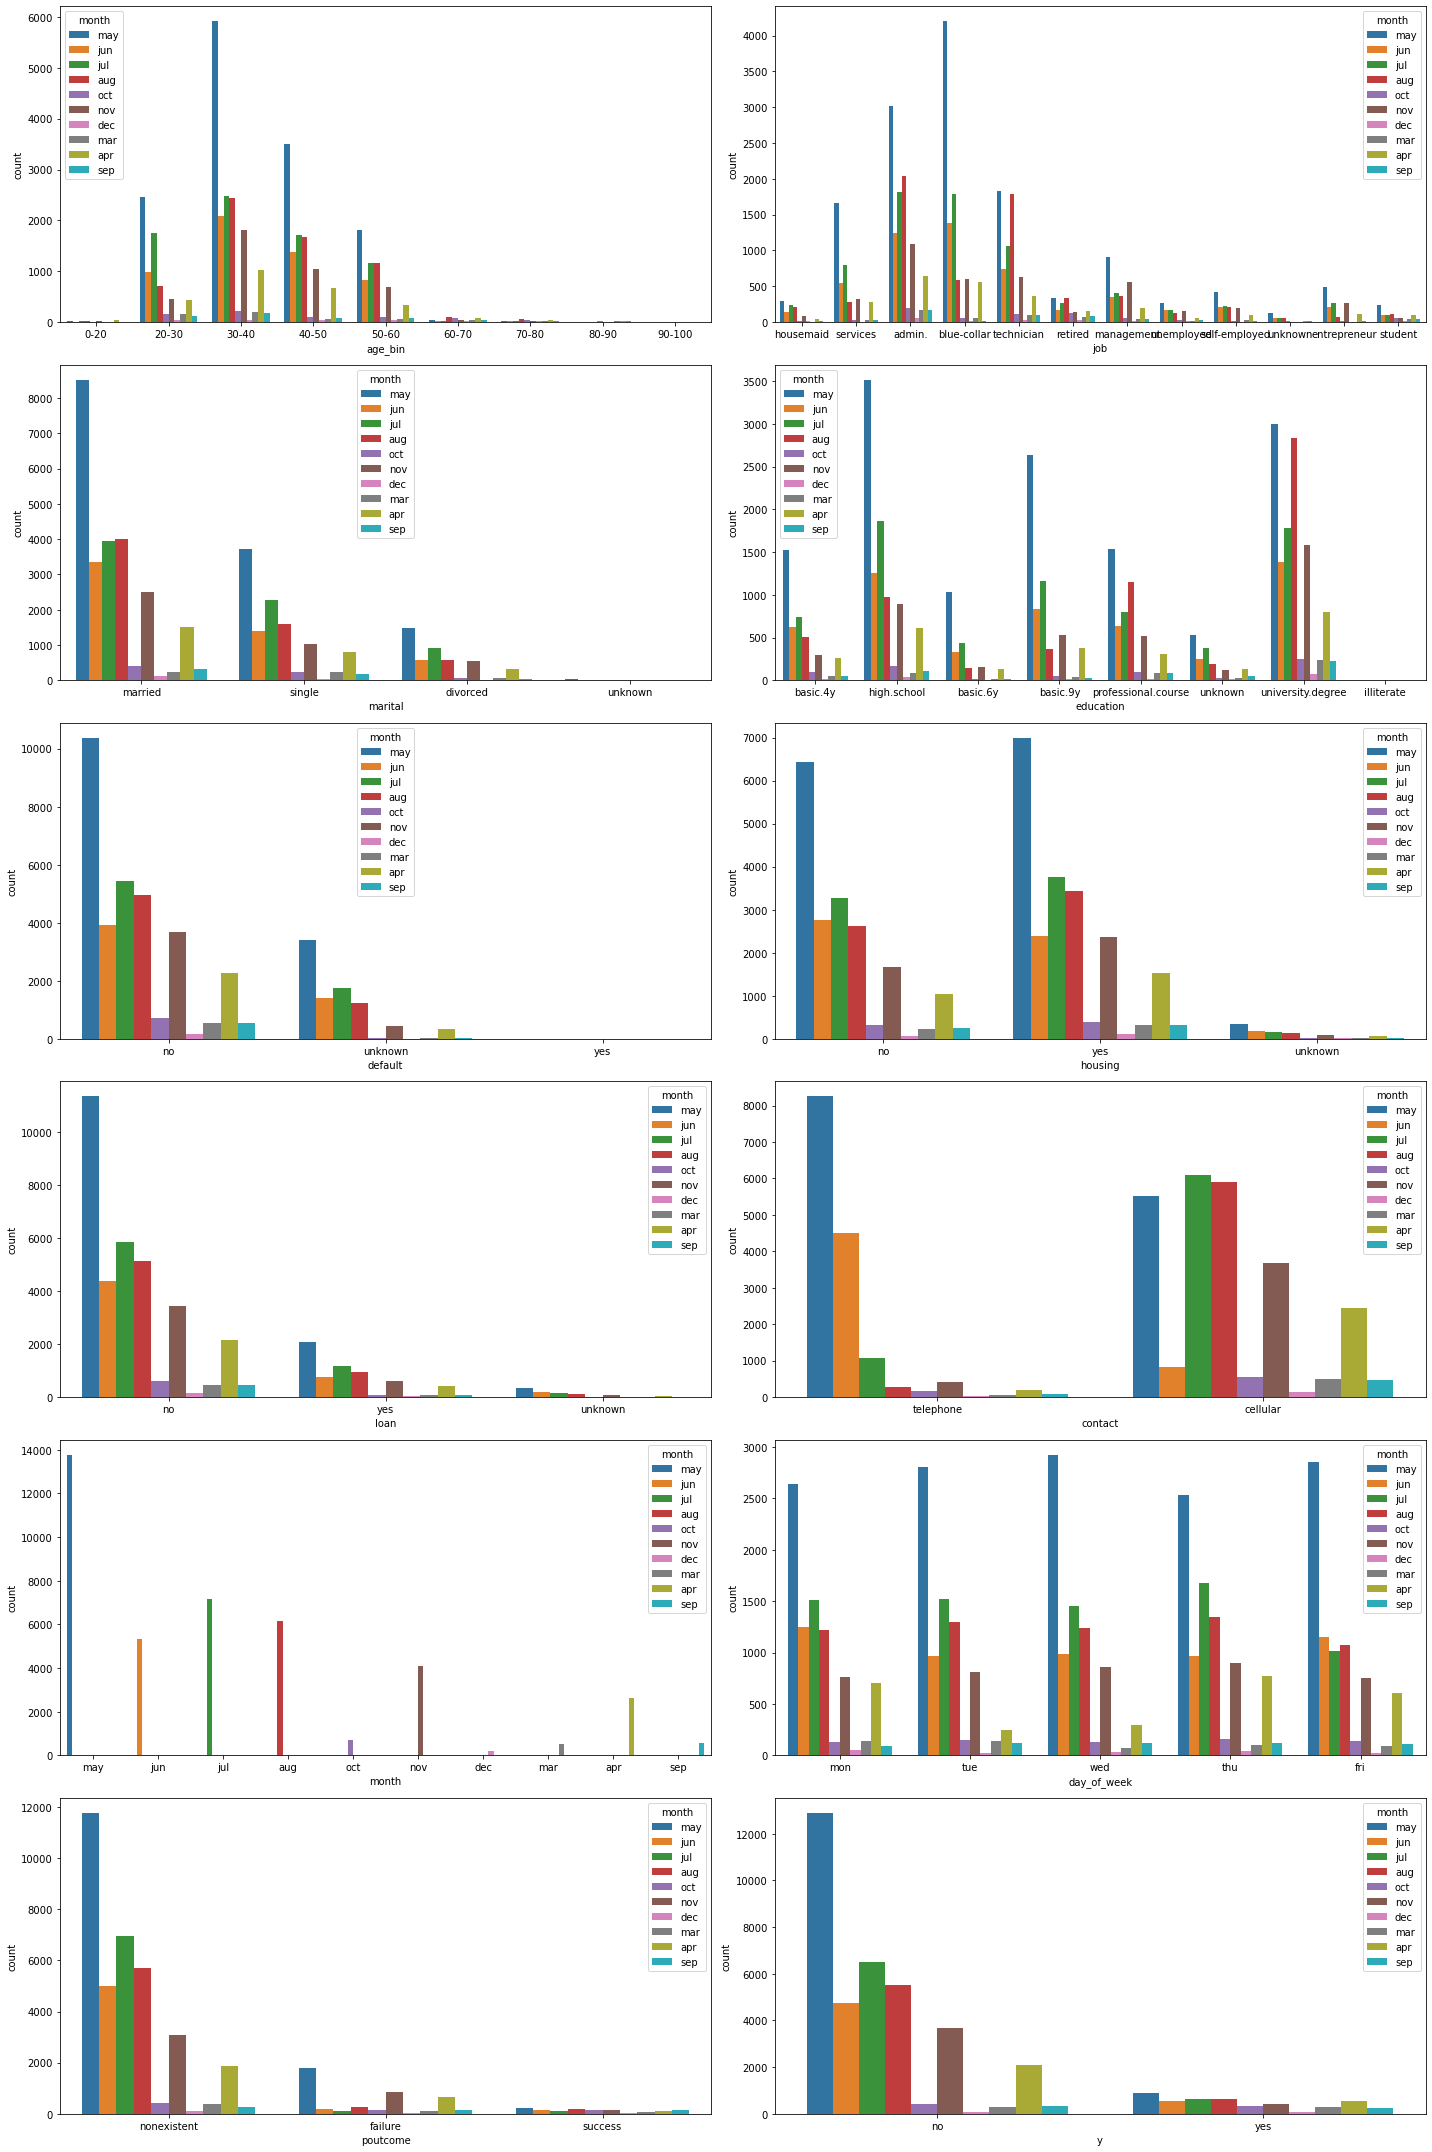

In [40]:
fig,ax = plt.subplots(6,2, figsize=(20,30)) 
i=0 
for a in range(6):
    for b in range(2):
        sns.countplot(x=df[cat[i]], hue=df['month'], ax = ax[a,b])
        i+=1
plt.tight_layout()
plt.show()

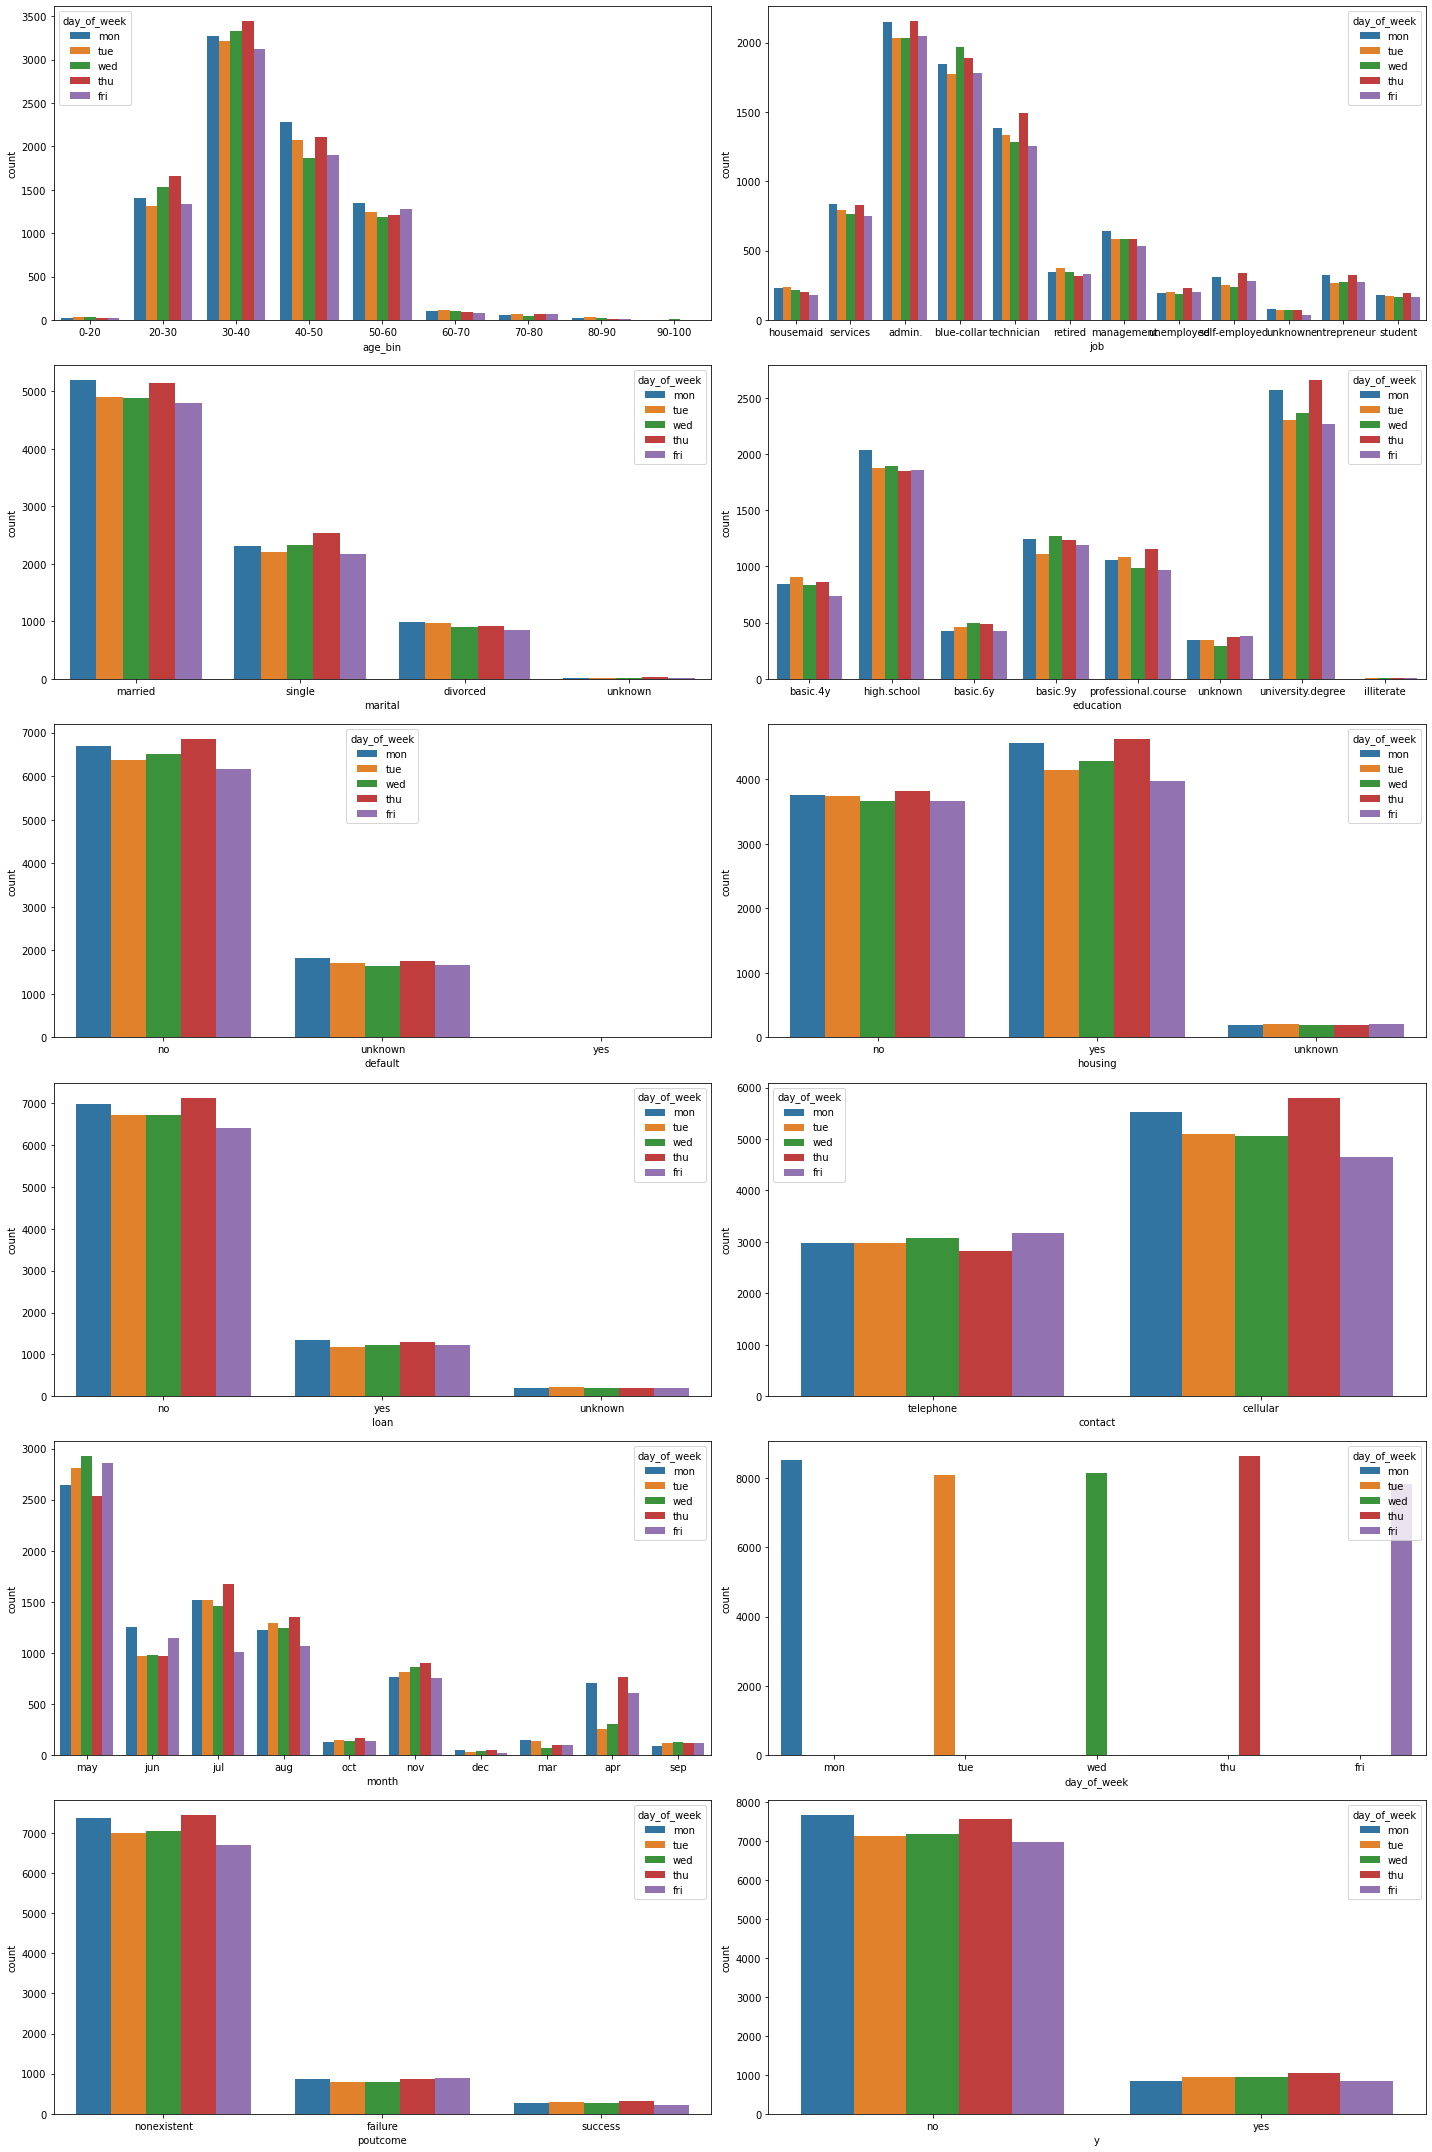

In [41]:
fig,ax = plt.subplots(6,2, figsize=(20,30)) 
i=0 
for a in range(6):
    for b in range(2):
        sns.countplot(x=df[cat[i]], hue=df['day_of_week'], ax = ax[a,b])
        i+=1
plt.tight_layout()
plt.show()

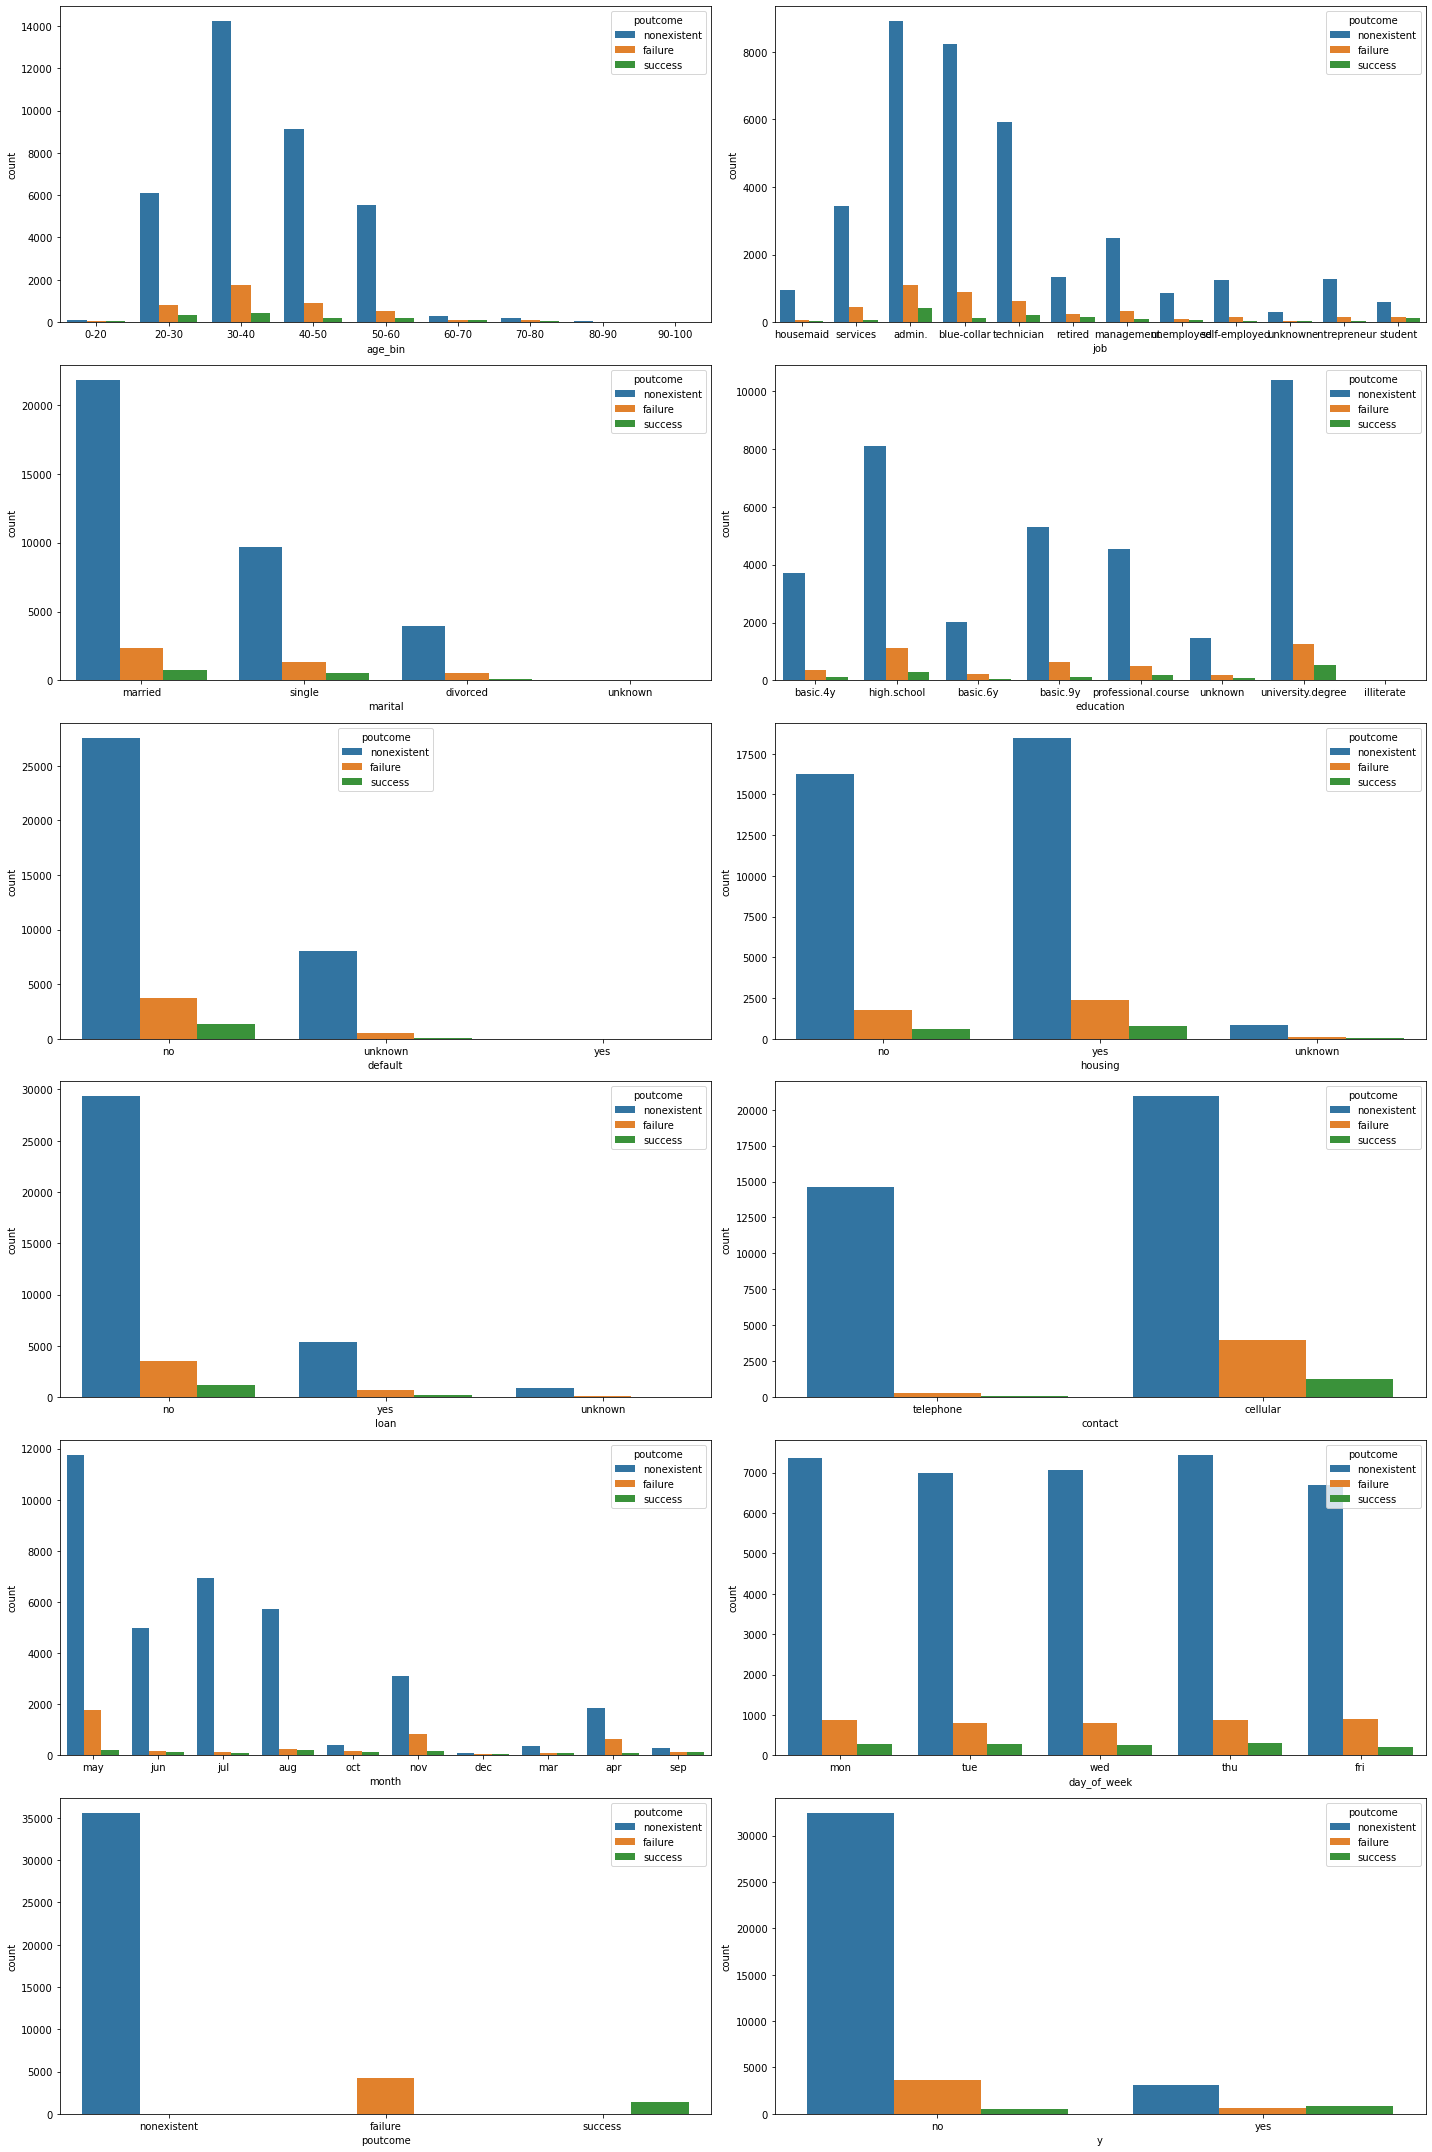

In [42]:
fig,ax = plt.subplots(6,2, figsize=(20,30)) 
i=0 
for a in range(6):
    for b in range(2):
        sns.countplot(x=df[cat[i]], hue=df['poutcome'], ax = ax[a,b])
        i+=1
plt.tight_layout()
plt.show()

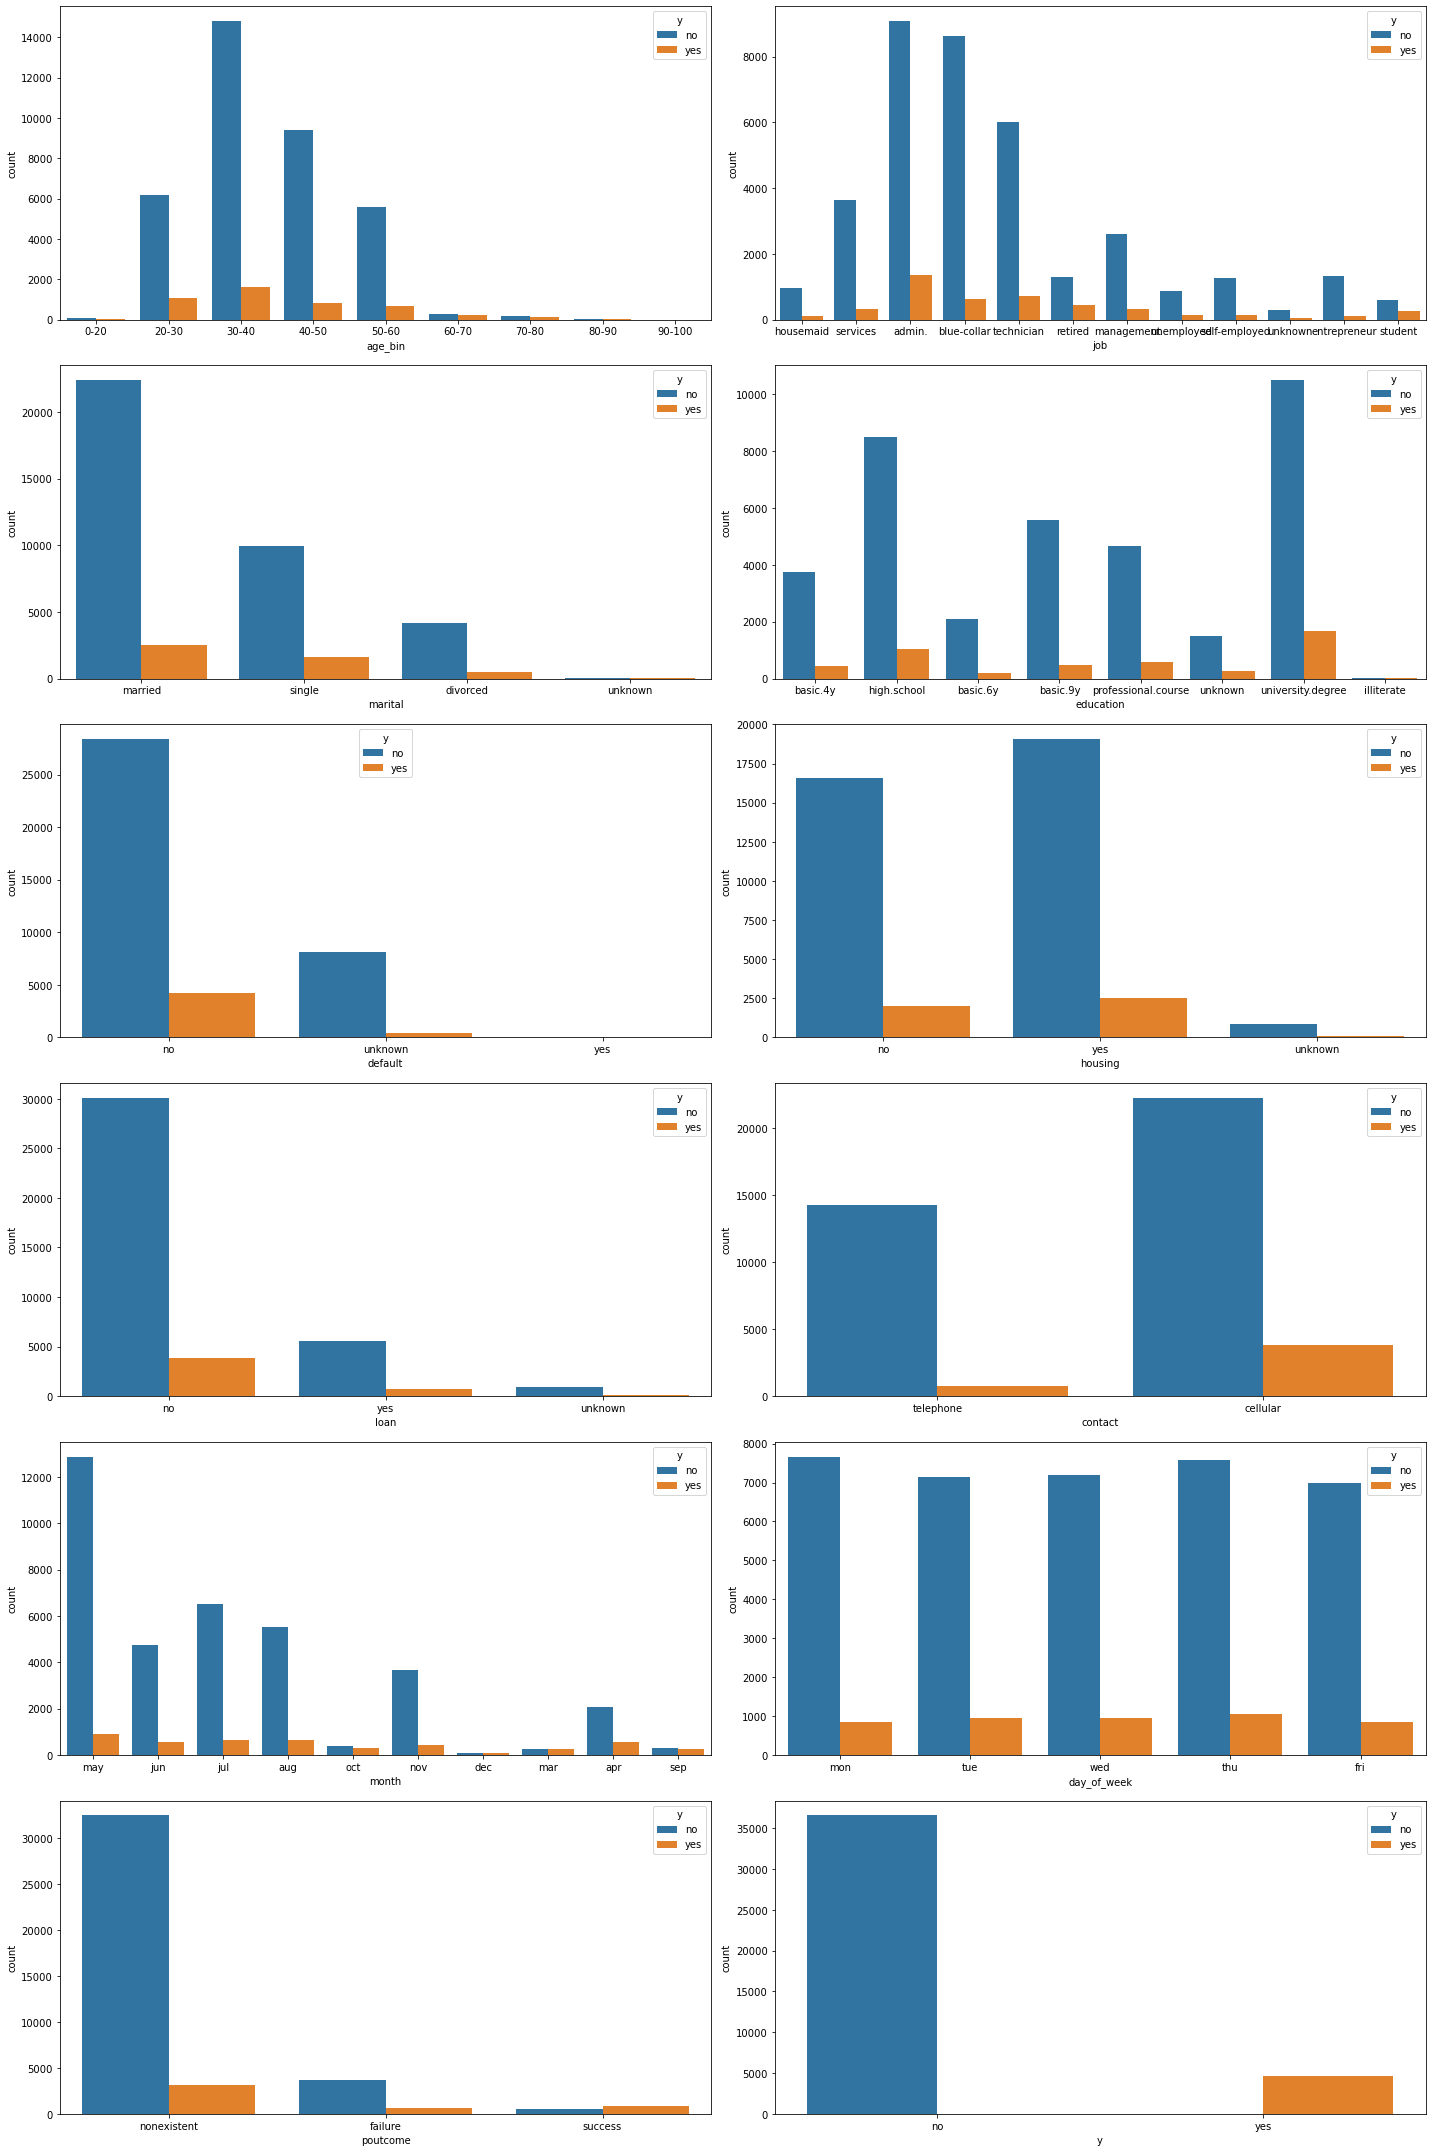

In [43]:

fig,ax = plt.subplots(6,2, figsize=(20,30)) 
i=0 
for a in range(6):
    for b in range(2):
        sns.countplot(x=df[cat[i]], hue=df['y'], ax = ax[a,b])
        i+=1
plt.tight_layout()
plt.show()

#### Multivariate analysis

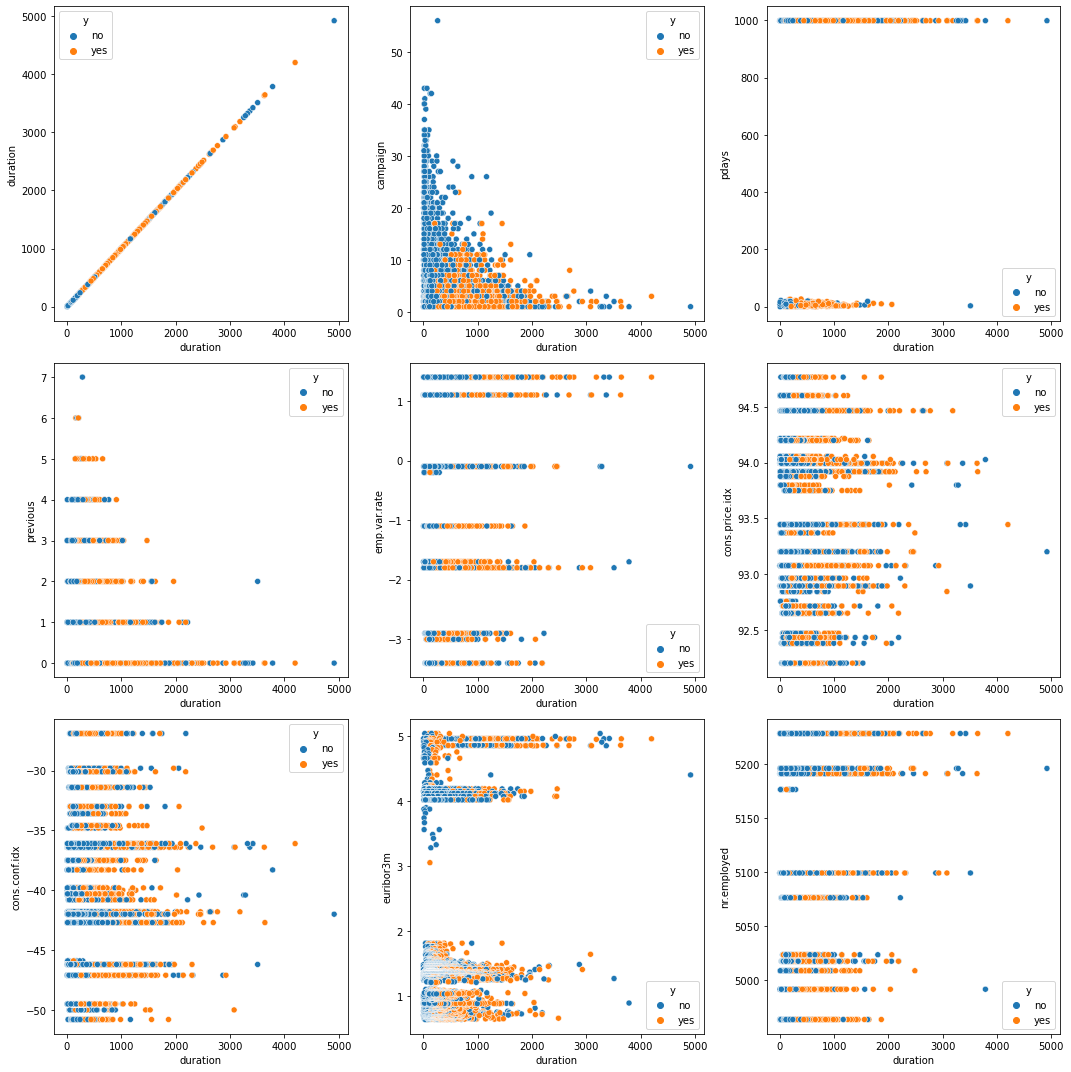

In [44]:
# Vislualize bivariate between numeric and numeric data
fig,ax = plt.subplots(3,3, figsize=(15,15)) 
i=0 
for a in range(3):
    for b in range(3):
        sns.scatterplot(y=df[num[i]], x=df['duration'],hue = df['y'], ax = ax[a,b])
        i+=1
plt.tight_layout()
plt.show()

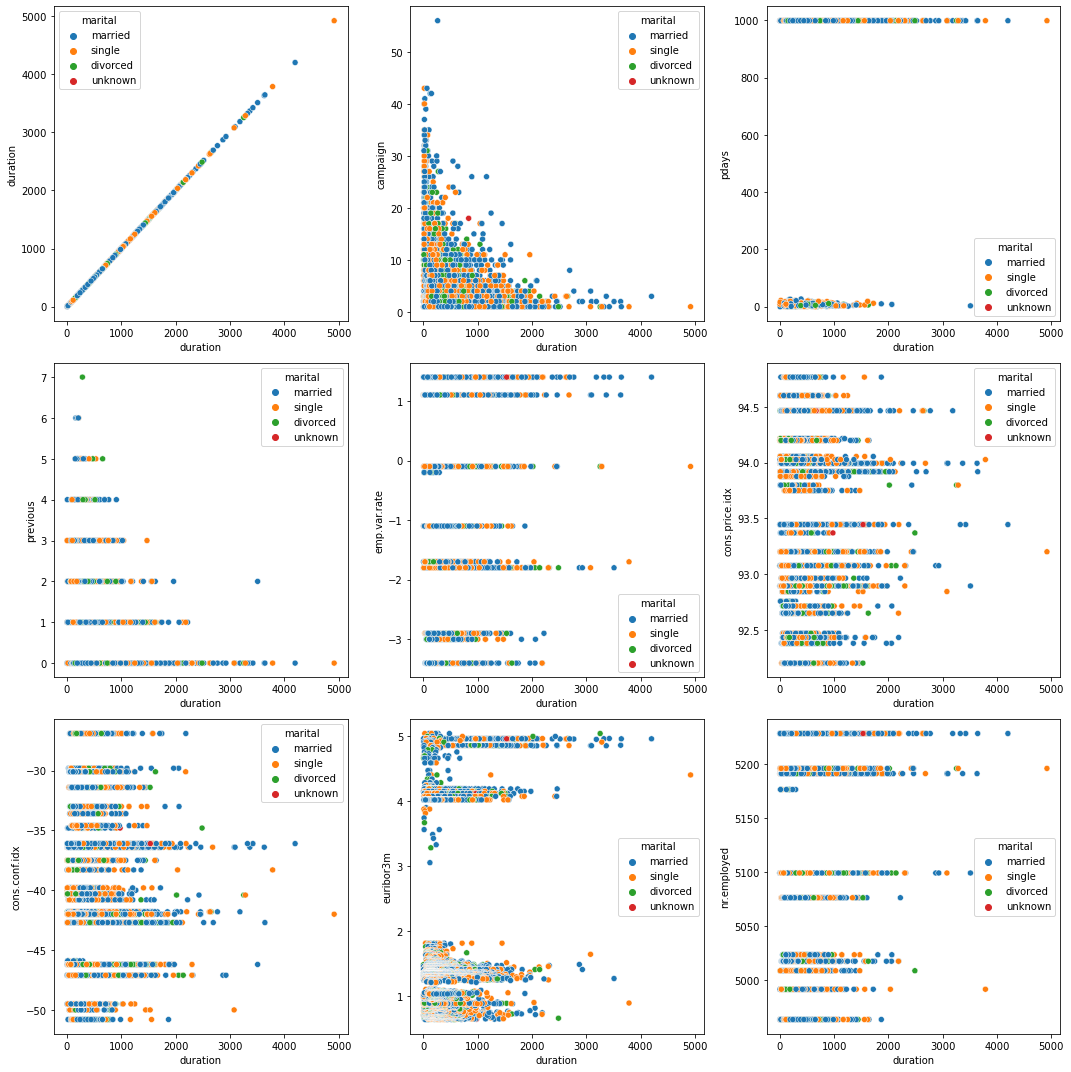

In [45]:
fig,ax = plt.subplots(3,3, figsize=(15,15)) 
i=0 
for a in range(3):
    for b in range(3):
        sns.scatterplot(y=df[num[i]], x=df['duration'],hue = df['marital'], ax = ax[a,b])
        i+=1
plt.tight_layout()
plt.show()

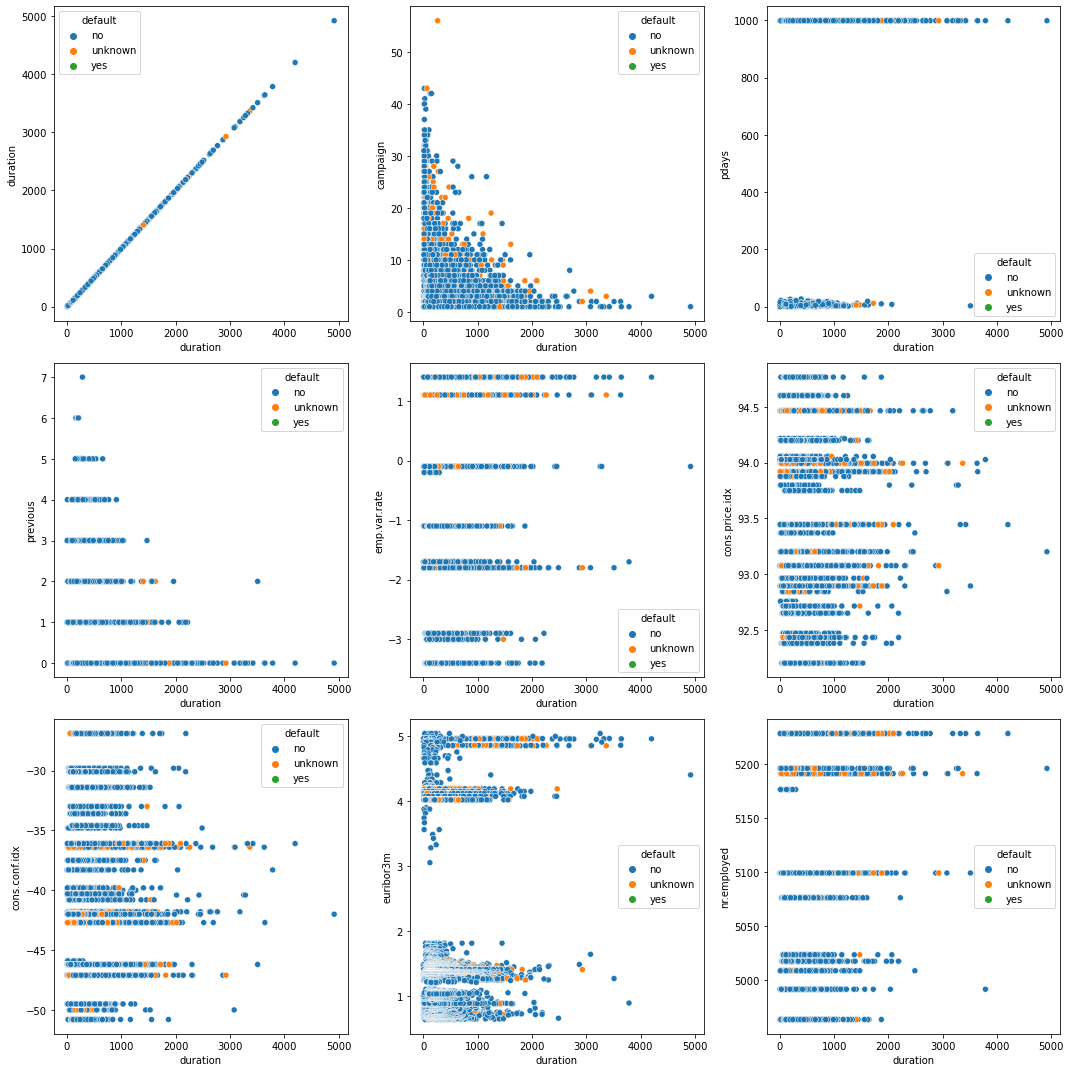

In [46]:
fig,ax = plt.subplots(3,3, figsize=(15,15)) 
i=0 
for a in range(3):
    for b in range(3):
        sns.scatterplot(y=df[num[i]], x=df['duration'],hue = df['default'], ax = ax[a,b])
        i+=1
plt.tight_layout()
plt.show()

#### Correlation

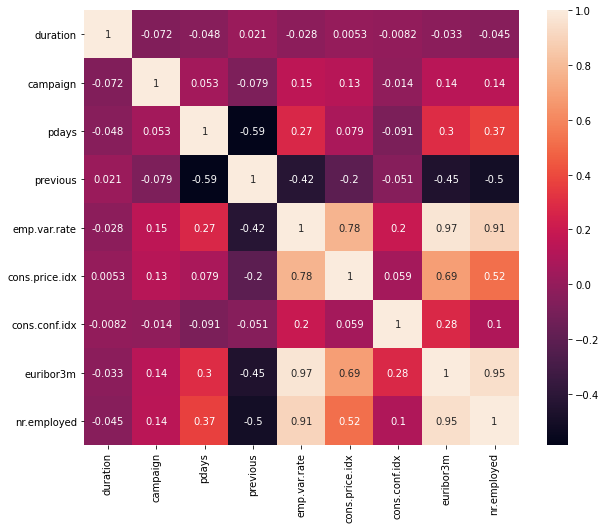

In [47]:
f, ax = plt.subplots(figsize=(10, 8))
ax = sns.heatmap(df.corr(), square=True, annot=True)

## Clustering

### Convert categorical variable into integers

In [48]:
df.describe(include='O')

job  marital          education default housing   loan   contact  \
count    41188    41188              41188   41188   41188  41188     41188   
unique      12        4                  8       3       3      3         2   
top     admin.  married  university.degree      no     yes     no  cellular   
freq     10422    24928              12168   32588   21576  33950     26144   

        month day_of_week     poutcome      y  
count   41188       41188        41188  41188  
unique     10           5            3      2  
top       may         thu  nonexistent     no  
freq    13769        8623        35563  36548

In [49]:
df.isnull().sum()

job               0
marital           0
education         0
default           0
housing           0
loan              0
contact           0
month             0
day_of_week       0
duration          0
campaign          0
pdays             0
previous          0
poutcome          0
emp.var.rate      0
cons.price.idx    0
cons.conf.idx     0
euribor3m         0
nr.employed       0
y                 0
age_bin           0
dtype: int64

In [50]:
data=df.copy()

In [51]:
X=data.drop(columns='y')

In [52]:
X.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 20 columns):
 #   Column          Non-Null Count  Dtype   
---  ------          --------------  -----   
 0   job             41188 non-null  object  
 1   marital         41188 non-null  object  
 2   education       41188 non-null  object  
 3   default         41188 non-null  object  
 4   housing         41188 non-null  object  
 5   loan            41188 non-null  object  
 6   contact         41188 non-null  object  
 7   month           41188 non-null  object  
 8   day_of_week     41188 non-null  object  
 9   duration        41188 non-null  int64   
 10  campaign        41188 non-null  int64   
 11  pdays           41188 non-null  int64   
 12  previous        41188 non-null  int64   
 13  poutcome        41188 non-null  object  
 14  emp.var.rate    41188 non-null  float64 
 15  cons.price.idx  41188 non-null  float64 
 16  cons.conf.idx   41188 non-null  float64 
 17  euribor3m   

In [53]:
lb_encode = LabelEncoder()
X.age_bin = lb_encode.fit_transform(df.age_bin)

In [54]:
X_encod = pd.get_dummies(X)

In [55]:
X_encod.shape

(41188, 63)

In [56]:
X_encod.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 41188 entries, 0 to 41187
Data columns (total 63 columns):
 #   Column                         Non-Null Count  Dtype  
---  ------                         --------------  -----  
 0   duration                       41188 non-null  int64  
 1   campaign                       41188 non-null  int64  
 2   pdays                          41188 non-null  int64  
 3   previous                       41188 non-null  int64  
 4   emp.var.rate                   41188 non-null  float64
 5   cons.price.idx                 41188 non-null  float64
 6   cons.conf.idx                  41188 non-null  float64
 7   euribor3m                      41188 non-null  float64
 8   nr.employed                    41188 non-null  float64
 9   age_bin                        41188 non-null  int64  
 10  job_admin.                     41188 non-null  uint8  
 11  job_blue-collar                41188 non-null  uint8  
 12  job_entrepreneur               41188 non-null 

## K-Means model with elbow method

In [57]:
wcss = []
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', random_state = 42)
    kmeans.fit(X_encod)
    # inertia method returns wcss for that model
    wcss.append(kmeans.inertia_)

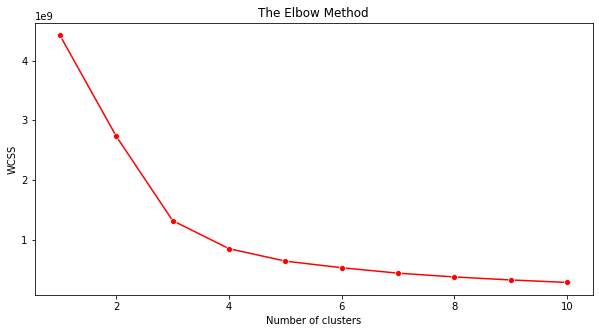

In [58]:
plt.figure(figsize=(10,5))
sns.lineplot(range(1, 11), wcss,marker='o',color='red')
plt.title('The Elbow Method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS')
plt.show()

## K-Means model parameters study

In [59]:
# Fitting K-Means to the dataset
# k=3
km3 = KMeans(n_clusters = 3, init = 'k-means++', random_state = 42).fit(X_encod)

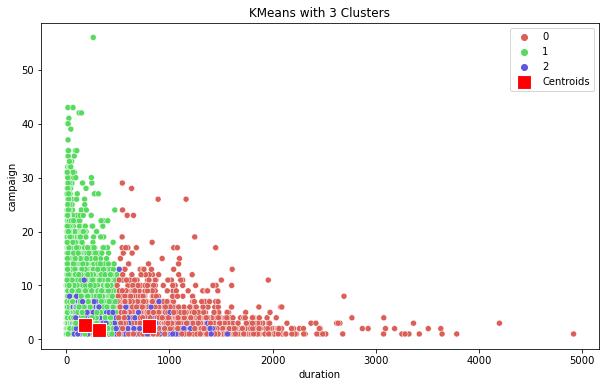

In [60]:
X_encod['labels'] = km3.labels_
plt.figure(figsize=(10, 6))
sns.scatterplot(y=X_encod['campaign'],x=X_encod['duration'],hue=X_encod['labels'], 
                palette=sns.color_palette('hls', 3))
sns.scatterplot(km3.cluster_centers_[:, 0], km3.cluster_centers_[:, 1], color = 'red', 
                label = 'Centroids',s = 200, marker=',')
plt.title('KMeans with 3 Clusters')
plt.show()

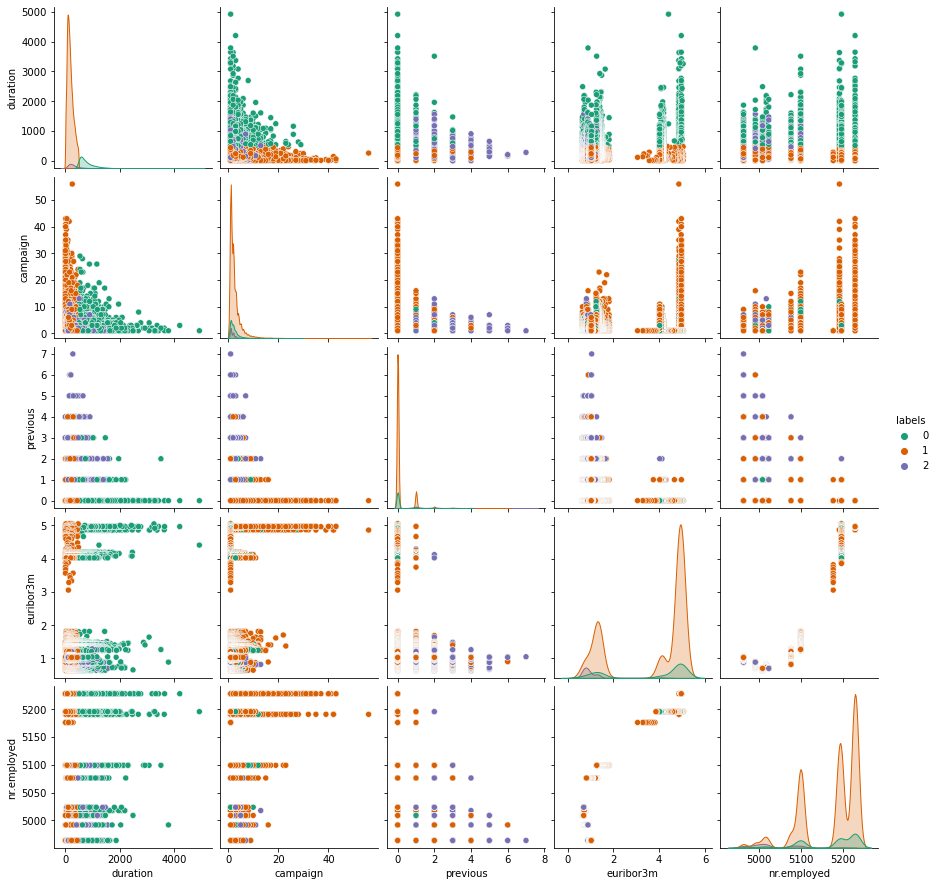

In [61]:
columns_re = ['duration', 'campaign', 'previous', 'euribor3m','nr.employed' ,'labels']
X_re = X_encod[columns_re]
sns.pairplot(X_re, hue='labels',palette='Dark2',diag_kind='kde')

## K-prototype

In [62]:
X.head()

job  marital    education  default housing loan    contact month  \
0  housemaid  married     basic.4y       no      no   no  telephone   may   
1   services  married  high.school  unknown      no   no  telephone   may   
2   services  married  high.school       no     yes   no  telephone   may   
3     admin.  married     basic.6y       no      no   no  telephone   may   
4   services  married  high.school       no      no  yes  telephone   may   

  day_of_week  duration  campaign  pdays  previous     poutcome  emp.var.rate  \
0         mon       261         1    999         0  nonexistent           1.1   
1         mon       149         1    999         0  nonexistent           1.1   
2         mon       226         1    999         0  nonexistent           1.1   
3         mon       151         1    999         0  nonexistent           1.1   
4         mon       307         1    999         0  nonexistent           1.1   

   cons.price.idx  cons.conf.idx  euribor3m  nr.employed  age_bin  
0          93.994          -36.4      4.857       5191.0        4  
1          93.994          -36.4      4.857       5191.0        4  
2          93.994          -36.4      4.857       5191.0        2  
3          93.994          -36.4      4.857       5191.0        2  
4          93.994          -36.4      4.857       5191.0        4

In [63]:
X_kpro = X.copy()

In [64]:
# Running K-Prototype clustering
kproto = KPrototypes(n_clusters=3, init='Huang', verbose=0, random_state=42,max_iter=20, n_init=50,n_jobs=-2,gamma=.25) 
y_kprototypes = kproto.fit_predict(X_kpro, categorical=[0,1,2,3,4,5,6,7,8,13])

In [65]:
X_kpro['labels_id']=y_kprototypes

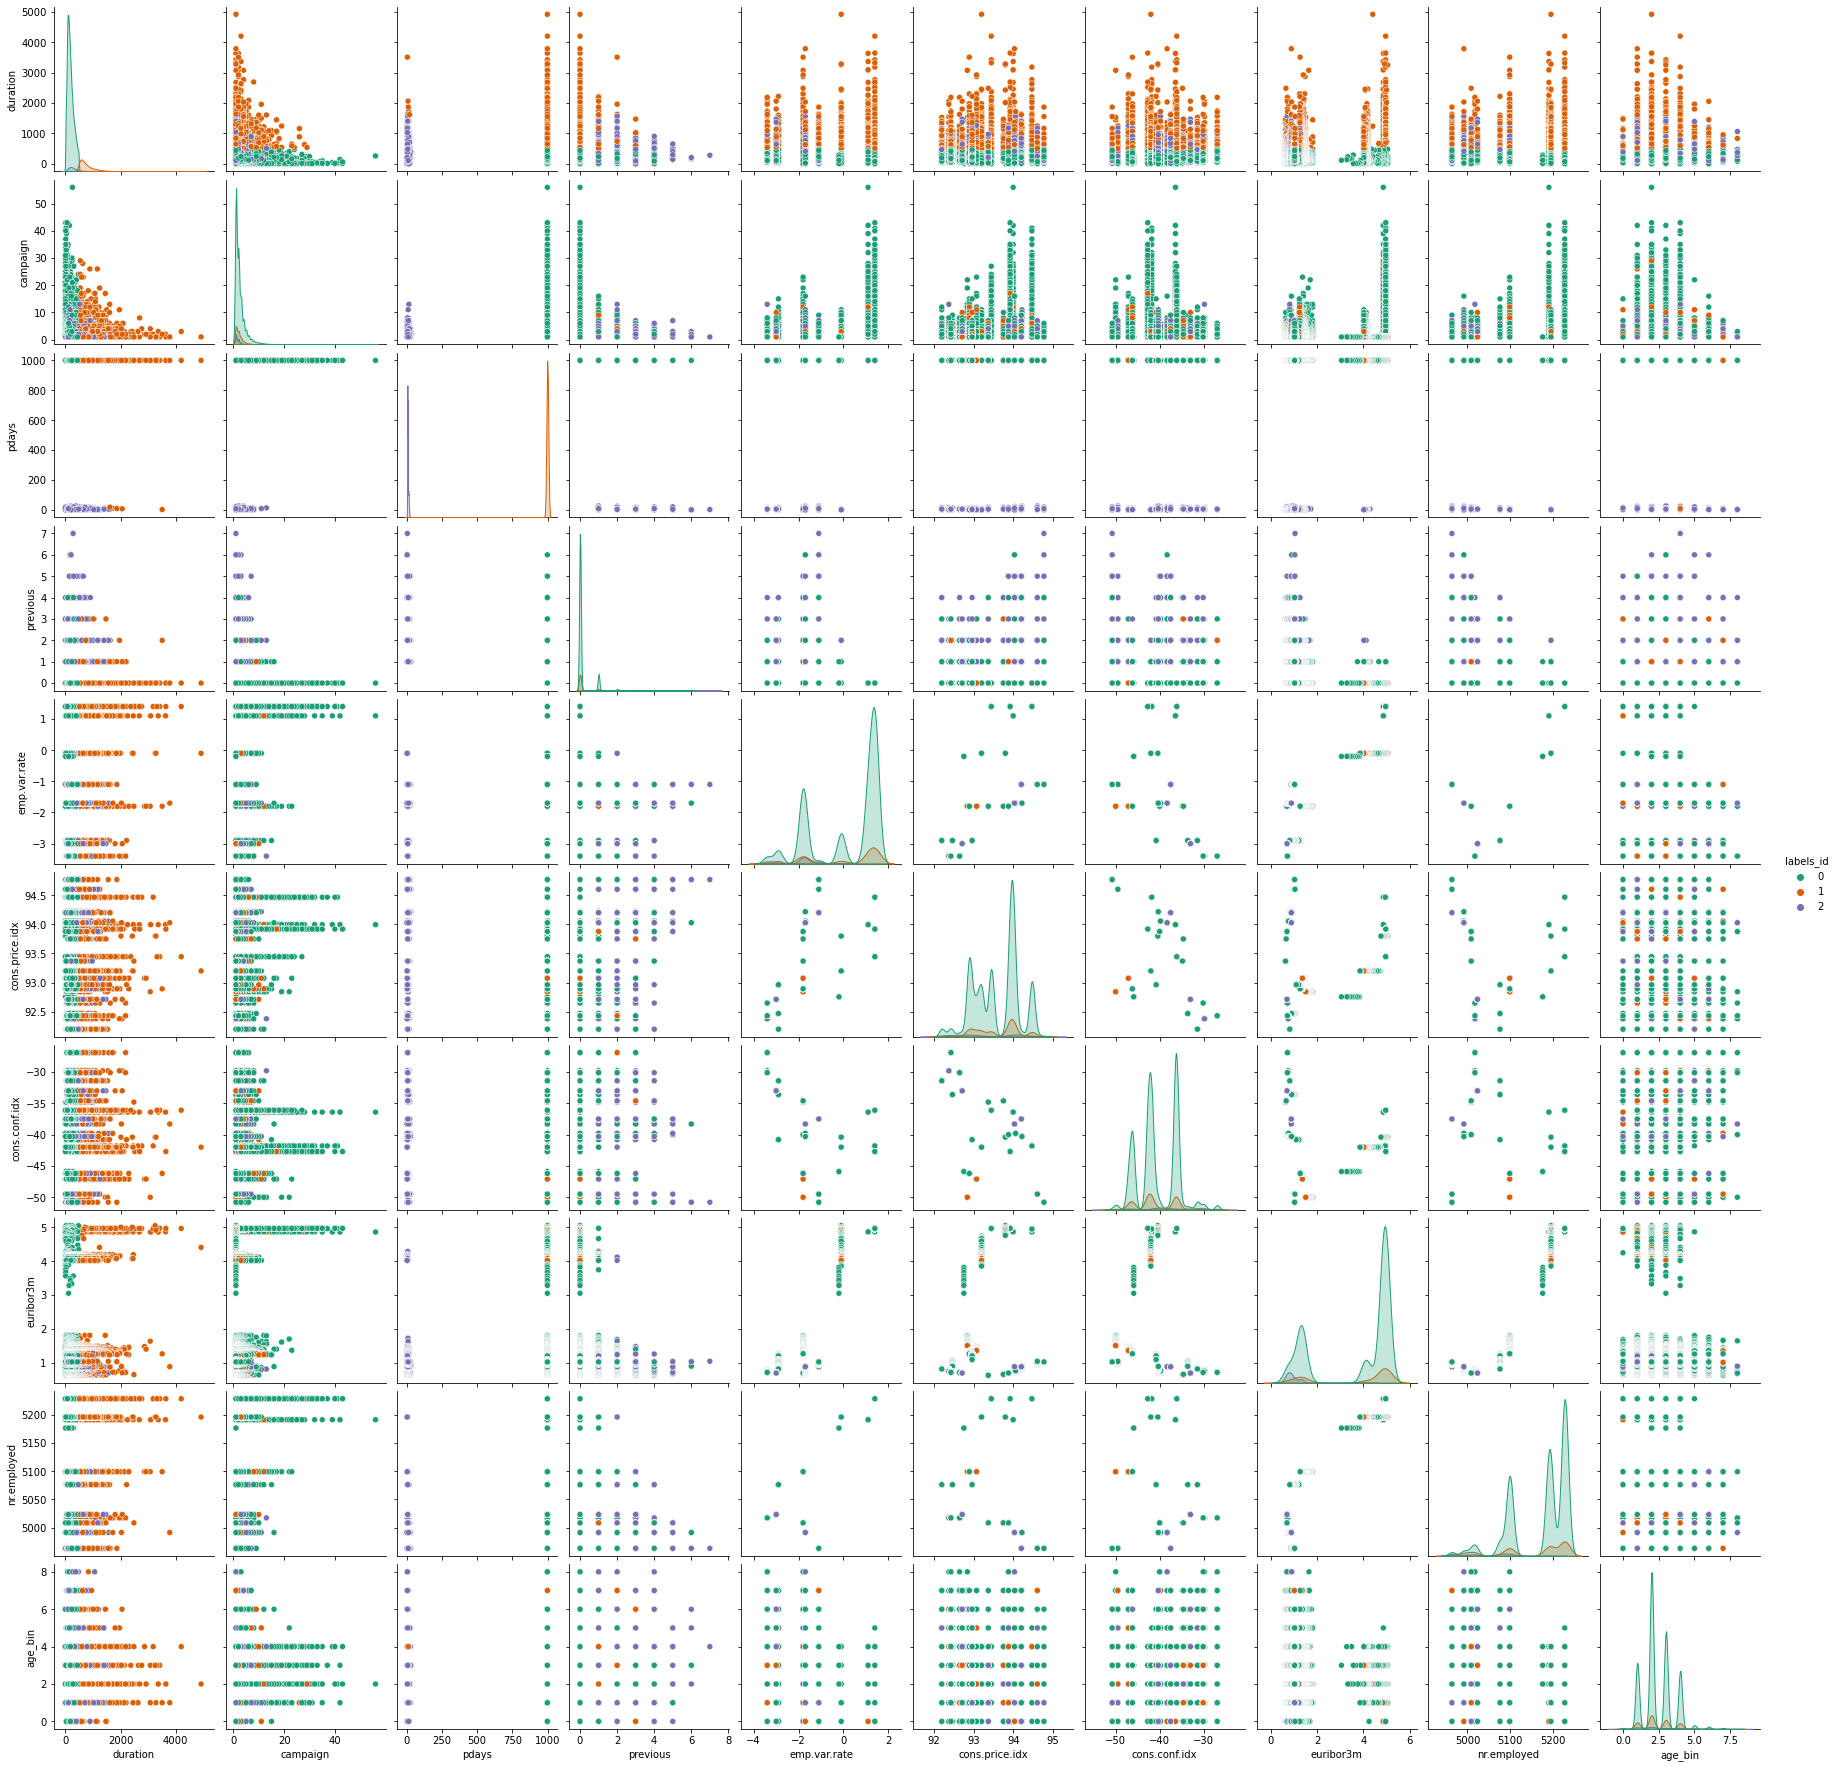

In [66]:
sns.pairplot(X_kpro, hue='labels_id',palette='Dark2',diag_kind='kde')

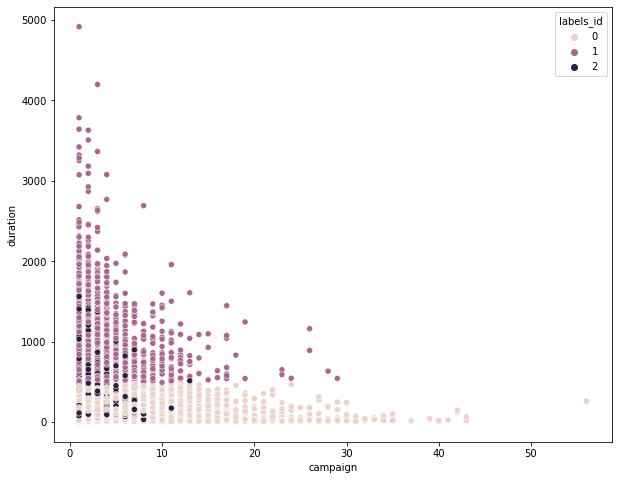

In [67]:
plt.subplots(figsize = (10,8))
sns.scatterplot(y=X_kpro['duration'],x=X_kpro['campaign'],hue=X_kpro["labels_id"])
plt.show()

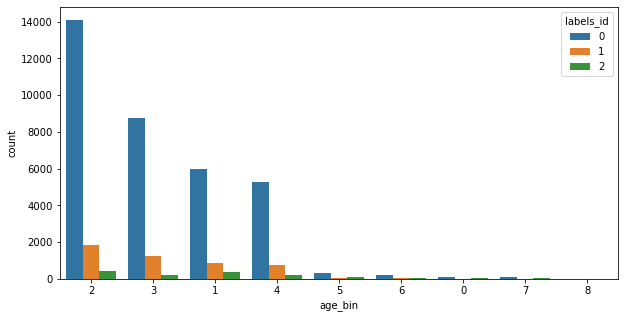

In [68]:
plt.subplots(figsize = (10,5))
sns.countplot(x=X_kpro['age_bin'],order=X_kpro['age_bin'].value_counts().index,hue=X_kpro["labels_id"])
plt.show()

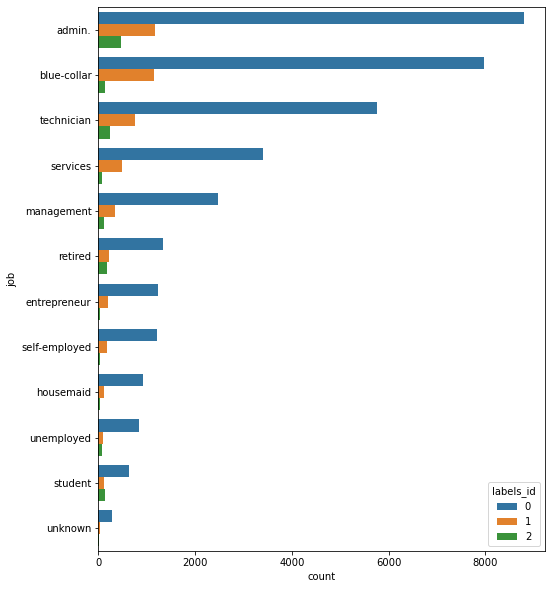

In [69]:
plt.subplots(figsize = (8,10))
sns.countplot(y=X_kpro['job'],order=X_kpro['job'].value_counts().index,hue=X_kpro["labels_id"])
plt.show()

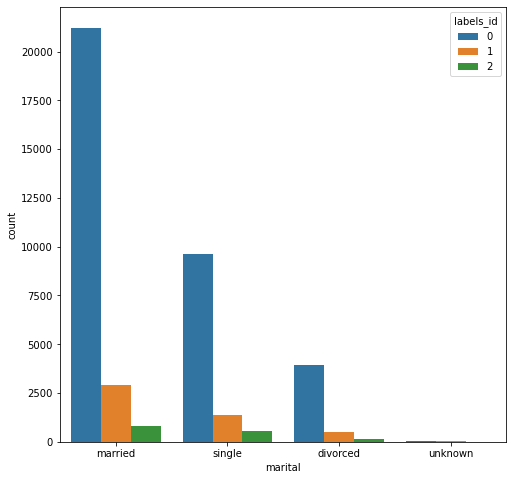

In [70]:
plt.subplots(figsize = (8,8))
sns.countplot(x=X_kpro['marital'],order=X_kpro['marital'].value_counts().index,hue=X_kpro['labels_id'])
plt.show()